In [8]:
import time
from IPython.display import Javascript, display
import threading

def keep_alive():
    while True:
        time.sleep(60)  # Wait for 60 seconds
        display(Javascript('window.scrollTo(0, 0);'))  # Scroll to top
        print("Heartbeat to keep the session alive.")

thread = threading.Thread(target=keep_alive, daemon=True)
thread.start()


In [9]:
# Install necessary libraries
!pip install pandas matplotlib seaborn nltk gensim tqdm

In [10]:
# Import libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords
from nltk import download
from google.colab import drive
import re
from tqdm import tqdm

# Set the style for seaborn
sns.set(style="whitegrid")


Step 1: Mount Google Drive and Set Paths
Explanation:

Mount Google Drive to access and save files.
Define the paths to the folders containing the topic files and where to save the cleaned topics.

In [11]:
# Mount Google Drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/processed_novels_sentences.csv'

# Define the path to the folder containing the topic files
topics_folder_path = '/content/drive/My Drive/romantic_topics'

# Define the path to save the cleaned topics
cleaned_topics_folder = '/content/drive/My Drive/romantic_topics_clean'

# Create the cleaned topics folder if it doesn't exist
if not os.path.exists(cleaned_topics_folder):
    os.makedirs(cleaned_topics_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Load Topics for Each Model
Explanation:

Traverse through the topic files in the topics folder.
Load the topics for each model and store them for further processing.

In [12]:
# List to store all models and their topics
models_topics = []

# Traverse through the topic files
for filename in os.listdir(topics_folder_path):
    if filename.endswith('.json'):
        # Remove the '.json' extension
        model_name_run = filename.replace('.json', '')
        parts = model_name_run.split('__')

        # Ensure there are enough parts
        if len(parts) >= 3:
            # The model name may contain '__', so join all parts except the last two
            model_name = '__'.join(parts[:-2])
            run_index = parts[-2]
        else:
            print(f"Filename '{filename}' does not match the expected format.")
            continue  # Skip this file or handle accordingly

        # Load the topics
        with open(os.path.join(topics_folder_path, filename), 'r') as file:
            topics = json.load(file)

        # Store the data
        models_topics.append({
            'model_name': model_name,
            'run_index': run_index,
            'topics': topics,
            'filename': filename
        })


Step 3: Prepare Data for Coherence Calculation
Explanation:

Prepare the data needed to compute the coherence of each topic.
We need a corpus of documents and a dictionary of terms.

In [13]:
# Load the raw dataset
df = pd.read_csv(dataset_path)

df.head()

# Get sentences as list
df['Sentence'] = df['Sentence'].apply(lambda x: re.sub(r'\n+', ' ', x))
df['Sentence'] = df['Sentence'].apply(lambda x: re.sub(r'\s+', ' ', x).strip().lower())

df.head()

# List of sentence strings
dataset_as_list_of_strings = df['Sentence'].tolist()

print(f"Total sentences in dataset: {df.shape[0]}")

texts = [sentence.split() for sentence in dataset_as_list_of_strings]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

Total sentences in dataset: 537526


Step 4: Compute Internal Coherence for Each Topic
Explanation:

For each model, compute the coherence score for each topic using a coherence measure (e.g., 'c_v').
Store the coherence scores for further analysis.

In [14]:
# For storing coherence scores
coherence_data = []

# Loop through each model's topics
for model in models_topics:
    topic_coherences = []
    topics = model['topics']
    model_name = model['model_name']
    run_index = model['run_index']

    print(f"\nProcessing Model: {model_name}, Run Index: {run_index}")

    # Use tqdm for progress tracking
    for idx, topic in tqdm(enumerate(topics), total=len(topics), desc=f"Processing topics for {model_name}"):
        # Skip empty topics
        if not topic:
            coherence = np.nan
            print(f"Topic {idx}: Empty topic. Skipping.")
        else:
            try:
                # Compute coherence for the topic
                cm = CoherenceModel(
                    topics=[topic],
                    texts=texts,
                    dictionary=dictionary,
                    coherence='c_v'  # You can choose other measures like 'u_mass', 'c_uci', etc.
                )
                coherence = cm.get_coherence()
                print(f"Topic {idx}: Coherence Score = {coherence:.4f}")
            except Exception as e:
                # Handle exceptions and assign NaN to coherence
                coherence = np.nan
                print(f"Topic {idx}: Error calculating coherence. Exception: {e}")

        topic_coherences.append({
            'model_name': model_name,
            'run_index': run_index,
            'topic_index': idx,
            'topic': topic,
            'coherence': coherence
        })

    # Append to the overall list
    coherence_data.extend(topic_coherences)


Processing Model: all-MiniLM-L12-v2, Run Index: 61_0


Processing topics for all-MiniLM-L12-v2:   0%|          | 0/98 [00:00<?, ?it/s]

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:   1%|          | 1/98 [00:08<13:06,  8.11s/it]

Topic 0: Coherence Score = 0.5091


Processing topics for all-MiniLM-L12-v2:   2%|▏         | 2/98 [00:16<13:06,  8.20s/it]

Topic 1: Coherence Score = 0.4164


Processing topics for all-MiniLM-L12-v2:   3%|▎         | 3/98 [00:24<12:48,  8.09s/it]

Topic 2: Coherence Score = 0.2747


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:   4%|▍         | 4/98 [00:31<12:22,  7.89s/it]

Topic 3: Coherence Score = 0.5508


Processing topics for all-MiniLM-L12-v2:   5%|▌         | 5/98 [00:39<12:12,  7.87s/it]

Topic 4: Coherence Score = 0.4841


Processing topics for all-MiniLM-L12-v2:   6%|▌         | 6/98 [00:47<11:54,  7.77s/it]

Topic 5: Coherence Score = 0.3682


Processing topics for all-MiniLM-L12-v2:   7%|▋         | 7/98 [00:55<11:52,  7.83s/it]

Topic 6: Coherence Score = 0.2621


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:   8%|▊         | 8/98 [01:02<11:39,  7.77s/it]

Topic 7: Coherence Score = 0.3664


Processing topics for all-MiniLM-L12-v2:   9%|▉         | 9/98 [01:10<11:35,  7.81s/it]

Topic 8: Coherence Score = 0.3812


Processing topics for all-MiniLM-L12-v2:  10%|█         | 10/98 [01:18<11:22,  7.76s/it]

Topic 9: Coherence Score = 0.4071


Processing topics for all-MiniLM-L12-v2:  11%|█         | 11/98 [01:26<11:20,  7.82s/it]

Topic 10: Coherence Score = 0.4889


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  12%|█▏        | 12/98 [01:34<11:09,  7.78s/it]

Topic 11: Coherence Score = 0.2516


Processing topics for all-MiniLM-L12-v2:  13%|█▎        | 13/98 [01:42<11:05,  7.83s/it]

Topic 12: Coherence Score = 0.4973


Processing topics for all-MiniLM-L12-v2:  14%|█▍        | 14/98 [01:49<10:56,  7.82s/it]

Topic 13: Coherence Score = 0.2912


Processing topics for all-MiniLM-L12-v2:  15%|█▌        | 15/98 [01:57<10:44,  7.76s/it]

Topic 14: Coherence Score = 0.2921


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  16%|█▋        | 16/98 [02:05<10:39,  7.80s/it]

Topic 15: Coherence Score = 0.5629


Processing topics for all-MiniLM-L12-v2:  17%|█▋        | 17/98 [02:13<10:28,  7.76s/it]

Topic 16: Coherence Score = 0.2658


Processing topics for all-MiniLM-L12-v2:  18%|█▊        | 18/98 [02:20<10:23,  7.80s/it]

Topic 17: Coherence Score = 0.4183


Processing topics for all-MiniLM-L12-v2:  19%|█▉        | 19/98 [02:28<10:13,  7.76s/it]

Topic 18: Coherence Score = 0.4503


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  20%|██        | 20/98 [02:36<10:11,  7.83s/it]

Topic 19: Coherence Score = 0.4343


Processing topics for all-MiniLM-L12-v2:  21%|██▏       | 21/98 [02:44<10:00,  7.79s/it]

Topic 20: Coherence Score = 0.3907


Processing topics for all-MiniLM-L12-v2:  22%|██▏       | 22/98 [02:52<09:54,  7.82s/it]

Topic 21: Coherence Score = 0.2866


Processing topics for all-MiniLM-L12-v2:  23%|██▎       | 23/98 [02:59<09:45,  7.80s/it]

Topic 22: Coherence Score = 0.3784


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  24%|██▍       | 24/98 [03:07<09:34,  7.77s/it]

Topic 23: Coherence Score = 0.3016


Processing topics for all-MiniLM-L12-v2:  26%|██▌       | 25/98 [03:15<09:31,  7.83s/it]

Topic 24: Coherence Score = 0.2876


Processing topics for all-MiniLM-L12-v2:  27%|██▋       | 26/98 [03:23<09:20,  7.78s/it]

Topic 25: Coherence Score = 0.4779


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  28%|██▊       | 27/98 [03:31<09:18,  7.86s/it]

Topic 26: Coherence Score = 0.3225


Processing topics for all-MiniLM-L12-v2:  29%|██▊       | 28/98 [03:38<09:05,  7.79s/it]

Topic 27: Coherence Score = 0.3051


Processing topics for all-MiniLM-L12-v2:  30%|██▉       | 29/98 [03:46<09:01,  7.85s/it]

Topic 28: Coherence Score = 0.3738


Processing topics for all-MiniLM-L12-v2:  31%|███       | 30/98 [03:54<08:48,  7.78s/it]

Topic 29: Coherence Score = 0.3148


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  32%|███▏      | 31/98 [04:02<08:44,  7.82s/it]

Topic 30: Coherence Score = 0.4546


Processing topics for all-MiniLM-L12-v2:  33%|███▎      | 32/98 [04:10<08:35,  7.81s/it]

Topic 31: Coherence Score = 0.2638


Processing topics for all-MiniLM-L12-v2:  34%|███▎      | 33/98 [04:18<08:27,  7.81s/it]

Topic 32: Coherence Score = 0.3346


Processing topics for all-MiniLM-L12-v2:  35%|███▍      | 34/98 [04:26<08:22,  7.85s/it]

Topic 33: Coherence Score = 0.2927


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  36%|███▌      | 35/98 [04:33<08:10,  7.78s/it]

Topic 34: Coherence Score = 0.3200


Processing topics for all-MiniLM-L12-v2:  37%|███▋      | 36/98 [04:41<08:07,  7.87s/it]

Topic 35: Coherence Score = 0.5005


Processing topics for all-MiniLM-L12-v2:  38%|███▊      | 37/98 [04:49<07:57,  7.82s/it]

Topic 36: Coherence Score = 0.3069


Processing topics for all-MiniLM-L12-v2:  39%|███▉      | 38/98 [04:57<07:53,  7.89s/it]

Topic 37: Coherence Score = 0.4865


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  40%|███▉      | 39/98 [05:05<07:42,  7.83s/it]

Topic 38: Coherence Score = 0.4085


Processing topics for all-MiniLM-L12-v2:  41%|████      | 40/98 [05:13<07:36,  7.87s/it]

Topic 39: Coherence Score = 0.3367


Processing topics for all-MiniLM-L12-v2:  42%|████▏     | 41/98 [05:20<07:26,  7.83s/it]

Topic 40: Coherence Score = 0.2705


Processing topics for all-MiniLM-L12-v2:  43%|████▎     | 42/98 [05:28<07:19,  7.85s/it]

Topic 41: Coherence Score = 0.3854


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  44%|████▍     | 43/98 [05:36<07:11,  7.84s/it]

Topic 42: Coherence Score = 0.4930


Processing topics for all-MiniLM-L12-v2:  45%|████▍     | 44/98 [05:44<07:00,  7.79s/it]

Topic 43: Coherence Score = 0.3312


Processing topics for all-MiniLM-L12-v2:  46%|████▌     | 45/98 [05:52<06:57,  7.87s/it]

Topic 44: Coherence Score = 0.4223


Processing topics for all-MiniLM-L12-v2:  47%|████▋     | 46/98 [05:59<06:46,  7.81s/it]

Topic 45: Coherence Score = 0.3500


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  48%|████▊     | 47/98 [06:08<06:42,  7.89s/it]

Topic 46: Coherence Score = 0.3183


Processing topics for all-MiniLM-L12-v2:  49%|████▉     | 48/98 [06:15<06:32,  7.84s/it]

Topic 47: Coherence Score = 0.4988


Processing topics for all-MiniLM-L12-v2:  50%|█████     | 49/98 [06:23<06:27,  7.90s/it]

Topic 48: Coherence Score = 0.2714


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  51%|█████     | 50/98 [06:31<06:19,  7.90s/it]

Topic 49: Coherence Score = 0.3208


Processing topics for all-MiniLM-L12-v2:  52%|█████▏    | 51/98 [06:39<06:11,  7.90s/it]

Topic 50: Coherence Score = 0.2732


Processing topics for all-MiniLM-L12-v2:  53%|█████▎    | 52/98 [06:47<06:03,  7.89s/it]

Topic 51: Coherence Score = 0.3015


Processing topics for all-MiniLM-L12-v2:  54%|█████▍    | 53/98 [06:55<05:53,  7.87s/it]

Topic 52: Coherence Score = 0.3484


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  55%|█████▌    | 54/98 [07:03<05:50,  7.96s/it]

Topic 53: Coherence Score = 0.2816


Processing topics for all-MiniLM-L12-v2:  56%|█████▌    | 55/98 [07:11<05:38,  7.87s/it]

Topic 54: Coherence Score = 0.4792


Processing topics for all-MiniLM-L12-v2:  57%|█████▋    | 56/98 [07:19<05:33,  7.93s/it]

Topic 55: Coherence Score = 0.4233


Processing topics for all-MiniLM-L12-v2:  58%|█████▊    | 57/98 [07:26<05:21,  7.85s/it]

Topic 56: Coherence Score = 0.5826


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  59%|█████▉    | 58/98 [07:34<05:15,  7.90s/it]

Topic 57: Coherence Score = 0.3030


Processing topics for all-MiniLM-L12-v2:  60%|██████    | 59/98 [07:42<05:04,  7.80s/it]

Topic 58: Coherence Score = 0.3837


Processing topics for all-MiniLM-L12-v2:  61%|██████    | 60/98 [07:50<05:01,  7.93s/it]

Topic 59: Coherence Score = 0.2703


Processing topics for all-MiniLM-L12-v2:  62%|██████▏   | 61/98 [07:58<04:53,  7.92s/it]

Topic 60: Coherence Score = 0.2895


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  63%|██████▎   | 62/98 [08:06<04:43,  7.87s/it]

Topic 61: Coherence Score = 0.2512


Processing topics for all-MiniLM-L12-v2:  64%|██████▍   | 63/98 [08:14<04:39,  7.97s/it]

Topic 62: Coherence Score = 0.3124


Processing topics for all-MiniLM-L12-v2:  65%|██████▌   | 64/98 [08:22<04:28,  7.90s/it]

Topic 63: Coherence Score = 0.3382


Processing topics for all-MiniLM-L12-v2:  66%|██████▋   | 65/98 [08:30<04:22,  7.95s/it]

Topic 64: Coherence Score = 0.3089


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  67%|██████▋   | 66/98 [08:38<04:13,  7.92s/it]

Topic 65: Coherence Score = 0.3112


Processing topics for all-MiniLM-L12-v2:  68%|██████▊   | 67/98 [08:46<04:05,  7.92s/it]

Topic 66: Coherence Score = 0.2737


Processing topics for all-MiniLM-L12-v2:  69%|██████▉   | 68/98 [08:53<03:56,  7.89s/it]

Topic 67: Coherence Score = 0.2199


Processing topics for all-MiniLM-L12-v2:  70%|███████   | 69/98 [09:01<03:48,  7.86s/it]

Topic 68: Coherence Score = 0.4507


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  71%|███████▏  | 70/98 [09:09<03:40,  7.88s/it]

Topic 69: Coherence Score = 0.3486


Processing topics for all-MiniLM-L12-v2:  72%|███████▏  | 71/98 [09:17<03:31,  7.83s/it]

Topic 70: Coherence Score = 0.3769


Processing topics for all-MiniLM-L12-v2:  73%|███████▎  | 72/98 [09:25<03:26,  7.93s/it]

Topic 71: Coherence Score = 0.2841


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  74%|███████▍  | 73/98 [09:33<03:16,  7.87s/it]

Topic 72: Coherence Score = 0.2411


Processing topics for all-MiniLM-L12-v2:  76%|███████▌  | 74/98 [09:41<03:10,  7.94s/it]

Topic 73: Coherence Score = 0.2175


Processing topics for all-MiniLM-L12-v2:  77%|███████▋  | 75/98 [09:49<03:01,  7.87s/it]

Topic 74: Coherence Score = 0.3922


Processing topics for all-MiniLM-L12-v2:  78%|███████▊  | 76/98 [09:57<02:54,  7.93s/it]

Topic 75: Coherence Score = 0.1973


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  79%|███████▊  | 77/98 [10:04<02:45,  7.88s/it]

Topic 76: Coherence Score = 0.4094


Processing topics for all-MiniLM-L12-v2:  80%|███████▉  | 78/98 [10:12<02:37,  7.88s/it]

Topic 77: Coherence Score = 0.2635


Processing topics for all-MiniLM-L12-v2:  81%|████████  | 79/98 [10:20<02:30,  7.91s/it]

Topic 78: Coherence Score = 0.2254


Processing topics for all-MiniLM-L12-v2:  82%|████████▏ | 80/98 [10:28<02:21,  7.85s/it]

Topic 79: Coherence Score = 0.3745


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  83%|████████▎ | 81/98 [10:36<02:14,  7.93s/it]

Topic 80: Coherence Score = 0.2063


Processing topics for all-MiniLM-L12-v2:  84%|████████▎ | 82/98 [10:44<02:06,  7.88s/it]

Topic 81: Coherence Score = 0.2252


Processing topics for all-MiniLM-L12-v2:  85%|████████▍ | 83/98 [10:52<01:59,  7.98s/it]

Topic 82: Coherence Score = 0.5610


Processing topics for all-MiniLM-L12-v2:  86%|████████▌ | 84/98 [11:00<01:51,  7.96s/it]

Topic 83: Coherence Score = 0.4875


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  87%|████████▋ | 85/98 [11:08<01:43,  7.99s/it]

Topic 84: Coherence Score = 0.2263


Processing topics for all-MiniLM-L12-v2:  88%|████████▊ | 86/98 [11:16<01:35,  7.95s/it]

Topic 85: Coherence Score = 0.1787


Processing topics for all-MiniLM-L12-v2:  89%|████████▉ | 87/98 [11:24<01:27,  7.91s/it]

Topic 86: Coherence Score = 0.2517


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  90%|████████▉ | 88/98 [11:32<01:19,  7.96s/it]

Topic 87: Coherence Score = 0.3061


Processing topics for all-MiniLM-L12-v2:  91%|█████████ | 89/98 [11:40<01:11,  7.91s/it]

Topic 88: Coherence Score = 0.2352


Processing topics for all-MiniLM-L12-v2:  92%|█████████▏| 90/98 [11:48<01:03,  7.98s/it]

Topic 89: Coherence Score = 0.2961


Processing topics for all-MiniLM-L12-v2:  93%|█████████▎| 91/98 [11:55<00:55,  7.91s/it]

Topic 90: Coherence Score = 0.3226


Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  94%|█████████▍| 92/98 [12:04<00:47,  7.95s/it]

Topic 91: Coherence Score = 0.5073


Processing topics for all-MiniLM-L12-v2:  95%|█████████▍| 93/98 [12:11<00:39,  7.91s/it]

Topic 92: Coherence Score = 0.3549


Processing topics for all-MiniLM-L12-v2:  96%|█████████▌| 94/98 [12:19<00:31,  7.94s/it]

Topic 93: Coherence Score = 0.4399


Processing topics for all-MiniLM-L12-v2:  97%|█████████▋| 95/98 [12:27<00:23,  7.91s/it]

Topic 94: Coherence Score = 0.2198


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for all-MiniLM-L12-v2:  98%|█████████▊| 96/98 [12:35<00:15,  7.83s/it]

Topic 95: Coherence Score = 0.3258


Processing topics for all-MiniLM-L12-v2:  99%|█████████▉| 97/98 [12:43<00:07,  7.96s/it]

Topic 96: Coherence Score = 0.3169


Processing topics for all-MiniLM-L12-v2: 100%|██████████| 98/98 [12:51<00:00,  7.87s/it]


Topic 97: Coherence Score = 0.2957

Processing Model: paraphrase-distilroberta-base-v1, Run Index: 25_0


Processing topics for paraphrase-distilroberta-base-v1:   1%|          | 1/113 [00:08<15:15,  8.17s/it]

Topic 0: Coherence Score = 0.6480


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   2%|▏         | 2/113 [00:16<14:51,  8.03s/it]

Topic 1: Coherence Score = 0.3602


Processing topics for paraphrase-distilroberta-base-v1:   3%|▎         | 3/113 [00:24<14:43,  8.03s/it]

Topic 2: Coherence Score = 0.3083


Processing topics for paraphrase-distilroberta-base-v1:   4%|▎         | 4/113 [00:32<14:28,  7.97s/it]

Topic 3: Coherence Score = 0.3050


Processing topics for paraphrase-distilroberta-base-v1:   4%|▍         | 5/113 [00:39<14:14,  7.92s/it]

Topic 4: Coherence Score = 0.6531


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   5%|▌         | 6/113 [00:48<14:17,  8.01s/it]

Topic 5: Coherence Score = 0.6703


Processing topics for paraphrase-distilroberta-base-v1:   6%|▌         | 7/113 [00:55<14:05,  7.98s/it]

Topic 6: Coherence Score = 0.3479


Processing topics for paraphrase-distilroberta-base-v1:   7%|▋         | 8/113 [01:04<14:05,  8.05s/it]

Topic 7: Coherence Score = 0.3478


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   8%|▊         | 9/113 [01:11<13:47,  7.96s/it]

Topic 8: Coherence Score = 0.4785


Processing topics for paraphrase-distilroberta-base-v1:   9%|▉         | 10/113 [01:20<13:46,  8.02s/it]

Topic 9: Coherence Score = 0.3343


Processing topics for paraphrase-distilroberta-base-v1:  10%|▉         | 11/113 [01:28<13:36,  8.00s/it]

Topic 10: Coherence Score = 0.4607


Processing topics for paraphrase-distilroberta-base-v1:  11%|█         | 12/113 [01:36<13:28,  8.00s/it]

Topic 11: Coherence Score = 0.3276


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  12%|█▏        | 13/113 [01:44<13:21,  8.01s/it]

Topic 12: Coherence Score = 0.4995


Processing topics for paraphrase-distilroberta-base-v1:  12%|█▏        | 14/113 [01:51<13:08,  7.96s/it]

Topic 13: Coherence Score = 0.5678


Processing topics for paraphrase-distilroberta-base-v1:  13%|█▎        | 15/113 [02:00<13:06,  8.03s/it]

Topic 14: Coherence Score = 0.3044


Processing topics for paraphrase-distilroberta-base-v1:  14%|█▍        | 16/113 [02:07<12:54,  7.98s/it]

Topic 15: Coherence Score = 0.3064


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  15%|█▌        | 17/113 [02:16<12:48,  8.01s/it]

Topic 16: Coherence Score = 0.3459


Processing topics for paraphrase-distilroberta-base-v1:  16%|█▌        | 18/113 [02:23<12:31,  7.91s/it]

Topic 17: Coherence Score = 0.4537


Processing topics for paraphrase-distilroberta-base-v1:  17%|█▋        | 19/113 [02:31<12:27,  7.95s/it]

Topic 18: Coherence Score = 0.4409


Processing topics for paraphrase-distilroberta-base-v1:  18%|█▊        | 20/113 [02:39<12:19,  7.95s/it]

Topic 19: Coherence Score = 0.3913


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  19%|█▊        | 21/113 [02:47<12:07,  7.90s/it]

Topic 20: Coherence Score = 0.3202


Processing topics for paraphrase-distilroberta-base-v1:  19%|█▉        | 22/113 [02:55<12:06,  7.98s/it]

Topic 21: Coherence Score = 0.3322


Processing topics for paraphrase-distilroberta-base-v1:  20%|██        | 23/113 [03:03<11:49,  7.88s/it]

Topic 22: Coherence Score = 0.3998


Processing topics for paraphrase-distilroberta-base-v1:  21%|██        | 24/113 [03:11<12:01,  8.11s/it]

Heartbeat to keep the session alive.
Topic 23: Coherence Score = 0.3475


Processing topics for paraphrase-distilroberta-base-v1:  22%|██▏       | 25/113 [03:19<11:47,  8.04s/it]

Topic 24: Coherence Score = 0.3964


Processing topics for paraphrase-distilroberta-base-v1:  23%|██▎       | 26/113 [03:27<11:40,  8.05s/it]

Topic 25: Coherence Score = 0.3267


Processing topics for paraphrase-distilroberta-base-v1:  24%|██▍       | 27/113 [03:35<11:28,  8.01s/it]

Topic 26: Coherence Score = 0.3210


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  25%|██▍       | 28/113 [03:43<11:16,  7.96s/it]

Topic 27: Coherence Score = 0.5478


Processing topics for paraphrase-distilroberta-base-v1:  26%|██▌       | 29/113 [03:51<11:17,  8.06s/it]

Topic 28: Coherence Score = 0.3451


Processing topics for paraphrase-distilroberta-base-v1:  27%|██▋       | 30/113 [03:59<11:07,  8.04s/it]

Topic 29: Coherence Score = 0.3116


Processing topics for paraphrase-distilroberta-base-v1:  27%|██▋       | 31/113 [04:08<11:05,  8.11s/it]

Topic 30: Coherence Score = 0.3818


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  28%|██▊       | 32/113 [04:16<10:49,  8.02s/it]

Topic 31: Coherence Score = 0.3199


Processing topics for paraphrase-distilroberta-base-v1:  29%|██▉       | 33/113 [04:24<10:47,  8.09s/it]

Topic 32: Coherence Score = 0.3731


Processing topics for paraphrase-distilroberta-base-v1:  30%|███       | 34/113 [04:32<10:35,  8.04s/it]

Topic 33: Coherence Score = 0.3340


Processing topics for paraphrase-distilroberta-base-v1:  31%|███       | 35/113 [04:40<10:21,  7.96s/it]

Topic 34: Coherence Score = 0.3854


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  32%|███▏      | 36/113 [04:48<10:30,  8.19s/it]

Topic 35: Coherence Score = 0.3350


Processing topics for paraphrase-distilroberta-base-v1:  33%|███▎      | 37/113 [04:56<10:16,  8.11s/it]

Topic 36: Coherence Score = 0.3431


Processing topics for paraphrase-distilroberta-base-v1:  34%|███▎      | 38/113 [05:04<10:08,  8.11s/it]

Topic 37: Coherence Score = 0.3497


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  35%|███▍      | 39/113 [05:12<09:54,  8.03s/it]

Topic 38: Coherence Score = 0.4527


Processing topics for paraphrase-distilroberta-base-v1:  35%|███▌      | 40/113 [05:20<09:48,  8.06s/it]

Topic 39: Coherence Score = 0.4039


Processing topics for paraphrase-distilroberta-base-v1:  36%|███▋      | 41/113 [05:28<09:39,  8.05s/it]

Topic 40: Coherence Score = 0.2660


Processing topics for paraphrase-distilroberta-base-v1:  37%|███▋      | 42/113 [05:36<09:26,  7.98s/it]

Topic 41: Coherence Score = 0.4210


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  38%|███▊      | 43/113 [05:44<09:22,  8.04s/it]

Topic 42: Coherence Score = 0.3931


Processing topics for paraphrase-distilroberta-base-v1:  39%|███▉      | 44/113 [05:52<09:10,  7.98s/it]

Topic 43: Coherence Score = 0.3399


Processing topics for paraphrase-distilroberta-base-v1:  40%|███▉      | 45/113 [06:00<09:06,  8.03s/it]

Topic 44: Coherence Score = 0.2702


Processing topics for paraphrase-distilroberta-base-v1:  41%|████      | 46/113 [06:08<08:53,  7.97s/it]

Topic 45: Coherence Score = 0.4642


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  42%|████▏     | 47/113 [06:16<08:49,  8.03s/it]

Topic 46: Coherence Score = 0.4932


Processing topics for paraphrase-distilroberta-base-v1:  42%|████▏     | 48/113 [06:24<08:41,  8.02s/it]

Topic 47: Coherence Score = 0.3549


Processing topics for paraphrase-distilroberta-base-v1:  43%|████▎     | 49/113 [06:32<08:30,  7.98s/it]

Topic 48: Coherence Score = 0.3280


<IPython.core.display.Javascript object>

Processing topics for paraphrase-distilroberta-base-v1:  44%|████▍     | 50/113 [06:40<08:28,  8.07s/it]

Heartbeat to keep the session alive.
Topic 49: Coherence Score = 0.2655


Processing topics for paraphrase-distilroberta-base-v1:  45%|████▌     | 51/113 [06:48<08:15,  7.99s/it]

Topic 50: Coherence Score = 0.2965


Processing topics for paraphrase-distilroberta-base-v1:  46%|████▌     | 52/113 [06:56<08:09,  8.03s/it]

Topic 51: Coherence Score = 0.4938


Processing topics for paraphrase-distilroberta-base-v1:  47%|████▋     | 53/113 [07:04<07:59,  7.98s/it]

Topic 52: Coherence Score = 0.2981


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  48%|████▊     | 54/113 [07:12<07:52,  8.01s/it]

Topic 53: Coherence Score = 0.2669


Processing topics for paraphrase-distilroberta-base-v1:  49%|████▊     | 55/113 [07:20<07:43,  7.99s/it]

Topic 54: Coherence Score = 0.2866


Processing topics for paraphrase-distilroberta-base-v1:  50%|████▉     | 56/113 [07:28<07:34,  7.97s/it]

Topic 55: Coherence Score = 0.4343


Processing topics for paraphrase-distilroberta-base-v1:  50%|█████     | 57/113 [07:36<07:29,  8.02s/it]

Topic 56: Coherence Score = 0.3584


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  51%|█████▏    | 58/113 [07:44<07:17,  7.95s/it]

Topic 57: Coherence Score = 0.5171


Processing topics for paraphrase-distilroberta-base-v1:  52%|█████▏    | 59/113 [07:52<07:13,  8.03s/it]

Topic 58: Coherence Score = 0.3551


Processing topics for paraphrase-distilroberta-base-v1:  53%|█████▎    | 60/113 [08:00<07:03,  7.99s/it]

Topic 59: Coherence Score = 0.3211


Processing topics for paraphrase-distilroberta-base-v1:  54%|█████▍    | 61/113 [08:08<06:56,  8.01s/it]

Topic 60: Coherence Score = 0.3913


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  55%|█████▍    | 62/113 [08:16<06:48,  8.00s/it]

Topic 61: Coherence Score = 0.3776


Processing topics for paraphrase-distilroberta-base-v1:  56%|█████▌    | 63/113 [08:24<06:36,  7.92s/it]

Topic 62: Coherence Score = 0.3911


Processing topics for paraphrase-distilroberta-base-v1:  57%|█████▋    | 64/113 [08:32<06:31,  8.00s/it]

Topic 63: Coherence Score = 0.3764


Processing topics for paraphrase-distilroberta-base-v1:  58%|█████▊    | 65/113 [08:40<06:19,  7.91s/it]

Topic 64: Coherence Score = 0.3455


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  58%|█████▊    | 66/113 [08:48<06:14,  7.98s/it]

Topic 65: Coherence Score = 0.3137


Processing topics for paraphrase-distilroberta-base-v1:  59%|█████▉    | 67/113 [08:56<06:04,  7.93s/it]

Topic 66: Coherence Score = 0.3456


Processing topics for paraphrase-distilroberta-base-v1:  60%|██████    | 68/113 [09:04<06:01,  8.03s/it]

Topic 67: Coherence Score = 0.3415
Topic 68: Coherence Score = 0.3004

Processing topics for paraphrase-distilroberta-base-v1:  61%|██████    | 69/113 [09:12<05:52,  8.01s/it]


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  62%|██████▏   | 70/113 [09:20<05:44,  8.01s/it]

Topic 69: Coherence Score = 0.4470


Processing topics for paraphrase-distilroberta-base-v1:  63%|██████▎   | 71/113 [09:28<05:37,  8.04s/it]

Topic 70: Coherence Score = 0.3798


Processing topics for paraphrase-distilroberta-base-v1:  64%|██████▎   | 72/113 [09:36<05:25,  7.94s/it]

Topic 71: Coherence Score = 0.4199


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  65%|██████▍   | 73/113 [09:45<05:26,  8.17s/it]

Topic 72: Coherence Score = 0.4089


Processing topics for paraphrase-distilroberta-base-v1:  65%|██████▌   | 74/113 [09:52<05:14,  8.07s/it]

Topic 73: Coherence Score = 0.3250


Processing topics for paraphrase-distilroberta-base-v1:  66%|██████▋   | 75/113 [10:00<05:07,  8.08s/it]

Topic 74: Coherence Score = 0.2989


Processing topics for paraphrase-distilroberta-base-v1:  67%|██████▋   | 76/113 [10:08<04:57,  8.04s/it]

Topic 75: Coherence Score = 0.2904


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  68%|██████▊   | 77/113 [10:16<04:48,  8.00s/it]

Topic 76: Coherence Score = 0.4685


Processing topics for paraphrase-distilroberta-base-v1:  69%|██████▉   | 78/113 [10:24<04:40,  8.01s/it]

Topic 77: Coherence Score = 0.2724


Processing topics for paraphrase-distilroberta-base-v1:  70%|██████▉   | 79/113 [10:32<04:29,  7.94s/it]

Topic 78: Coherence Score = 0.3362


Processing topics for paraphrase-distilroberta-base-v1:  71%|███████   | 80/113 [10:40<04:23,  8.00s/it]

Topic 79: Coherence Score = 0.5389


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  72%|███████▏  | 81/113 [10:48<04:14,  7.94s/it]

Topic 80: Coherence Score = 0.4224


Processing topics for paraphrase-distilroberta-base-v1:  73%|███████▎  | 82/113 [10:56<04:08,  8.02s/it]

Topic 81: Coherence Score = 0.4364


Processing topics for paraphrase-distilroberta-base-v1:  73%|███████▎  | 83/113 [11:04<03:58,  7.95s/it]

Topic 82: Coherence Score = 0.3612


Processing topics for paraphrase-distilroberta-base-v1:  74%|███████▍  | 84/113 [11:12<03:52,  8.03s/it]

Topic 83: Coherence Score = 0.3189
Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  75%|███████▌  | 85/113 [11:20<03:44,  8.01s/it]

Topic 84: Coherence Score = 0.3802


Processing topics for paraphrase-distilroberta-base-v1:  76%|███████▌  | 86/113 [11:28<03:34,  7.95s/it]

Topic 85: Coherence Score = 0.3509


Processing topics for paraphrase-distilroberta-base-v1:  77%|███████▋  | 87/113 [11:36<03:28,  8.02s/it]

Topic 86: Coherence Score = 0.3457


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  78%|███████▊  | 88/113 [11:44<03:18,  7.95s/it]

Topic 87: Coherence Score = 0.3521


Processing topics for paraphrase-distilroberta-base-v1:  79%|███████▉  | 89/113 [11:52<03:12,  8.01s/it]

Topic 88: Coherence Score = 0.3517


Processing topics for paraphrase-distilroberta-base-v1:  80%|███████▉  | 90/113 [12:00<03:03,  7.96s/it]

Topic 89: Coherence Score = 0.5295


Processing topics for paraphrase-distilroberta-base-v1:  81%|████████  | 91/113 [12:08<02:57,  8.05s/it]

Topic 90: Coherence Score = 0.4454


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  81%|████████▏ | 92/113 [12:16<02:48,  8.02s/it]

Topic 91: Coherence Score = 0.3540


Processing topics for paraphrase-distilroberta-base-v1:  82%|████████▏ | 93/113 [12:24<02:40,  8.00s/it]

Topic 92: Coherence Score = 0.3299


Processing topics for paraphrase-distilroberta-base-v1:  83%|████████▎ | 94/113 [12:32<02:33,  8.06s/it]

Topic 93: Coherence Score = 0.3697


Processing topics for paraphrase-distilroberta-base-v1:  84%|████████▍ | 95/113 [12:40<02:23,  7.97s/it]

Topic 94: Coherence Score = 0.3136


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  85%|████████▍ | 96/113 [12:48<02:16,  8.02s/it]

Topic 95: Coherence Score = 0.3802


Processing topics for paraphrase-distilroberta-base-v1:  86%|████████▌ | 97/113 [12:56<02:07,  7.99s/it]

Topic 96: Coherence Score = 0.3725


Processing topics for paraphrase-distilroberta-base-v1:  87%|████████▋ | 98/113 [13:04<02:00,  8.05s/it]

Topic 97: Coherence Score = 0.3997


Processing topics for paraphrase-distilroberta-base-v1:  88%|████████▊ | 99/113 [13:12<01:52,  8.02s/it]

Topic 98: Coherence Score = 0.3831


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  88%|████████▊ | 100/113 [13:20<01:43,  7.94s/it]

Topic 99: Coherence Score = 0.3110


Processing topics for paraphrase-distilroberta-base-v1:  89%|████████▉ | 101/113 [13:28<01:35,  8.00s/it]

Topic 100: Coherence Score = 0.3506


Processing topics for paraphrase-distilroberta-base-v1:  90%|█████████ | 102/113 [13:36<01:27,  7.93s/it]

Topic 101: Coherence Score = 0.3842


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  91%|█████████ | 103/113 [13:44<01:19,  7.98s/it]

Topic 102: Coherence Score = 0.3785


Processing topics for paraphrase-distilroberta-base-v1:  92%|█████████▏| 104/113 [13:52<01:11,  7.93s/it]

Topic 103: Coherence Score = 0.7851


Processing topics for paraphrase-distilroberta-base-v1:  93%|█████████▎| 105/113 [14:00<01:03,  7.99s/it]

Topic 104: Coherence Score = 0.3442


Processing topics for paraphrase-distilroberta-base-v1:  94%|█████████▍| 106/113 [14:08<00:55,  7.99s/it]

Topic 105: Coherence Score = 0.4112


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  95%|█████████▍| 107/113 [14:16<00:48,  8.01s/it]

Topic 106: Coherence Score = 0.3407


Processing topics for paraphrase-distilroberta-base-v1:  96%|█████████▌| 108/113 [14:24<00:40,  8.07s/it]

Topic 107: Coherence Score = 0.3760


Processing topics for paraphrase-distilroberta-base-v1:  96%|█████████▋| 109/113 [14:32<00:32,  8.00s/it]

Topic 108: Coherence Score = 0.3745


Processing topics for paraphrase-distilroberta-base-v1:  97%|█████████▋| 110/113 [14:40<00:24,  8.06s/it]

Topic 109: Coherence Score = 0.3289


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  98%|█████████▊| 111/113 [14:48<00:15,  7.99s/it]

Topic 110: Coherence Score = 0.3759


Processing topics for paraphrase-distilroberta-base-v1:  99%|█████████▉| 112/113 [14:56<00:08,  8.07s/it]

Topic 111: Coherence Score = 0.3408


Processing topics for paraphrase-distilroberta-base-v1: 100%|██████████| 113/113 [15:04<00:00,  8.01s/it]


Topic 112: Coherence Score = 0.3347

Processing Model: paraphrase-distilroberta-base-v1, Run Index: 67_0


Processing topics for paraphrase-distilroberta-base-v1:   1%|          | 1/82 [00:08<11:04,  8.20s/it]

Topic 0: Coherence Score = 0.4673


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   2%|▏         | 2/82 [00:16<10:53,  8.17s/it]

Topic 1: Coherence Score = 0.5465


Processing topics for paraphrase-distilroberta-base-v1:   4%|▎         | 3/82 [00:24<10:30,  7.99s/it]

Topic 2: Coherence Score = 0.3096


Processing topics for paraphrase-distilroberta-base-v1:   5%|▍         | 4/82 [00:32<10:30,  8.08s/it]

Topic 3: Coherence Score = 0.3677


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   6%|▌         | 5/82 [00:40<10:14,  7.98s/it]

Topic 4: Coherence Score = 0.3154


Processing topics for paraphrase-distilroberta-base-v1:   7%|▋         | 6/82 [00:48<10:10,  8.03s/it]

Topic 5: Coherence Score = 0.4694


Processing topics for paraphrase-distilroberta-base-v1:   9%|▊         | 7/82 [00:56<09:58,  7.98s/it]

Topic 6: Coherence Score = 0.3554


Processing topics for paraphrase-distilroberta-base-v1:  10%|▉         | 8/82 [01:04<09:51,  7.99s/it]

Topic 7: Coherence Score = 0.3772


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  11%|█         | 9/82 [01:12<09:43,  7.99s/it]

Topic 8: Coherence Score = 0.3108


Processing topics for paraphrase-distilroberta-base-v1:  12%|█▏        | 10/82 [01:20<09:32,  7.95s/it]

Topic 9: Coherence Score = 0.3441


Processing topics for paraphrase-distilroberta-base-v1:  13%|█▎        | 11/82 [01:28<09:30,  8.03s/it]

Topic 10: Coherence Score = 0.5200


Processing topics for paraphrase-distilroberta-base-v1:  15%|█▍        | 12/82 [01:36<09:18,  7.98s/it]

Topic 11: Coherence Score = 0.2963


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  16%|█▌        | 13/82 [01:44<09:14,  8.03s/it]

Topic 12: Coherence Score = 0.2822


Processing topics for paraphrase-distilroberta-base-v1:  17%|█▋        | 14/82 [01:52<09:02,  7.98s/it]

Topic 13: Coherence Score = 0.6139


Processing topics for paraphrase-distilroberta-base-v1:  18%|█▊        | 15/82 [02:00<08:55,  8.00s/it]

Topic 14: Coherence Score = 0.3125


Processing topics for paraphrase-distilroberta-base-v1:  20%|█▉        | 16/82 [02:08<08:46,  7.98s/it]

Topic 15: Coherence Score = 0.2993


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  21%|██        | 17/82 [02:15<08:37,  7.96s/it]

Topic 16: Coherence Score = 0.3433


Processing topics for paraphrase-distilroberta-base-v1:  22%|██▏       | 18/82 [02:24<08:33,  8.02s/it]

Topic 17: Coherence Score = 0.3771


Processing topics for paraphrase-distilroberta-base-v1:  23%|██▎       | 19/82 [02:32<08:22,  7.98s/it]

Topic 18: Coherence Score = 0.3063


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  24%|██▍       | 20/82 [02:40<08:18,  8.04s/it]

Topic 19: Coherence Score = 0.3437


Processing topics for paraphrase-distilroberta-base-v1:  26%|██▌       | 21/82 [02:48<08:08,  8.01s/it]

Topic 20: Coherence Score = 0.3924


Processing topics for paraphrase-distilroberta-base-v1:  27%|██▋       | 22/82 [02:56<08:00,  8.02s/it]

Topic 21: Coherence Score = 0.3418


Processing topics for paraphrase-distilroberta-base-v1:  28%|██▊       | 23/82 [03:04<07:52,  8.00s/it]

Topic 22: Coherence Score = 0.4017


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  29%|██▉       | 24/82 [03:11<07:41,  7.95s/it]

Topic 23: Coherence Score = 0.3024


Processing topics for paraphrase-distilroberta-base-v1:  30%|███       | 25/82 [03:20<07:35,  8.00s/it]

Topic 24: Coherence Score = 0.3123


Processing topics for paraphrase-distilroberta-base-v1:  32%|███▏      | 26/82 [03:27<07:26,  7.97s/it]

Topic 25: Coherence Score = 0.4373


Processing topics for paraphrase-distilroberta-base-v1:  33%|███▎      | 27/82 [03:36<07:24,  8.08s/it]

Topic 26: Coherence Score = 0.3807


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  34%|███▍      | 28/82 [03:44<07:12,  8.02s/it]

Topic 27: Coherence Score = 0.3187


Processing topics for paraphrase-distilroberta-base-v1:  35%|███▌      | 29/82 [03:52<07:08,  8.09s/it]

Topic 28: Coherence Score = 0.3750


Processing topics for paraphrase-distilroberta-base-v1:  37%|███▋      | 30/82 [04:00<06:56,  8.01s/it]

Topic 29: Coherence Score = 0.3186


Processing topics for paraphrase-distilroberta-base-v1:  38%|███▊      | 31/82 [04:08<06:47,  8.00s/it]

Topic 30: Coherence Score = 0.4967


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  39%|███▉      | 32/82 [04:16<06:43,  8.07s/it]

Topic 31: Coherence Score = 0.3916


Processing topics for paraphrase-distilroberta-base-v1:  40%|████      | 33/82 [04:24<06:34,  8.06s/it]

Topic 32: Coherence Score = 0.3559


Processing topics for paraphrase-distilroberta-base-v1:  41%|████▏     | 34/82 [04:32<06:28,  8.10s/it]

Topic 33: Coherence Score = 0.4388


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  43%|████▎     | 35/82 [04:40<06:17,  8.02s/it]

Topic 34: Coherence Score = 0.3618


Processing topics for paraphrase-distilroberta-base-v1:  44%|████▍     | 36/82 [04:49<06:17,  8.20s/it]

Topic 35: Coherence Score = 0.3793


Processing topics for paraphrase-distilroberta-base-v1:  45%|████▌     | 37/82 [04:57<06:07,  8.16s/it]

Topic 36: Coherence Score = 0.3335


Processing topics for paraphrase-distilroberta-base-v1:  46%|████▋     | 38/82 [05:05<05:55,  8.07s/it]

Topic 37: Coherence Score = 0.3328


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  48%|████▊     | 39/82 [05:13<05:49,  8.13s/it]

Topic 38: Coherence Score = 0.4031


Processing topics for paraphrase-distilroberta-base-v1:  49%|████▉     | 40/82 [05:21<05:39,  8.07s/it]

Topic 39: Coherence Score = 0.4217


Processing topics for paraphrase-distilroberta-base-v1:  50%|█████     | 41/82 [05:29<05:32,  8.10s/it]

Topic 40: Coherence Score = 0.3216


<IPython.core.display.Javascript object>

Processing topics for paraphrase-distilroberta-base-v1:  51%|█████     | 42/82 [05:37<05:20,  8.01s/it]

Heartbeat to keep the session alive.
Topic 41: Coherence Score = 0.3779


Processing topics for paraphrase-distilroberta-base-v1:  52%|█████▏    | 43/82 [05:45<05:17,  8.13s/it]

Topic 42: Coherence Score = 0.2499


Processing topics for paraphrase-distilroberta-base-v1:  54%|█████▎    | 44/82 [05:53<05:07,  8.08s/it]

Topic 43: Coherence Score = 0.3823


Processing topics for paraphrase-distilroberta-base-v1:  55%|█████▍    | 45/82 [06:01<04:57,  8.04s/it]

Topic 44: Coherence Score = 0.4078


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  56%|█████▌    | 46/82 [06:09<04:52,  8.11s/it]

Topic 45: Coherence Score = 0.3425


Processing topics for paraphrase-distilroberta-base-v1:  57%|█████▋    | 47/82 [06:17<04:41,  8.04s/it]

Topic 46: Coherence Score = 0.3062


Processing topics for paraphrase-distilroberta-base-v1:  59%|█████▊    | 48/82 [06:25<04:35,  8.10s/it]

Topic 47: Coherence Score = 0.2877


Processing topics for paraphrase-distilroberta-base-v1:  60%|█████▉    | 49/82 [06:33<04:25,  8.05s/it]

Topic 48: Coherence Score = 0.2842


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  61%|██████    | 50/82 [06:42<04:18,  8.09s/it]

Topic 49: Coherence Score = 0.4272


Processing topics for paraphrase-distilroberta-base-v1:  62%|██████▏   | 51/82 [06:49<04:08,  8.02s/it]

Topic 50: Coherence Score = 0.3585


Processing topics for paraphrase-distilroberta-base-v1:  63%|██████▎   | 52/82 [06:57<03:59,  7.97s/it]

Topic 51: Coherence Score = 0.4230


Processing topics for paraphrase-distilroberta-base-v1:  65%|██████▍   | 53/82 [07:06<03:53,  8.04s/it]

Topic 52: Coherence Score = 0.3287


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  66%|██████▌   | 54/82 [07:13<03:44,  8.02s/it]

Topic 53: Coherence Score = 0.3591


Processing topics for paraphrase-distilroberta-base-v1:  67%|██████▋   | 55/82 [07:22<03:39,  8.12s/it]

Topic 54: Coherence Score = 0.3629


Processing topics for paraphrase-distilroberta-base-v1:  68%|██████▊   | 56/82 [07:30<03:29,  8.04s/it]

Topic 55: Coherence Score = 0.3758


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  70%|██████▉   | 57/82 [07:38<03:22,  8.08s/it]

Topic 56: Coherence Score = 0.3117


Processing topics for paraphrase-distilroberta-base-v1:  71%|███████   | 58/82 [07:46<03:13,  8.05s/it]

Topic 57: Coherence Score = 0.3790


Processing topics for paraphrase-distilroberta-base-v1:  72%|███████▏  | 59/82 [07:54<03:03,  7.97s/it]

Topic 58: Coherence Score = 0.2945


Processing topics for paraphrase-distilroberta-base-v1:  73%|███████▎  | 60/82 [08:02<02:57,  8.05s/it]

Topic 59: Coherence Score = 0.4223


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  74%|███████▍  | 61/82 [08:10<02:47,  8.00s/it]

Topic 60: Coherence Score = 0.4350


Processing topics for paraphrase-distilroberta-base-v1:  76%|███████▌  | 62/82 [08:18<02:40,  8.04s/it]

Topic 61: Coherence Score = 0.4180


Processing topics for paraphrase-distilroberta-base-v1:  77%|███████▋  | 63/82 [08:26<02:32,  8.02s/it]

Topic 62: Coherence Score = 0.3392


Processing topics for paraphrase-distilroberta-base-v1:  78%|███████▊  | 64/82 [08:34<02:24,  8.05s/it]

Topic 63: Coherence Score = 0.3488


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  79%|███████▉  | 65/82 [08:42<02:16,  8.01s/it]

Topic 64: Coherence Score = 0.3855


Processing topics for paraphrase-distilroberta-base-v1:  80%|████████  | 66/82 [08:50<02:10,  8.13s/it]

Topic 65: Coherence Score = 0.3407


Processing topics for paraphrase-distilroberta-base-v1:  82%|████████▏ | 67/82 [08:58<02:02,  8.14s/it]

Topic 66: Coherence Score = 0.4128


Processing topics for paraphrase-distilroberta-base-v1:  83%|████████▎ | 68/82 [09:06<01:53,  8.10s/it]

Topic 67: Coherence Score = 0.3824


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  84%|████████▍ | 69/82 [09:15<01:45,  8.12s/it]

Topic 68: Coherence Score = 0.3312


Processing topics for paraphrase-distilroberta-base-v1:  85%|████████▌ | 70/82 [09:22<01:36,  8.04s/it]

Topic 69: Coherence Score = 0.5169


Processing topics for paraphrase-distilroberta-base-v1:  87%|████████▋ | 71/82 [09:31<01:28,  8.04s/it]

Topic 70: Coherence Score = 0.3507


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  88%|████████▊ | 72/82 [09:39<01:20,  8.06s/it]

Topic 71: Coherence Score = 0.4146


Processing topics for paraphrase-distilroberta-base-v1:  89%|████████▉ | 73/82 [09:46<01:11,  7.99s/it]

Topic 72: Coherence Score = 0.3303


Processing topics for paraphrase-distilroberta-base-v1:  90%|█████████ | 74/82 [09:55<01:04,  8.06s/it]

Topic 73: Coherence Score = 0.3577


Processing topics for paraphrase-distilroberta-base-v1:  91%|█████████▏| 75/82 [10:03<00:55,  8.00s/it]

Topic 74: Coherence Score = 0.3461


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  93%|█████████▎| 76/82 [10:11<00:48,  8.06s/it]

Topic 75: Coherence Score = 0.3646


Processing topics for paraphrase-distilroberta-base-v1:  94%|█████████▍| 77/82 [10:19<00:40,  8.02s/it]

Topic 76: Coherence Score = 0.3311


Processing topics for paraphrase-distilroberta-base-v1:  95%|█████████▌| 78/82 [10:27<00:32,  8.06s/it]

Topic 77: Coherence Score = 0.3265


Processing topics for paraphrase-distilroberta-base-v1:  96%|█████████▋| 79/82 [10:35<00:24,  8.01s/it]

Topic 78: Coherence Score = 0.3201


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  98%|█████████▊| 80/82 [10:43<00:15,  7.97s/it]

Topic 79: Coherence Score = 0.3741


Processing topics for paraphrase-distilroberta-base-v1:  99%|█████████▉| 81/82 [10:51<00:08,  8.06s/it]

Topic 80: Coherence Score = 0.3524


Processing topics for paraphrase-distilroberta-base-v1: 100%|██████████| 82/82 [10:59<00:00,  8.04s/it]


Topic 81: Coherence Score = 0.3387

Processing Model: paraphrase-distilroberta-base-v1, Run Index: 68_0


Processing topics for paraphrase-distilroberta-base-v1:   1%|          | 1/100 [00:08<13:37,  8.26s/it]

Topic 0: Coherence Score = 0.5712


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   2%|▏         | 2/100 [00:16<13:10,  8.07s/it]

Topic 1: Coherence Score = 0.3638


Processing topics for paraphrase-distilroberta-base-v1:   3%|▎         | 3/100 [00:24<13:02,  8.07s/it]

Topic 2: Coherence Score = 0.4454


Processing topics for paraphrase-distilroberta-base-v1:   4%|▍         | 4/100 [00:32<12:50,  8.02s/it]

Topic 3: Coherence Score = 0.7202


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   5%|▌         | 5/100 [00:40<12:37,  7.97s/it]

Topic 4: Coherence Score = 0.3191


Processing topics for paraphrase-distilroberta-base-v1:   6%|▌         | 6/100 [00:48<12:35,  8.04s/it]

Topic 5: Coherence Score = 0.3082


Processing topics for paraphrase-distilroberta-base-v1:   7%|▋         | 7/100 [00:56<12:21,  7.97s/it]

Topic 6: Coherence Score = 0.6598


Processing topics for paraphrase-distilroberta-base-v1:   8%|▊         | 8/100 [01:04<12:18,  8.02s/it]

Topic 7: Coherence Score = 0.3071


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   9%|▉         | 9/100 [01:12<12:09,  8.02s/it]

Topic 8: Coherence Score = 0.4583


Processing topics for paraphrase-distilroberta-base-v1:  10%|█         | 10/100 [01:20<12:04,  8.05s/it]

Topic 9: Coherence Score = 0.3862


Processing topics for paraphrase-distilroberta-base-v1:  11%|█         | 11/100 [01:28<11:54,  8.03s/it]

Topic 10: Coherence Score = 0.5541


Processing topics for paraphrase-distilroberta-base-v1:  12%|█▏        | 12/100 [01:36<11:41,  7.97s/it]

Topic 11: Coherence Score = 0.2963


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  13%|█▎        | 13/100 [01:44<11:40,  8.05s/it]

Topic 12: Coherence Score = 0.5627


Processing topics for paraphrase-distilroberta-base-v1:  14%|█▍        | 14/100 [01:52<11:22,  7.94s/it]

Topic 13: Coherence Score = 0.3570


Processing topics for paraphrase-distilroberta-base-v1:  15%|█▌        | 15/100 [02:00<11:33,  8.16s/it]

Topic 14: Coherence Score = 0.3459


Processing topics for paraphrase-distilroberta-base-v1:  16%|█▌        | 16/100 [02:08<11:18,  8.08s/it]

Topic 15: Coherence Score = 0.3857


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  17%|█▋        | 17/100 [02:16<11:13,  8.12s/it]

Topic 16: Coherence Score = 0.3891


Processing topics for paraphrase-distilroberta-base-v1:  18%|█▊        | 18/100 [02:24<11:01,  8.07s/it]

Topic 17: Coherence Score = 0.3964


Processing topics for paraphrase-distilroberta-base-v1:  19%|█▉        | 19/100 [02:32<10:49,  8.02s/it]

Topic 18: Coherence Score = 0.5624


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  20%|██        | 20/100 [02:41<10:48,  8.11s/it]

Topic 19: Coherence Score = 0.2918


Processing topics for paraphrase-distilroberta-base-v1:  21%|██        | 21/100 [02:48<10:33,  8.02s/it]

Topic 20: Coherence Score = 0.4409


Processing topics for paraphrase-distilroberta-base-v1:  22%|██▏       | 22/100 [02:57<10:28,  8.06s/it]

Topic 21: Coherence Score = 0.4013


Processing topics for paraphrase-distilroberta-base-v1:  23%|██▎       | 23/100 [03:04<10:16,  8.01s/it]

Topic 22: Coherence Score = 0.4021


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  24%|██▍       | 24/100 [03:13<10:12,  8.06s/it]

Topic 23: Coherence Score = 0.3289


Processing topics for paraphrase-distilroberta-base-v1:  25%|██▌       | 25/100 [03:21<10:01,  8.02s/it]

Topic 24: Coherence Score = 0.4168


Processing topics for paraphrase-distilroberta-base-v1:  26%|██▌       | 26/100 [03:28<09:50,  7.98s/it]

Topic 25: Coherence Score = 0.3372


Processing topics for paraphrase-distilroberta-base-v1:  27%|██▋       | 27/100 [03:37<09:47,  8.05s/it]

Topic 26: Coherence Score = 0.3148


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  28%|██▊       | 28/100 [03:44<09:35,  7.99s/it]

Topic 27: Coherence Score = 0.3136


Processing topics for paraphrase-distilroberta-base-v1:  29%|██▉       | 29/100 [03:53<09:34,  8.09s/it]

Topic 28: Coherence Score = 0.3277


Processing topics for paraphrase-distilroberta-base-v1:  30%|███       | 30/100 [04:01<09:23,  8.05s/it]

Topic 29: Coherence Score = 0.3610


Processing topics for paraphrase-distilroberta-base-v1:  31%|███       | 31/100 [04:09<09:17,  8.07s/it]

Topic 30: Coherence Score = 0.3484


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  32%|███▏      | 32/100 [04:17<09:06,  8.04s/it]

Topic 31: Coherence Score = 0.3013


Processing topics for paraphrase-distilroberta-base-v1:  33%|███▎      | 33/100 [04:24<08:50,  7.91s/it]

Topic 32: Coherence Score = 0.3379


Processing topics for paraphrase-distilroberta-base-v1:  34%|███▍      | 34/100 [04:33<08:59,  8.18s/it]

Topic 33: Coherence Score = 0.3958


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  35%|███▌      | 35/100 [04:41<08:44,  8.06s/it]

Topic 34: Coherence Score = 0.4270


Processing topics for paraphrase-distilroberta-base-v1:  36%|███▌      | 36/100 [04:49<08:37,  8.08s/it]

Topic 35: Coherence Score = 0.3335


Processing topics for paraphrase-distilroberta-base-v1:  37%|███▋      | 37/100 [04:57<08:24,  8.00s/it]

Topic 36: Coherence Score = 0.4078


Processing topics for paraphrase-distilroberta-base-v1:  38%|███▊      | 38/100 [05:05<08:19,  8.05s/it]

Topic 37: Coherence Score = 0.3660


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  39%|███▉      | 39/100 [05:13<08:10,  8.04s/it]

Topic 38: Coherence Score = 0.3391


Processing topics for paraphrase-distilroberta-base-v1:  40%|████      | 40/100 [05:21<08:00,  8.00s/it]

Topic 39: Coherence Score = 0.3616


Processing topics for paraphrase-distilroberta-base-v1:  41%|████      | 41/100 [05:29<07:56,  8.08s/it]

Topic 40: Coherence Score = 0.3595


Processing topics for paraphrase-distilroberta-base-v1:  42%|████▏     | 42/100 [05:37<07:45,  8.03s/it]

Topic 41: Coherence Score = 0.3807


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  43%|████▎     | 43/100 [05:45<07:41,  8.09s/it]

Topic 42: Coherence Score = 0.3233


Processing topics for paraphrase-distilroberta-base-v1:  44%|████▍     | 44/100 [05:53<07:30,  8.05s/it]

Topic 43: Coherence Score = 0.4031


Processing topics for paraphrase-distilroberta-base-v1:  45%|████▌     | 45/100 [06:02<07:24,  8.09s/it]

Topic 44: Coherence Score = 0.4062


Processing topics for paraphrase-distilroberta-base-v1:  46%|████▌     | 46/100 [06:10<07:14,  8.05s/it]

Topic 45: Coherence Score = 0.4470


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  47%|████▋     | 47/100 [06:17<07:04,  8.00s/it]

Topic 46: Coherence Score = 0.3761


Processing topics for paraphrase-distilroberta-base-v1:  48%|████▊     | 48/100 [06:26<06:59,  8.07s/it]

Topic 47: Coherence Score = 0.2667


Processing topics for paraphrase-distilroberta-base-v1:  49%|████▉     | 49/100 [06:33<06:46,  7.98s/it]

Topic 48: Coherence Score = 0.3484


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  50%|█████     | 50/100 [06:42<06:50,  8.20s/it]

Topic 49: Coherence Score = 0.3404


Processing topics for paraphrase-distilroberta-base-v1:  51%|█████     | 51/100 [06:50<06:36,  8.10s/it]

Topic 50: Coherence Score = 0.2955


Processing topics for paraphrase-distilroberta-base-v1:  52%|█████▏    | 52/100 [06:58<06:28,  8.09s/it]

Topic 51: Coherence Score = 0.2963


Processing topics for paraphrase-distilroberta-base-v1:  53%|█████▎    | 53/100 [07:06<06:18,  8.05s/it]

Topic 52: Coherence Score = 0.3014


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  54%|█████▍    | 54/100 [07:14<06:08,  8.00s/it]

Topic 53: Coherence Score = 0.3218


Processing topics for paraphrase-distilroberta-base-v1:  55%|█████▌    | 55/100 [07:22<06:04,  8.09s/it]

Topic 54: Coherence Score = 0.3979


Processing topics for paraphrase-distilroberta-base-v1:  56%|█████▌    | 56/100 [07:30<05:53,  8.03s/it]

Topic 55: Coherence Score = 0.4079


Processing topics for paraphrase-distilroberta-base-v1:  57%|█████▋    | 57/100 [07:38<05:45,  8.04s/it]

Topic 56: Coherence Score = 0.3739


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  58%|█████▊    | 58/100 [07:46<05:36,  8.01s/it]

Topic 57: Coherence Score = 0.3516


Processing topics for paraphrase-distilroberta-base-v1:  59%|█████▉    | 59/100 [07:54<05:29,  8.03s/it]

Topic 58: Coherence Score = 0.5339


Processing topics for paraphrase-distilroberta-base-v1:  60%|██████    | 60/100 [08:02<05:19,  7.99s/it]

Topic 59: Coherence Score = 0.2779


Processing topics for paraphrase-distilroberta-base-v1:  61%|██████    | 61/100 [08:10<05:08,  7.90s/it]

Topic 60: Coherence Score = 0.3695


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  62%|██████▏   | 62/100 [08:19<05:10,  8.17s/it]

Topic 61: Coherence Score = 0.3239


Processing topics for paraphrase-distilroberta-base-v1:  63%|██████▎   | 63/100 [08:27<04:59,  8.09s/it]

Topic 62: Coherence Score = 0.4256


Processing topics for paraphrase-distilroberta-base-v1:  64%|██████▍   | 64/100 [08:35<04:53,  8.14s/it]

Topic 63: Coherence Score = 0.3580


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  65%|██████▌   | 65/100 [08:43<04:42,  8.07s/it]

Topic 64: Coherence Score = 0.3115


Processing topics for paraphrase-distilroberta-base-v1:  66%|██████▌   | 66/100 [08:51<04:39,  8.21s/it]

Topic 65: Coherence Score = 0.3927


Processing topics for paraphrase-distilroberta-base-v1:  67%|██████▋   | 67/100 [08:59<04:29,  8.16s/it]

Topic 66: Coherence Score = 0.4599


Processing topics for paraphrase-distilroberta-base-v1:  68%|██████▊   | 68/100 [09:07<04:17,  8.06s/it]

Topic 67: Coherence Score = 0.3528


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  69%|██████▉   | 69/100 [09:15<04:11,  8.11s/it]

Topic 68: Coherence Score = 0.3281


Processing topics for paraphrase-distilroberta-base-v1:  70%|███████   | 70/100 [09:23<04:01,  8.06s/it]

Topic 69: Coherence Score = 0.3238


Processing topics for paraphrase-distilroberta-base-v1:  71%|███████   | 71/100 [09:32<03:55,  8.13s/it]

Topic 70: Coherence Score = 0.4125


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  72%|███████▏  | 72/100 [09:39<03:45,  8.07s/it]

Topic 71: Coherence Score = 0.4172


Processing topics for paraphrase-distilroberta-base-v1:  73%|███████▎  | 73/100 [09:48<03:38,  8.08s/it]

Topic 72: Coherence Score = 0.3597


Processing topics for paraphrase-distilroberta-base-v1:  74%|███████▍  | 74/100 [09:56<03:29,  8.05s/it]

Topic 73: Coherence Score = 0.5328


Processing topics for paraphrase-distilroberta-base-v1:  75%|███████▌  | 75/100 [10:03<03:19,  7.99s/it]

Topic 74: Coherence Score = 0.3507


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  76%|███████▌  | 76/100 [10:12<03:12,  8.03s/it]

Topic 75: Coherence Score = 0.3781


Processing topics for paraphrase-distilroberta-base-v1:  77%|███████▋  | 77/100 [10:19<03:02,  7.95s/it]

Topic 76: Coherence Score = 0.3468


Processing topics for paraphrase-distilroberta-base-v1:  78%|███████▊  | 78/100 [10:28<02:56,  8.04s/it]

Topic 77: Coherence Score = 0.3648


Processing topics for paraphrase-distilroberta-base-v1:  79%|███████▉  | 79/100 [10:35<02:47,  7.99s/it]

Topic 78: Coherence Score = 0.3377


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  80%|████████  | 80/100 [10:44<02:40,  8.03s/it]

Topic 79: Coherence Score = 0.4248


Processing topics for paraphrase-distilroberta-base-v1:  81%|████████  | 81/100 [10:51<02:31,  7.99s/it]

Topic 80: Coherence Score = 0.3507


Processing topics for paraphrase-distilroberta-base-v1:  82%|████████▏ | 82/100 [10:59<02:22,  7.93s/it]

Topic 81: Coherence Score = 0.3505


Processing topics for paraphrase-distilroberta-base-v1:  83%|████████▎ | 83/100 [11:07<02:15,  7.99s/it]

Topic 82: Coherence Score = 0.3373


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  84%|████████▍ | 84/100 [11:15<02:08,  8.00s/it]

Topic 83: Coherence Score = 0.3749


Processing topics for paraphrase-distilroberta-base-v1:  85%|████████▌ | 85/100 [11:24<02:00,  8.04s/it]

Topic 84: Coherence Score = 0.3769


Processing topics for paraphrase-distilroberta-base-v1:  86%|████████▌ | 86/100 [11:31<01:51,  7.97s/it]

Topic 85: Coherence Score = 0.3091


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  87%|████████▋ | 87/100 [11:39<01:43,  8.00s/it]

Topic 86: Coherence Score = 0.3527


Processing topics for paraphrase-distilroberta-base-v1:  88%|████████▊ | 88/100 [11:47<01:35,  7.96s/it]

Topic 87: Coherence Score = 0.2820


Processing topics for paraphrase-distilroberta-base-v1:  89%|████████▉ | 89/100 [11:55<01:27,  7.93s/it]

Topic 88: Coherence Score = 0.3390


Processing topics for paraphrase-distilroberta-base-v1:  90%|█████████ | 90/100 [12:03<01:19,  7.99s/it]

Topic 89: Coherence Score = 0.3783


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  91%|█████████ | 91/100 [12:11<01:11,  7.97s/it]

Topic 90: Coherence Score = 0.3419


Processing topics for paraphrase-distilroberta-base-v1:  92%|█████████▏| 92/100 [12:19<01:04,  8.03s/it]

Topic 91: Coherence Score = 0.4441


Processing topics for paraphrase-distilroberta-base-v1:  93%|█████████▎| 93/100 [12:27<00:55,  7.97s/it]

Topic 92: Coherence Score = 0.3473


Processing topics for paraphrase-distilroberta-base-v1:  94%|█████████▍| 94/100 [12:35<00:48,  8.01s/it]

Topic 93: Coherence Score = 0.4012


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  95%|█████████▌| 95/100 [12:43<00:40,  8.02s/it]

Topic 94: Coherence Score = 0.3660


Processing topics for paraphrase-distilroberta-base-v1:  96%|█████████▌| 96/100 [12:51<00:31,  7.98s/it]

Topic 95: Coherence Score = 0.4025


Processing topics for paraphrase-distilroberta-base-v1:  97%|█████████▋| 97/100 [12:59<00:24,  8.03s/it]

Topic 96: Coherence Score = 0.4611


Processing topics for paraphrase-distilroberta-base-v1:  98%|█████████▊| 98/100 [13:07<00:15,  7.99s/it]

Topic 97: Coherence Score = 0.3399


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  99%|█████████▉| 99/100 [13:16<00:08,  8.07s/it]

Topic 98: Coherence Score = 0.3504


Processing topics for paraphrase-distilroberta-base-v1: 100%|██████████| 100/100 [13:23<00:00,  8.04s/it]


Topic 99: Coherence Score = 0.3347

Processing Model: paraphrase-distilroberta-base-v1, Run Index: 98_0


Processing topics for paraphrase-distilroberta-base-v1:   1%|          | 1/100 [00:08<13:35,  8.23s/it]

Topic 0: Coherence Score = 0.5737


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   2%|▏         | 2/100 [00:16<13:10,  8.06s/it]

Topic 1: Coherence Score = 0.3550


Processing topics for paraphrase-distilroberta-base-v1:   3%|▎         | 3/100 [00:24<12:59,  8.04s/it]

Topic 2: Coherence Score = 0.3759


Processing topics for paraphrase-distilroberta-base-v1:   4%|▍         | 4/100 [00:32<13:02,  8.15s/it]

Topic 3: Coherence Score = 0.7120


Processing topics for paraphrase-distilroberta-base-v1:   5%|▌         | 5/100 [00:40<12:45,  8.06s/it]

Topic 4: Coherence Score = 0.3938


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   6%|▌         | 6/100 [00:48<12:45,  8.15s/it]

Topic 5: Coherence Score = 0.4602


Processing topics for paraphrase-distilroberta-base-v1:   7%|▋         | 7/100 [00:56<12:31,  8.08s/it]

Topic 6: Coherence Score = 0.6735


Processing topics for paraphrase-distilroberta-base-v1:   8%|▊         | 8/100 [01:04<12:25,  8.10s/it]

Topic 7: Coherence Score = 0.4047


Processing topics for paraphrase-distilroberta-base-v1:   9%|▉         | 9/100 [01:12<12:15,  8.08s/it]

Topic 8: Coherence Score = 0.3993


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  10%|█         | 10/100 [01:20<12:01,  8.02s/it]

Topic 9: Coherence Score = 0.2614


Processing topics for paraphrase-distilroberta-base-v1:  11%|█         | 11/100 [01:28<11:59,  8.09s/it]

Topic 10: Coherence Score = 0.6306


Processing topics for paraphrase-distilroberta-base-v1:  12%|█▏        | 12/100 [01:36<11:45,  8.02s/it]

Topic 11: Coherence Score = 0.3452


Processing topics for paraphrase-distilroberta-base-v1:  13%|█▎        | 13/100 [01:45<11:42,  8.07s/it]

Topic 12: Coherence Score = 0.3191


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  14%|█▍        | 14/100 [01:52<11:31,  8.04s/it]

Topic 13: Coherence Score = 0.6383


Processing topics for paraphrase-distilroberta-base-v1:  15%|█▌        | 15/100 [02:01<11:27,  8.08s/it]

Topic 14: Coherence Score = 0.3723


Processing topics for paraphrase-distilroberta-base-v1:  16%|█▌        | 16/100 [02:09<11:14,  8.03s/it]

Topic 15: Coherence Score = 0.4064


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  17%|█▋        | 17/100 [02:17<11:06,  8.03s/it]

Topic 16: Coherence Score = 0.3250


Processing topics for paraphrase-distilroberta-base-v1:  18%|█▊        | 18/100 [02:25<11:05,  8.11s/it]

Topic 17: Coherence Score = 0.3639


Processing topics for paraphrase-distilroberta-base-v1:  19%|█▉        | 19/100 [02:33<10:48,  8.00s/it]

Topic 18: Coherence Score = 0.2991


Processing topics for paraphrase-distilroberta-base-v1:  20%|██        | 20/100 [02:41<10:57,  8.22s/it]

Topic 19: Coherence Score = 0.6175


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  21%|██        | 21/100 [02:49<10:40,  8.11s/it]

Topic 20: Coherence Score = 0.4197


Processing topics for paraphrase-distilroberta-base-v1:  22%|██▏       | 22/100 [02:57<10:35,  8.14s/it]

Topic 21: Coherence Score = 0.3152


Processing topics for paraphrase-distilroberta-base-v1:  23%|██▎       | 23/100 [03:06<10:25,  8.12s/it]

Topic 22: Coherence Score = 0.3557


Processing topics for paraphrase-distilroberta-base-v1:  24%|██▍       | 24/100 [03:13<10:11,  8.05s/it]

Topic 23: Coherence Score = 0.2593


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  25%|██▌       | 25/100 [03:22<10:09,  8.13s/it]

Topic 24: Coherence Score = 0.3578


Processing topics for paraphrase-distilroberta-base-v1:  26%|██▌       | 26/100 [03:30<09:56,  8.06s/it]

Topic 25: Coherence Score = 0.3346


Processing topics for paraphrase-distilroberta-base-v1:  27%|██▋       | 27/100 [03:38<09:51,  8.10s/it]

Topic 26: Coherence Score = 0.3469


Processing topics for paraphrase-distilroberta-base-v1:  28%|██▊       | 28/100 [03:46<09:39,  8.04s/it]

Topic 27: Coherence Score = 0.3425


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  29%|██▉       | 29/100 [03:54<09:34,  8.09s/it]

Topic 28: Coherence Score = 0.4640


Processing topics for paraphrase-distilroberta-base-v1:  30%|███       | 30/100 [04:02<09:26,  8.09s/it]

Topic 29: Coherence Score = 0.3601


Processing topics for paraphrase-distilroberta-base-v1:  31%|███       | 31/100 [04:10<09:11,  7.99s/it]

Topic 30: Coherence Score = 0.3648


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  32%|███▏      | 32/100 [04:18<09:18,  8.21s/it]

Topic 31: Coherence Score = 0.2762


Processing topics for paraphrase-distilroberta-base-v1:  33%|███▎      | 33/100 [04:26<09:04,  8.13s/it]

Topic 32: Coherence Score = 0.4341


Processing topics for paraphrase-distilroberta-base-v1:  34%|███▍      | 34/100 [04:35<08:57,  8.14s/it]

Topic 33: Coherence Score = 0.3874


Processing topics for paraphrase-distilroberta-base-v1:  35%|███▌      | 35/100 [04:43<08:44,  8.07s/it]

Topic 34: Coherence Score = 0.2815


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  36%|███▌      | 36/100 [04:51<08:37,  8.08s/it]

Topic 35: Coherence Score = 0.4175


Processing topics for paraphrase-distilroberta-base-v1:  37%|███▋      | 37/100 [04:59<08:30,  8.10s/it]

Topic 36: Coherence Score = 0.3181


Processing topics for paraphrase-distilroberta-base-v1:  38%|███▊      | 38/100 [05:07<08:17,  8.03s/it]

Topic 37: Coherence Score = 0.3787


Processing topics for paraphrase-distilroberta-base-v1:  39%|███▉      | 39/100 [05:15<08:13,  8.09s/it]

Topic 38: Coherence Score = 0.4006


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  40%|████      | 40/100 [05:23<08:03,  8.05s/it]

Topic 39: Coherence Score = 0.3930


Processing topics for paraphrase-distilroberta-base-v1:  41%|████      | 41/100 [05:31<07:58,  8.10s/it]

Topic 40: Coherence Score = 0.3842


Processing topics for paraphrase-distilroberta-base-v1:  42%|████▏     | 42/100 [05:39<07:48,  8.09s/it]

Topic 41: Coherence Score = 0.4262


Processing topics for paraphrase-distilroberta-base-v1:  43%|████▎     | 43/100 [05:47<07:35,  7.99s/it]

Topic 42: Coherence Score = 0.4528


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  44%|████▍     | 44/100 [05:55<07:34,  8.11s/it]

Topic 43: Coherence Score = 0.4232


Processing topics for paraphrase-distilroberta-base-v1:  45%|████▌     | 45/100 [06:03<07:22,  8.05s/it]

Topic 44: Coherence Score = 0.2460


Processing topics for paraphrase-distilroberta-base-v1:  46%|████▌     | 46/100 [06:11<07:17,  8.10s/it]

Topic 45: Coherence Score = 0.3418


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  47%|████▋     | 47/100 [06:19<07:05,  8.03s/it]

Topic 46: Coherence Score = 0.3978


Processing topics for paraphrase-distilroberta-base-v1:  48%|████▊     | 48/100 [06:27<06:59,  8.06s/it]

Topic 47: Coherence Score = 0.3913


Processing topics for paraphrase-distilroberta-base-v1:  49%|████▉     | 49/100 [06:35<06:49,  8.03s/it]

Topic 48: Coherence Score = 0.3082


Processing topics for paraphrase-distilroberta-base-v1:  50%|█████     | 50/100 [06:43<06:40,  8.00s/it]

Topic 49: Coherence Score = 0.3823


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  51%|█████     | 51/100 [06:51<06:35,  8.07s/it]

Topic 50: Coherence Score = 0.4134


Processing topics for paraphrase-distilroberta-base-v1:  52%|█████▏    | 52/100 [06:59<06:26,  8.04s/it]

Topic 51: Coherence Score = 0.2976


Processing topics for paraphrase-distilroberta-base-v1:  53%|█████▎    | 53/100 [07:08<06:19,  8.08s/it]

Topic 52: Coherence Score = 0.2933


Processing topics for paraphrase-distilroberta-base-v1:  54%|█████▍    | 54/100 [07:16<06:08,  8.02s/it]

Topic 53: Coherence Score = 0.3340


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  55%|█████▌    | 55/100 [07:24<06:01,  8.04s/it]

Topic 54: Coherence Score = 0.4050


Processing topics for paraphrase-distilroberta-base-v1:  56%|█████▌    | 56/100 [07:32<05:52,  8.00s/it]

Topic 55: Coherence Score = 0.4423


Processing topics for paraphrase-distilroberta-base-v1:  57%|█████▋    | 57/100 [07:40<05:48,  8.10s/it]

Topic 56: Coherence Score = 0.2877


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  58%|█████▊    | 58/100 [07:48<05:44,  8.19s/it]

Topic 57: Coherence Score = 0.4598


Processing topics for paraphrase-distilroberta-base-v1:  59%|█████▉    | 59/100 [07:56<05:31,  8.09s/it]

Topic 58: Coherence Score = 0.3623


Processing topics for paraphrase-distilroberta-base-v1:  60%|██████    | 60/100 [08:04<05:25,  8.13s/it]

Topic 59: Coherence Score = 0.3108


Processing topics for paraphrase-distilroberta-base-v1:  61%|██████    | 61/100 [08:12<05:13,  8.03s/it]

Topic 60: Coherence Score = 0.3411


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  62%|██████▏   | 62/100 [08:20<05:06,  8.07s/it]

Topic 61: Coherence Score = 0.3116


Processing topics for paraphrase-distilroberta-base-v1:  63%|██████▎   | 63/100 [08:28<04:58,  8.06s/it]

Topic 62: Coherence Score = 0.3960


Processing topics for paraphrase-distilroberta-base-v1:  64%|██████▍   | 64/100 [08:36<04:47,  8.00s/it]

Topic 63: Coherence Score = 0.3852


Processing topics for paraphrase-distilroberta-base-v1:  65%|██████▌   | 65/100 [08:44<04:42,  8.07s/it]

Topic 64: Coherence Score = 0.3544


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  66%|██████▌   | 66/100 [08:52<04:32,  8.01s/it]

Topic 65: Coherence Score = 0.3072


Processing topics for paraphrase-distilroberta-base-v1:  67%|██████▋   | 67/100 [09:01<04:27,  8.09s/it]

Topic 66: Coherence Score = 0.3525


Processing topics for paraphrase-distilroberta-base-v1:  68%|██████▊   | 68/100 [09:09<04:17,  8.06s/it]

Topic 67: Coherence Score = 0.3283


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  69%|██████▉   | 69/100 [09:17<04:10,  8.08s/it]

Topic 68: Coherence Score = 0.3517


Processing topics for paraphrase-distilroberta-base-v1:  70%|███████   | 70/100 [09:25<04:01,  8.05s/it]

Topic 69: Coherence Score = 0.2867


Processing topics for paraphrase-distilroberta-base-v1:  71%|███████   | 71/100 [09:33<03:52,  8.02s/it]

Topic 70: Coherence Score = 0.3029


Processing topics for paraphrase-distilroberta-base-v1:  72%|███████▏  | 72/100 [09:41<03:46,  8.08s/it]

Topic 71: Coherence Score = 0.2927


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  73%|███████▎  | 73/100 [09:49<03:35,  7.99s/it]

Topic 72: Coherence Score = 0.3408


Processing topics for paraphrase-distilroberta-base-v1:  74%|███████▍  | 74/100 [09:57<03:32,  8.17s/it]

Topic 73: Coherence Score = 0.3388


Processing topics for paraphrase-distilroberta-base-v1:  75%|███████▌  | 75/100 [10:05<03:22,  8.08s/it]

Topic 74: Coherence Score = 0.3197


Processing topics for paraphrase-distilroberta-base-v1:  76%|███████▌  | 76/100 [10:13<03:13,  8.08s/it]

Topic 75: Coherence Score = 0.2774


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  77%|███████▋  | 77/100 [10:21<03:05,  8.05s/it]

Topic 76: Coherence Score = 0.4114


Processing topics for paraphrase-distilroberta-base-v1:  78%|███████▊  | 78/100 [10:29<02:55,  7.97s/it]

Topic 77: Coherence Score = 0.3479


Processing topics for paraphrase-distilroberta-base-v1:  79%|███████▉  | 79/100 [10:37<02:49,  8.07s/it]

Topic 78: Coherence Score = 0.3338


Processing topics for paraphrase-distilroberta-base-v1:  80%|████████  | 80/100 [10:45<02:40,  8.00s/it]

Topic 79: Coherence Score = 0.3241


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  81%|████████  | 81/100 [10:53<02:33,  8.07s/it]

Topic 80: Coherence Score = 0.3334


Processing topics for paraphrase-distilroberta-base-v1:  82%|████████▏ | 82/100 [11:01<02:24,  8.02s/it]

Topic 81: Coherence Score = 0.3344


Processing topics for paraphrase-distilroberta-base-v1:  83%|████████▎ | 83/100 [11:09<02:16,  8.05s/it]

Topic 82: Coherence Score = 0.3454


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  84%|████████▍ | 84/100 [11:17<02:08,  8.04s/it]

Topic 83: Coherence Score = 0.2880


Processing topics for paraphrase-distilroberta-base-v1:  85%|████████▌ | 85/100 [11:25<01:59,  7.96s/it]

Topic 84: Coherence Score = 0.3365


Processing topics for paraphrase-distilroberta-base-v1:  86%|████████▌ | 86/100 [11:33<01:52,  8.03s/it]

Topic 85: Coherence Score = 0.2197


Processing topics for paraphrase-distilroberta-base-v1:  87%|████████▋ | 87/100 [11:41<01:43,  7.94s/it]

Topic 86: Coherence Score = 0.3552


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  88%|████████▊ | 88/100 [11:49<01:36,  8.01s/it]

Topic 87: Coherence Score = 0.3554


Processing topics for paraphrase-distilroberta-base-v1:  89%|████████▉ | 89/100 [11:57<01:27,  7.96s/it]

Topic 88: Coherence Score = 0.3224


Processing topics for paraphrase-distilroberta-base-v1:  90%|█████████ | 90/100 [12:05<01:19,  7.99s/it]

Topic 89: Coherence Score = 0.3704


Processing topics for paraphrase-distilroberta-base-v1:  91%|█████████ | 91/100 [12:13<01:11,  7.96s/it]

Topic 90: Coherence Score = 0.3224


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  92%|█████████▏| 92/100 [12:21<01:03,  7.92s/it]

Topic 91: Coherence Score = 0.4264


Processing topics for paraphrase-distilroberta-base-v1:  93%|█████████▎| 93/100 [12:30<00:57,  8.16s/it]

Topic 92: Coherence Score = 0.2975


Processing topics for paraphrase-distilroberta-base-v1:  94%|█████████▍| 94/100 [12:37<00:48,  8.08s/it]

Topic 93: Coherence Score = 0.3203


Processing topics for paraphrase-distilroberta-base-v1:  95%|█████████▌| 95/100 [12:46<00:40,  8.13s/it]

Topic 94: Coherence Score = 0.3222


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  96%|█████████▌| 96/100 [12:54<00:32,  8.08s/it]

Topic 95: Coherence Score = 0.3339


Processing topics for paraphrase-distilroberta-base-v1:  97%|█████████▋| 97/100 [13:02<00:24,  8.14s/it]

Topic 96: Coherence Score = 0.3648


Processing topics for paraphrase-distilroberta-base-v1:  98%|█████████▊| 98/100 [13:10<00:16,  8.07s/it]

Topic 97: Coherence Score = 0.3625


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  99%|█████████▉| 99/100 [13:18<00:08,  8.02s/it]

Topic 98: Coherence Score = 0.4474


Processing topics for paraphrase-distilroberta-base-v1: 100%|██████████| 100/100 [13:26<00:00,  8.06s/it]


Topic 99: Coherence Score = 0.3005

Processing Model: paraphrase-distilroberta-base-v1, Run Index: 105_0


Processing topics for paraphrase-distilroberta-base-v1:   1%|▏         | 1/78 [00:08<10:25,  8.13s/it]

Topic 0: Coherence Score = 0.4650


Processing topics for paraphrase-distilroberta-base-v1:   3%|▎         | 2/78 [00:16<10:25,  8.24s/it]

Topic 1: Coherence Score = 0.5414


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   4%|▍         | 3/78 [00:24<10:01,  8.01s/it]

Topic 2: Coherence Score = 0.3191


Processing topics for paraphrase-distilroberta-base-v1:   5%|▌         | 4/78 [00:32<09:54,  8.03s/it]

Topic 3: Coherence Score = 0.3157


Processing topics for paraphrase-distilroberta-base-v1:   6%|▋         | 5/78 [00:40<09:47,  8.04s/it]

Topic 4: Coherence Score = 0.3695


Processing topics for paraphrase-distilroberta-base-v1:   8%|▊         | 6/78 [00:48<09:32,  7.95s/it]

Topic 5: Coherence Score = 0.5049


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   9%|▉         | 7/78 [00:56<09:32,  8.06s/it]

Topic 6: Coherence Score = 0.3838


Processing topics for paraphrase-distilroberta-base-v1:  10%|█         | 8/78 [01:04<09:17,  7.97s/it]

Topic 7: Coherence Score = 0.3862


Processing topics for paraphrase-distilroberta-base-v1:  12%|█▏        | 9/78 [01:12<09:14,  8.04s/it]

Topic 8: Coherence Score = 0.5699


Processing topics for paraphrase-distilroberta-base-v1:  13%|█▎        | 10/78 [01:20<09:04,  8.00s/it]

Topic 9: Coherence Score = 0.3069


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  14%|█▍        | 11/78 [01:28<08:57,  8.03s/it]

Topic 10: Coherence Score = 0.2963


Processing topics for paraphrase-distilroberta-base-v1:  15%|█▌        | 12/78 [01:36<08:46,  7.98s/it]

Topic 11: Coherence Score = 0.3817


Processing topics for paraphrase-distilroberta-base-v1:  17%|█▋        | 13/78 [01:44<08:36,  7.95s/it]

Topic 12: Coherence Score = 0.6139


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  18%|█▊        | 14/78 [01:52<08:32,  8.01s/it]

Topic 13: Coherence Score = 0.2853


Processing topics for paraphrase-distilroberta-base-v1:  19%|█▉        | 15/78 [02:00<08:21,  7.96s/it]

Topic 14: Coherence Score = 0.4409


Processing topics for paraphrase-distilroberta-base-v1:  21%|██        | 16/78 [02:08<08:20,  8.07s/it]

Topic 15: Coherence Score = 0.2944


Processing topics for paraphrase-distilroberta-base-v1:  22%|██▏       | 17/78 [02:16<08:07,  7.99s/it]

Topic 16: Coherence Score = 0.2971


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  23%|██▎       | 18/78 [02:24<08:01,  8.03s/it]

Topic 17: Coherence Score = 0.3771


Processing topics for paraphrase-distilroberta-base-v1:  24%|██▍       | 19/78 [02:32<07:52,  8.00s/it]

Topic 18: Coherence Score = 0.2933


Processing topics for paraphrase-distilroberta-base-v1:  26%|██▌       | 20/78 [02:40<07:41,  7.95s/it]

Topic 19: Coherence Score = 0.3032


Processing topics for paraphrase-distilroberta-base-v1:  27%|██▋       | 21/78 [02:48<07:39,  8.06s/it]

Topic 20: Coherence Score = 0.3463


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  28%|██▊       | 22/78 [02:56<07:26,  7.98s/it]

Topic 21: Coherence Score = 0.3015


Processing topics for paraphrase-distilroberta-base-v1:  29%|██▉       | 23/78 [03:04<07:22,  8.04s/it]

Topic 22: Coherence Score = 0.3716


Processing topics for paraphrase-distilroberta-base-v1:  31%|███       | 24/78 [03:12<07:12,  8.01s/it]

Topic 23: Coherence Score = 0.3532


Processing topics for paraphrase-distilroberta-base-v1:  32%|███▏      | 25/78 [03:20<07:05,  8.02s/it]

Topic 24: Coherence Score = 0.3418


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  33%|███▎      | 26/78 [03:28<06:56,  8.00s/it]

Topic 25: Coherence Score = 0.4455


Processing topics for paraphrase-distilroberta-base-v1:  35%|███▍      | 27/78 [03:36<06:46,  7.96s/it]

Topic 26: Coherence Score = 0.3373


Processing topics for paraphrase-distilroberta-base-v1:  36%|███▌      | 28/78 [03:44<06:43,  8.06s/it]

Topic 27: Coherence Score = 0.3655


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  37%|███▋      | 29/78 [03:52<06:32,  8.01s/it]

Topic 28: Coherence Score = 0.4152


Processing topics for paraphrase-distilroberta-base-v1:  38%|███▊      | 30/78 [04:00<06:26,  8.06s/it]

Topic 29: Coherence Score = 0.3178


Processing topics for paraphrase-distilroberta-base-v1:  40%|███▉      | 31/78 [04:08<06:15,  7.99s/it]

Topic 30: Coherence Score = 0.3473


Processing topics for paraphrase-distilroberta-base-v1:  41%|████      | 32/78 [04:16<06:11,  8.08s/it]

Topic 31: Coherence Score = 0.3590


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  42%|████▏     | 33/78 [04:24<06:02,  8.05s/it]

Topic 32: Coherence Score = 0.3242


Processing topics for paraphrase-distilroberta-base-v1:  44%|████▎     | 34/78 [04:32<05:51,  8.00s/it]

Topic 33: Coherence Score = 0.4361


Processing topics for paraphrase-distilroberta-base-v1:  45%|████▍     | 35/78 [04:40<05:47,  8.07s/it]

Topic 34: Coherence Score = 0.4165


Processing topics for paraphrase-distilroberta-base-v1:  46%|████▌     | 36/78 [04:48<05:35,  7.98s/it]

Topic 35: Coherence Score = 0.2618


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  47%|████▋     | 37/78 [04:56<05:30,  8.06s/it]

Topic 36: Coherence Score = 0.3532


Processing topics for paraphrase-distilroberta-base-v1:  49%|████▊     | 38/78 [05:04<05:20,  8.01s/it]

Topic 37: Coherence Score = 0.3256


Processing topics for paraphrase-distilroberta-base-v1:  50%|█████     | 39/78 [05:12<05:14,  8.06s/it]

Topic 38: Coherence Score = 0.3422


Processing topics for paraphrase-distilroberta-base-v1:  51%|█████▏    | 40/78 [05:20<05:05,  8.04s/it]

Topic 39: Coherence Score = 0.3290


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  53%|█████▎    | 41/78 [05:28<04:54,  7.96s/it]

Topic 40: Coherence Score = 0.4365


Processing topics for paraphrase-distilroberta-base-v1:  54%|█████▍    | 42/78 [05:36<04:51,  8.09s/it]

Topic 41: Coherence Score = 0.3682


Processing topics for paraphrase-distilroberta-base-v1:  55%|█████▌    | 43/78 [05:44<04:40,  8.00s/it]

Topic 42: Coherence Score = 0.2672


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  56%|█████▋    | 44/78 [05:53<04:38,  8.18s/it]

Topic 43: Coherence Score = 0.4326


Processing topics for paraphrase-distilroberta-base-v1:  58%|█████▊    | 45/78 [06:01<04:26,  8.08s/it]

Topic 44: Coherence Score = 0.3746


Processing topics for paraphrase-distilroberta-base-v1:  59%|█████▉    | 46/78 [06:09<04:19,  8.12s/it]

Topic 45: Coherence Score = 0.3830


Processing topics for paraphrase-distilroberta-base-v1:  60%|██████    | 47/78 [06:17<04:10,  8.08s/it]

Topic 46: Coherence Score = 0.3136


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  62%|██████▏   | 48/78 [06:25<04:00,  8.03s/it]

Topic 47: Coherence Score = 0.3296


Processing topics for paraphrase-distilroberta-base-v1:  63%|██████▎   | 49/78 [06:33<03:54,  8.08s/it]

Topic 48: Coherence Score = 0.3823


Processing topics for paraphrase-distilroberta-base-v1:  64%|██████▍   | 50/78 [06:41<03:43,  7.97s/it]

Topic 49: Coherence Score = 0.3704


Processing topics for paraphrase-distilroberta-base-v1:  65%|██████▌   | 51/78 [06:49<03:36,  8.03s/it]

Topic 50: Coherence Score = 0.4032


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  67%|██████▋   | 52/78 [06:57<03:27,  7.99s/it]

Topic 51: Coherence Score = 0.3566


Processing topics for paraphrase-distilroberta-base-v1:  68%|██████▊   | 53/78 [07:05<03:20,  8.03s/it]

Topic 52: Coherence Score = 0.3280


Processing topics for paraphrase-distilroberta-base-v1:  69%|██████▉   | 54/78 [07:13<03:12,  8.02s/it]

Topic 53: Coherence Score = 0.3409


Processing topics for paraphrase-distilroberta-base-v1:  71%|███████   | 55/78 [07:21<03:03,  7.97s/it]

Topic 54: Coherence Score = 0.4403


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  72%|███████▏  | 56/78 [07:29<02:55,  8.00s/it]

Topic 55: Coherence Score = 0.3392


Processing topics for paraphrase-distilroberta-base-v1:  73%|███████▎  | 57/78 [07:37<02:46,  7.93s/it]

Topic 56: Coherence Score = 0.3985


Processing topics for paraphrase-distilroberta-base-v1:  74%|███████▍  | 58/78 [07:45<02:39,  7.97s/it]

Topic 57: Coherence Score = 0.4049


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  76%|███████▌  | 59/78 [07:52<02:29,  7.89s/it]

Topic 58: Coherence Score = 0.2922


Processing topics for paraphrase-distilroberta-base-v1:  77%|███████▋  | 60/78 [08:00<02:22,  7.94s/it]

Topic 59: Coherence Score = 0.4150


Processing topics for paraphrase-distilroberta-base-v1:  78%|███████▊  | 61/78 [08:08<02:15,  7.95s/it]

Topic 60: Coherence Score = 0.4107


Processing topics for paraphrase-distilroberta-base-v1:  79%|███████▉  | 62/78 [08:16<02:07,  7.95s/it]

Topic 61: Coherence Score = 0.5202


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  81%|████████  | 63/78 [08:24<01:59,  7.94s/it]

Topic 62: Coherence Score = 0.3751


Processing topics for paraphrase-distilroberta-base-v1:  82%|████████▏ | 64/78 [08:32<01:50,  7.91s/it]

Topic 63: Coherence Score = 0.4739


Processing topics for paraphrase-distilroberta-base-v1:  83%|████████▎ | 65/78 [08:40<01:43,  7.95s/it]

Topic 64: Coherence Score = 0.3197


Processing topics for paraphrase-distilroberta-base-v1:  85%|████████▍ | 66/78 [08:48<01:34,  7.91s/it]

Topic 65: Coherence Score = 0.3712


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  86%|████████▌ | 67/78 [08:56<01:27,  7.97s/it]

Topic 66: Coherence Score = 0.3633


Processing topics for paraphrase-distilroberta-base-v1:  87%|████████▋ | 68/78 [09:04<01:19,  7.92s/it]

Topic 67: Coherence Score = 0.4109


Processing topics for paraphrase-distilroberta-base-v1:  88%|████████▊ | 69/78 [09:12<01:11,  7.97s/it]

Topic 68: Coherence Score = 0.3577


Processing topics for paraphrase-distilroberta-base-v1:  90%|████████▉ | 70/78 [09:20<01:03,  7.97s/it]

Topic 69: Coherence Score = 0.3948


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  91%|█████████ | 71/78 [09:28<00:55,  7.95s/it]

Topic 70: Coherence Score = 0.3676


Processing topics for paraphrase-distilroberta-base-v1:  92%|█████████▏| 72/78 [09:36<00:48,  8.02s/it]

Topic 71: Coherence Score = 0.3540


Processing topics for paraphrase-distilroberta-base-v1:  94%|█████████▎| 73/78 [09:44<00:39,  7.96s/it]

Topic 72: Coherence Score = 0.3366


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  95%|█████████▍| 74/78 [09:52<00:32,  8.02s/it]

Topic 73: Coherence Score = 0.2935


Processing topics for paraphrase-distilroberta-base-v1:  96%|█████████▌| 75/78 [10:00<00:23,  7.99s/it]

Topic 74: Coherence Score = 0.3281


Processing topics for paraphrase-distilroberta-base-v1:  97%|█████████▋| 76/78 [10:08<00:16,  8.03s/it]

Topic 75: Coherence Score = 0.3645


Processing topics for paraphrase-distilroberta-base-v1:  99%|█████████▊| 77/78 [10:16<00:07,  7.97s/it]

Topic 76: Coherence Score = 0.4479


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1: 100%|██████████| 78/78 [10:24<00:00,  8.00s/it]


Topic 77: Coherence Score = 0.3251

Processing Model: multi-qa-mpnet-base-cos-v1, Run Index: 23_0


Processing topics for multi-qa-mpnet-base-cos-v1:   3%|▎         | 1/34 [00:08<04:30,  8.20s/it]

Topic 0: Coherence Score = 0.4138


Processing topics for multi-qa-mpnet-base-cos-v1:   6%|▌         | 2/34 [00:15<04:13,  7.92s/it]

Topic 1: Coherence Score = 0.3186


Processing topics for multi-qa-mpnet-base-cos-v1:   9%|▉         | 3/34 [00:24<04:08,  8.02s/it]

Topic 2: Coherence Score = 0.3705


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  12%|█▏        | 4/34 [00:31<03:57,  7.91s/it]

Topic 3: Coherence Score = 0.3424


Processing topics for multi-qa-mpnet-base-cos-v1:  15%|█▍        | 5/34 [00:39<03:52,  8.01s/it]

Topic 4: Coherence Score = 0.4705


Processing topics for multi-qa-mpnet-base-cos-v1:  18%|█▊        | 6/34 [00:47<03:42,  7.95s/it]

Topic 5: Coherence Score = 0.3502


Processing topics for multi-qa-mpnet-base-cos-v1:  21%|██        | 7/34 [00:55<03:36,  8.02s/it]

Topic 6: Coherence Score = 0.4423


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  24%|██▎       | 8/34 [01:04<03:28,  8.02s/it]

Topic 7: Coherence Score = 0.3549


Processing topics for multi-qa-mpnet-base-cos-v1:  26%|██▋       | 9/34 [01:11<03:19,  7.98s/it]

Topic 8: Coherence Score = 0.3316


Processing topics for multi-qa-mpnet-base-cos-v1:  29%|██▉       | 10/34 [01:20<03:12,  8.03s/it]

Topic 9: Coherence Score = 0.4019


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  32%|███▏      | 11/34 [01:27<03:03,  7.97s/it]

Topic 10: Coherence Score = 0.3508


Processing topics for multi-qa-mpnet-base-cos-v1:  35%|███▌      | 12/34 [01:35<02:56,  8.00s/it]

Topic 11: Coherence Score = 0.4265


Processing topics for multi-qa-mpnet-base-cos-v1:  38%|███▊      | 13/34 [01:43<02:46,  7.94s/it]

Topic 12: Coherence Score = 0.3121


Processing topics for multi-qa-mpnet-base-cos-v1:  41%|████      | 14/34 [01:51<02:39,  7.98s/it]

Topic 13: Coherence Score = 0.4071


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  44%|████▍     | 15/34 [01:59<02:30,  7.91s/it]

Topic 14: Coherence Score = 0.3928


Processing topics for multi-qa-mpnet-base-cos-v1:  47%|████▋     | 16/34 [02:07<02:24,  8.05s/it]

Topic 15: Coherence Score = 0.3774


Processing topics for multi-qa-mpnet-base-cos-v1:  50%|█████     | 17/34 [02:16<02:17,  8.06s/it]

Topic 16: Coherence Score = 0.3477


Processing topics for multi-qa-mpnet-base-cos-v1:  53%|█████▎    | 18/34 [02:23<02:07,  7.94s/it]

Topic 17: Coherence Score = 0.3268


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  56%|█████▌    | 19/34 [02:31<02:00,  8.02s/it]

Topic 18: Coherence Score = 0.4222


Processing topics for multi-qa-mpnet-base-cos-v1:  59%|█████▉    | 20/34 [02:39<01:51,  7.96s/it]

Topic 19: Coherence Score = 0.3783


Processing topics for multi-qa-mpnet-base-cos-v1:  62%|██████▏   | 21/34 [02:47<01:44,  8.03s/it]

Topic 20: Coherence Score = 0.3727


Processing topics for multi-qa-mpnet-base-cos-v1:  65%|██████▍   | 22/34 [02:55<01:35,  7.98s/it]

Topic 21: Coherence Score = 0.4340


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  68%|██████▊   | 23/34 [03:03<01:27,  7.94s/it]

Topic 22: Coherence Score = 0.3981


Processing topics for multi-qa-mpnet-base-cos-v1:  71%|███████   | 24/34 [03:11<01:20,  8.01s/it]

Topic 23: Coherence Score = 0.4231


Processing topics for multi-qa-mpnet-base-cos-v1:  74%|███████▎  | 25/34 [03:19<01:11,  7.91s/it]

Topic 24: Coherence Score = 0.3526


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  76%|███████▋  | 26/34 [03:28<01:04,  8.12s/it]

Topic 25: Coherence Score = 0.3880


Processing topics for multi-qa-mpnet-base-cos-v1:  79%|███████▉  | 27/34 [03:35<00:56,  8.04s/it]

Topic 26: Coherence Score = 0.3940


Processing topics for multi-qa-mpnet-base-cos-v1:  82%|████████▏ | 28/34 [03:43<00:48,  8.04s/it]

Topic 27: Coherence Score = 0.3323


Processing topics for multi-qa-mpnet-base-cos-v1:  85%|████████▌ | 29/34 [03:51<00:39,  7.96s/it]

Topic 28: Coherence Score = 0.3480


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  88%|████████▊ | 30/34 [03:59<00:31,  7.90s/it]

Topic 29: Coherence Score = 0.2968


Processing topics for multi-qa-mpnet-base-cos-v1:  91%|█████████ | 31/34 [04:07<00:23,  7.96s/it]

Topic 30: Coherence Score = 0.2849


Processing topics for multi-qa-mpnet-base-cos-v1:  94%|█████████▍| 32/34 [04:15<00:15,  7.90s/it]

Topic 31: Coherence Score = 0.4017


Processing topics for multi-qa-mpnet-base-cos-v1:  97%|█████████▋| 33/34 [04:23<00:08,  8.11s/it]

Topic 32: Coherence Score = 0.3571


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1: 100%|██████████| 34/34 [04:31<00:00,  8.00s/it]


Topic 33: Coherence Score = 0.3190

Processing Model: multi-qa-mpnet-base-cos-v1, Run Index: 28_0


Processing topics for multi-qa-mpnet-base-cos-v1:   1%|          | 1/95 [00:08<12:55,  8.25s/it]

Topic 0: Coherence Score = 0.5236


Processing topics for multi-qa-mpnet-base-cos-v1:   2%|▏         | 2/95 [00:16<12:27,  8.04s/it]

Topic 1: Coherence Score = 0.4928


Processing topics for multi-qa-mpnet-base-cos-v1:   3%|▎         | 3/95 [00:23<12:09,  7.93s/it]

Topic 2: Coherence Score = 0.6490


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:   4%|▍         | 4/95 [00:32<12:11,  8.04s/it]

Topic 3: Coherence Score = 0.4207


Processing topics for multi-qa-mpnet-base-cos-v1:   5%|▌         | 5/95 [00:39<11:54,  7.94s/it]

Topic 4: Coherence Score = 0.3650


Processing topics for multi-qa-mpnet-base-cos-v1:   6%|▋         | 6/95 [00:47<11:49,  7.97s/it]

Topic 5: Coherence Score = 0.3982


<IPython.core.display.Javascript object>

Processing topics for multi-qa-mpnet-base-cos-v1:   7%|▋         | 7/95 [00:55<11:36,  7.91s/it]

Heartbeat to keep the session alive.
Topic 6: Coherence Score = 0.4894


Processing topics for multi-qa-mpnet-base-cos-v1:   8%|▊         | 8/95 [01:03<11:31,  7.95s/it]

Topic 7: Coherence Score = 0.4235


Processing topics for multi-qa-mpnet-base-cos-v1:   9%|▉         | 9/95 [01:11<11:19,  7.90s/it]

Topic 8: Coherence Score = 0.4859


Processing topics for multi-qa-mpnet-base-cos-v1:  11%|█         | 10/95 [01:19<11:12,  7.91s/it]

Topic 9: Coherence Score = 0.2769


Processing topics for multi-qa-mpnet-base-cos-v1:  12%|█▏        | 11/95 [01:27<11:05,  7.92s/it]

Topic 10: Coherence Score = 0.3309
Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  13%|█▎        | 12/95 [01:35<10:53,  7.87s/it]

Topic 11: Coherence Score = 0.4167


Processing topics for multi-qa-mpnet-base-cos-v1:  14%|█▎        | 13/95 [01:43<10:51,  7.95s/it]

Topic 12: Coherence Score = 0.3618


Processing topics for multi-qa-mpnet-base-cos-v1:  15%|█▍        | 14/95 [01:51<10:37,  7.88s/it]

Topic 13: Coherence Score = 0.3539


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  16%|█▌        | 15/95 [01:59<10:36,  7.96s/it]

Topic 14: Coherence Score = 0.4853


Processing topics for multi-qa-mpnet-base-cos-v1:  17%|█▋        | 16/95 [02:06<10:18,  7.83s/it]

Topic 15: Coherence Score = 0.5770


Processing topics for multi-qa-mpnet-base-cos-v1:  18%|█▊        | 17/95 [02:15<10:25,  8.02s/it]

Topic 16: Coherence Score = 0.5104


Processing topics for multi-qa-mpnet-base-cos-v1:  19%|█▉        | 18/95 [02:22<10:13,  7.96s/it]

Topic 17: Coherence Score = 0.2615


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  20%|██        | 19/95 [02:30<09:59,  7.88s/it]

Topic 18: Coherence Score = 0.4466


Processing topics for multi-qa-mpnet-base-cos-v1:  21%|██        | 20/95 [02:38<10:00,  8.00s/it]

Topic 19: Coherence Score = 0.4165


Processing topics for multi-qa-mpnet-base-cos-v1:  22%|██▏       | 21/95 [02:46<09:47,  7.94s/it]

Topic 20: Coherence Score = 0.3328


Processing topics for multi-qa-mpnet-base-cos-v1:  23%|██▎       | 22/95 [02:54<09:43,  7.99s/it]

Topic 21: Coherence Score = 0.3893


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  24%|██▍       | 23/95 [03:02<09:30,  7.92s/it]

Topic 22: Coherence Score = 0.4442


Processing topics for multi-qa-mpnet-base-cos-v1:  25%|██▌       | 24/95 [03:10<09:22,  7.93s/it]

Topic 23: Coherence Score = 0.4519


Processing topics for multi-qa-mpnet-base-cos-v1:  26%|██▋       | 25/95 [03:18<09:11,  7.88s/it]

Topic 24: Coherence Score = 0.2403


Processing topics for multi-qa-mpnet-base-cos-v1:  27%|██▋       | 26/95 [03:26<09:09,  7.97s/it]

Topic 25: Coherence Score = 0.3616


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  28%|██▊       | 27/95 [03:34<09:02,  7.98s/it]

Topic 26: Coherence Score = 0.3428


Processing topics for multi-qa-mpnet-base-cos-v1:  29%|██▉       | 28/95 [03:42<08:49,  7.90s/it]

Topic 27: Coherence Score = 0.2800


Processing topics for multi-qa-mpnet-base-cos-v1:  31%|███       | 29/95 [03:50<08:45,  7.95s/it]

Topic 28: Coherence Score = 0.4818


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  32%|███▏      | 30/95 [03:58<08:34,  7.91s/it]

Topic 29: Coherence Score = 0.3932


Processing topics for multi-qa-mpnet-base-cos-v1:  33%|███▎      | 31/95 [04:06<08:30,  7.97s/it]

Topic 30: Coherence Score = 0.3522


Processing topics for multi-qa-mpnet-base-cos-v1:  34%|███▎      | 32/95 [04:13<08:17,  7.90s/it]

Topic 31: Coherence Score = 0.2953


Processing topics for multi-qa-mpnet-base-cos-v1:  35%|███▍      | 33/95 [04:22<08:14,  7.97s/it]

Topic 32: Coherence Score = 0.3623


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  36%|███▌      | 34/95 [04:30<08:05,  7.96s/it]

Topic 33: Coherence Score = 0.3105


Processing topics for multi-qa-mpnet-base-cos-v1:  37%|███▋      | 35/95 [04:37<07:57,  7.96s/it]

Topic 34: Coherence Score = 0.3627


Processing topics for multi-qa-mpnet-base-cos-v1:  38%|███▊      | 36/95 [04:46<07:52,  8.02s/it]

Topic 35: Coherence Score = 0.4767


Processing topics for multi-qa-mpnet-base-cos-v1:  39%|███▉      | 37/95 [04:53<07:39,  7.93s/it]

Topic 36: Coherence Score = 0.2973


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  40%|████      | 38/95 [05:01<07:33,  7.96s/it]

Topic 37: Coherence Score = 0.1772


Processing topics for multi-qa-mpnet-base-cos-v1:  41%|████      | 39/95 [05:09<07:21,  7.88s/it]

Topic 38: Coherence Score = 0.2067


Processing topics for multi-qa-mpnet-base-cos-v1:  42%|████▏     | 40/95 [05:17<07:15,  7.92s/it]

Topic 39: Coherence Score = 0.3930


Processing topics for multi-qa-mpnet-base-cos-v1:  43%|████▎     | 41/95 [05:25<07:03,  7.85s/it]

Topic 40: Coherence Score = 0.3711


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  44%|████▍     | 42/95 [05:33<06:57,  7.87s/it]

Topic 41: Coherence Score = 0.3187


Processing topics for multi-qa-mpnet-base-cos-v1:  45%|████▌     | 43/95 [05:41<06:50,  7.90s/it]

Topic 42: Coherence Score = 0.3007


Processing topics for multi-qa-mpnet-base-cos-v1:  46%|████▋     | 44/95 [05:48<06:41,  7.87s/it]

Topic 43: Coherence Score = 0.4334


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  47%|████▋     | 45/95 [05:57<06:38,  7.96s/it]

Topic 44: Coherence Score = 0.3434


Processing topics for multi-qa-mpnet-base-cos-v1:  48%|████▊     | 46/95 [06:04<06:27,  7.92s/it]

Topic 45: Coherence Score = 0.3314


Processing topics for multi-qa-mpnet-base-cos-v1:  49%|████▉     | 47/95 [06:13<06:22,  7.97s/it]

Topic 46: Coherence Score = 0.3896


Processing topics for multi-qa-mpnet-base-cos-v1:  51%|█████     | 48/95 [06:20<06:11,  7.91s/it]

Topic 47: Coherence Score = 0.3696


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  52%|█████▏    | 49/95 [06:28<06:05,  7.95s/it]

Topic 48: Coherence Score = 0.2969


Processing topics for multi-qa-mpnet-base-cos-v1:  53%|█████▎    | 50/95 [06:36<05:56,  7.91s/it]

Topic 49: Coherence Score = 0.3351


Processing topics for multi-qa-mpnet-base-cos-v1:  54%|█████▎    | 51/95 [06:44<05:47,  7.89s/it]

Topic 50: Coherence Score = 0.3586


Processing topics for multi-qa-mpnet-base-cos-v1:  55%|█████▍    | 52/95 [06:52<05:42,  7.96s/it]

Topic 51: Coherence Score = 0.3587


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  56%|█████▌    | 53/95 [07:00<05:32,  7.93s/it]

Topic 52: Coherence Score = 0.3556


Processing topics for multi-qa-mpnet-base-cos-v1:  57%|█████▋    | 54/95 [07:08<05:27,  7.99s/it]

Topic 53: Coherence Score = 0.3608


Processing topics for multi-qa-mpnet-base-cos-v1:  58%|█████▊    | 55/95 [07:16<05:17,  7.93s/it]

Topic 54: Coherence Score = 0.3706


Processing topics for multi-qa-mpnet-base-cos-v1:  59%|█████▉    | 56/95 [07:24<05:09,  7.95s/it]

Topic 55: Coherence Score = 0.3380


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  60%|██████    | 57/95 [07:32<05:00,  7.90s/it]

Topic 56: Coherence Score = 0.3776


Processing topics for multi-qa-mpnet-base-cos-v1:  61%|██████    | 58/95 [07:40<04:51,  7.88s/it]

Topic 57: Coherence Score = 0.4970


Processing topics for multi-qa-mpnet-base-cos-v1:  62%|██████▏   | 59/95 [07:48<04:45,  7.92s/it]

Topic 58: Coherence Score = 0.3131


Processing topics for multi-qa-mpnet-base-cos-v1:  63%|██████▎   | 60/95 [07:55<04:34,  7.83s/it]

Topic 59: Coherence Score = 0.5033


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  64%|██████▍   | 61/95 [08:03<04:30,  7.96s/it]

Topic 60: Coherence Score = 0.3407


Processing topics for multi-qa-mpnet-base-cos-v1:  65%|██████▌   | 62/95 [08:11<04:20,  7.91s/it]

Topic 61: Coherence Score = 0.2968


Processing topics for multi-qa-mpnet-base-cos-v1:  66%|██████▋   | 63/95 [08:19<04:14,  7.95s/it]

Topic 62: Coherence Score = 0.2778


Processing topics for multi-qa-mpnet-base-cos-v1:  67%|██████▋   | 64/95 [08:27<04:04,  7.88s/it]

Topic 63: Coherence Score = 0.4709


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  68%|██████▊   | 65/95 [08:35<03:58,  7.95s/it]

Topic 64: Coherence Score = 0.2698


Processing topics for multi-qa-mpnet-base-cos-v1:  69%|██████▉   | 66/95 [08:43<03:51,  7.97s/it]

Topic 65: Coherence Score = 0.3012


Processing topics for multi-qa-mpnet-base-cos-v1:  71%|███████   | 67/95 [08:51<03:40,  7.88s/it]

Topic 66: Coherence Score = 0.3330


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  72%|███████▏  | 68/95 [08:59<03:34,  7.95s/it]

Topic 67: Coherence Score = 0.3610


Processing topics for multi-qa-mpnet-base-cos-v1:  73%|███████▎  | 69/95 [09:07<03:25,  7.90s/it]

Topic 68: Coherence Score = 0.3425


Processing topics for multi-qa-mpnet-base-cos-v1:  74%|███████▎  | 70/95 [09:15<03:18,  7.95s/it]

Topic 69: Coherence Score = 0.2984


Processing topics for multi-qa-mpnet-base-cos-v1:  75%|███████▍  | 71/95 [09:23<03:09,  7.90s/it]

Topic 70: Coherence Score = 0.7650


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  76%|███████▌  | 72/95 [09:31<03:02,  7.96s/it]

Topic 71: Coherence Score = 0.3728


Processing topics for multi-qa-mpnet-base-cos-v1:  77%|███████▋  | 73/95 [09:38<02:54,  7.92s/it]

Topic 72: Coherence Score = 0.3171


Processing topics for multi-qa-mpnet-base-cos-v1:  78%|███████▊  | 74/95 [09:46<02:46,  7.91s/it]

Topic 73: Coherence Score = 0.3964


Processing topics for multi-qa-mpnet-base-cos-v1:  79%|███████▉  | 75/95 [09:54<02:38,  7.90s/it]

Topic 74: Coherence Score = 0.2470


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  80%|████████  | 76/95 [10:02<02:29,  7.87s/it]

Topic 75: Coherence Score = 0.3747


Processing topics for multi-qa-mpnet-base-cos-v1:  81%|████████  | 77/95 [10:10<02:22,  7.94s/it]

Topic 76: Coherence Score = 0.4104


Processing topics for multi-qa-mpnet-base-cos-v1:  82%|████████▏ | 78/95 [10:18<02:14,  7.89s/it]

Topic 77: Coherence Score = 0.3067


Processing topics for multi-qa-mpnet-base-cos-v1:  83%|████████▎ | 79/95 [10:26<02:07,  7.96s/it]

Topic 78: Coherence Score = 0.2814


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  84%|████████▍ | 80/95 [10:34<01:58,  7.91s/it]

Topic 79: Coherence Score = 0.3220


Processing topics for multi-qa-mpnet-base-cos-v1:  85%|████████▌ | 81/95 [10:42<01:51,  7.94s/it]

Topic 80: Coherence Score = 0.2984


Processing topics for multi-qa-mpnet-base-cos-v1:  86%|████████▋ | 82/95 [10:50<01:43,  7.95s/it]

Topic 81: Coherence Score = 0.3608


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  87%|████████▋ | 83/95 [10:58<01:34,  7.89s/it]

Topic 82: Coherence Score = 0.2609


Processing topics for multi-qa-mpnet-base-cos-v1:  88%|████████▊ | 84/95 [11:06<01:27,  7.97s/it]

Topic 83: Coherence Score = 0.3021


Processing topics for multi-qa-mpnet-base-cos-v1:  89%|████████▉ | 85/95 [11:13<01:19,  7.90s/it]

Topic 84: Coherence Score = 0.3369


Processing topics for multi-qa-mpnet-base-cos-v1:  91%|█████████ | 86/95 [11:22<01:11,  7.95s/it]

Topic 85: Coherence Score = 0.4519


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  92%|█████████▏| 87/95 [11:29<01:02,  7.86s/it]

Topic 86: Coherence Score = 0.3310


Processing topics for multi-qa-mpnet-base-cos-v1:  93%|█████████▎| 88/95 [11:37<00:55,  7.90s/it]

Topic 87: Coherence Score = 0.2394


Processing topics for multi-qa-mpnet-base-cos-v1:  94%|█████████▎| 89/95 [11:45<00:47,  7.90s/it]

Topic 88: Coherence Score = 0.4565


Processing topics for multi-qa-mpnet-base-cos-v1:  95%|█████████▍| 90/95 [11:53<00:39,  7.91s/it]

Topic 89: Coherence Score = 0.3507


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1:  96%|█████████▌| 91/95 [12:01<00:31,  7.95s/it]

Topic 90: Coherence Score = 0.3510


Processing topics for multi-qa-mpnet-base-cos-v1:  97%|█████████▋| 92/95 [12:09<00:23,  7.90s/it]

Topic 91: Coherence Score = 0.2785


Processing topics for multi-qa-mpnet-base-cos-v1:  98%|█████████▊| 93/95 [12:17<00:15,  8.00s/it]

Topic 92: Coherence Score = 0.3910


Processing topics for multi-qa-mpnet-base-cos-v1:  99%|█████████▉| 94/95 [12:25<00:07,  7.91s/it]

Topic 93: Coherence Score = 0.2920


Heartbeat to keep the session alive.


Processing topics for multi-qa-mpnet-base-cos-v1: 100%|██████████| 95/95 [12:33<00:00,  7.93s/it]


Topic 94: Coherence Score = 0.2345

Processing Model: paraphrase-distilroberta-base-v1, Run Index: 29_0


Processing topics for paraphrase-distilroberta-base-v1:   1%|          | 1/90 [00:07<11:43,  7.90s/it]

Topic 0: Coherence Score = 0.5712


Processing topics for paraphrase-distilroberta-base-v1:   2%|▏         | 2/90 [00:15<11:43,  8.00s/it]

Topic 1: Coherence Score = 0.3724


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   3%|▎         | 3/90 [00:23<11:30,  7.94s/it]

Topic 2: Coherence Score = 0.3096


Processing topics for paraphrase-distilroberta-base-v1:   4%|▍         | 4/90 [00:31<11:17,  7.87s/it]

Topic 3: Coherence Score = 0.7202


Processing topics for paraphrase-distilroberta-base-v1:   6%|▌         | 5/90 [00:39<11:14,  7.93s/it]

Topic 4: Coherence Score = 0.4454


Processing topics for paraphrase-distilroberta-base-v1:   7%|▋         | 6/90 [00:47<10:58,  7.84s/it]

Topic 5: Coherence Score = 0.3074


Processing topics for paraphrase-distilroberta-base-v1:   8%|▊         | 7/90 [00:55<10:59,  7.95s/it]

Heartbeat to keep the session alive.
Topic 6: Coherence Score = 0.6595


Processing topics for paraphrase-distilroberta-base-v1:   9%|▉         | 8/90 [01:03<10:45,  7.87s/it]

Topic 7: Coherence Score = 0.3256


Processing topics for paraphrase-distilroberta-base-v1:  10%|█         | 9/90 [01:11<10:44,  7.96s/it]

Topic 8: Coherence Score = 0.3045


Processing topics for paraphrase-distilroberta-base-v1:  11%|█         | 10/90 [01:19<10:33,  7.92s/it]

Topic 9: Coherence Score = 0.3734


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  12%|█▏        | 11/90 [01:27<10:23,  7.90s/it]

Topic 10: Coherence Score = 0.2904


Processing topics for paraphrase-distilroberta-base-v1:  13%|█▎        | 12/90 [01:34<10:17,  7.91s/it]

Topic 11: Coherence Score = 0.5125


Processing topics for paraphrase-distilroberta-base-v1:  14%|█▍        | 13/90 [01:42<10:08,  7.90s/it]

Topic 12: Coherence Score = 0.4581


Processing topics for paraphrase-distilroberta-base-v1:  16%|█▌        | 14/90 [01:50<10:04,  7.95s/it]

Topic 13: Coherence Score = 0.3355


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  17%|█▋        | 15/90 [01:58<09:51,  7.89s/it]

Topic 14: Coherence Score = 0.3440


Processing topics for paraphrase-distilroberta-base-v1:  18%|█▊        | 16/90 [02:06<09:49,  7.97s/it]

Topic 15: Coherence Score = 0.2945


Processing topics for paraphrase-distilroberta-base-v1:  19%|█▉        | 17/90 [02:14<09:37,  7.92s/it]

Topic 16: Coherence Score = 0.5500


Processing topics for paraphrase-distilroberta-base-v1:  20%|██        | 18/90 [02:22<09:33,  7.97s/it]

Topic 17: Coherence Score = 0.3868


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  21%|██        | 19/90 [02:30<09:23,  7.93s/it]

Topic 18: Coherence Score = 0.5624


Processing topics for paraphrase-distilroberta-base-v1:  22%|██▏       | 20/90 [02:38<09:13,  7.90s/it]

Topic 19: Coherence Score = 0.3882


Processing topics for paraphrase-distilroberta-base-v1:  23%|██▎       | 21/90 [02:46<09:10,  7.98s/it]

Topic 20: Coherence Score = 0.4409


Processing topics for paraphrase-distilroberta-base-v1:  24%|██▍       | 22/90 [02:54<08:58,  7.92s/it]

Topic 21: Coherence Score = 0.2931


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  26%|██▌       | 23/90 [03:02<08:54,  7.98s/it]

Topic 22: Coherence Score = 0.3735


Processing topics for paraphrase-distilroberta-base-v1:  27%|██▋       | 24/90 [03:10<08:42,  7.92s/it]

Topic 23: Coherence Score = 0.3444


Processing topics for paraphrase-distilroberta-base-v1:  28%|██▊       | 25/90 [03:18<08:37,  7.96s/it]

Topic 24: Coherence Score = 0.3991


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  29%|██▉       | 26/90 [03:26<08:28,  7.95s/it]

Topic 25: Coherence Score = 0.3258


Processing topics for paraphrase-distilroberta-base-v1:  30%|███       | 27/90 [03:33<08:16,  7.87s/it]

Topic 26: Coherence Score = 0.3241


Processing topics for paraphrase-distilroberta-base-v1:  31%|███       | 28/90 [03:41<08:11,  7.93s/it]

Topic 27: Coherence Score = 0.3157


Processing topics for paraphrase-distilroberta-base-v1:  32%|███▏      | 29/90 [03:49<07:59,  7.87s/it]

Topic 28: Coherence Score = 0.3444


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  33%|███▎      | 30/90 [03:57<07:56,  7.94s/it]

Topic 29: Coherence Score = 0.3236


Processing topics for paraphrase-distilroberta-base-v1:  34%|███▍      | 31/90 [04:05<07:44,  7.87s/it]

Topic 30: Coherence Score = 0.3272


Processing topics for paraphrase-distilroberta-base-v1:  36%|███▌      | 32/90 [04:13<07:40,  7.94s/it]

Topic 31: Coherence Score = 0.3240


Processing topics for paraphrase-distilroberta-base-v1:  37%|███▋      | 33/90 [04:21<07:29,  7.89s/it]

Topic 32: Coherence Score = 0.3680


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  38%|███▊      | 34/90 [04:29<07:25,  7.95s/it]

Topic 33: Coherence Score = 0.3201


Processing topics for paraphrase-distilroberta-base-v1:  39%|███▉      | 35/90 [04:37<07:16,  7.93s/it]

Topic 34: Coherence Score = 0.3987


Processing topics for paraphrase-distilroberta-base-v1:  40%|████      | 36/90 [04:45<07:05,  7.88s/it]

Topic 35: Coherence Score = 0.2837


Processing topics for paraphrase-distilroberta-base-v1:  41%|████      | 37/90 [04:53<07:00,  7.94s/it]

Topic 36: Coherence Score = 0.4967


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  42%|████▏     | 38/90 [05:00<06:50,  7.89s/it]

Topic 37: Coherence Score = 0.4150


Processing topics for paraphrase-distilroberta-base-v1:  43%|████▎     | 39/90 [05:08<06:44,  7.93s/it]

Topic 38: Coherence Score = 0.3431


Processing topics for paraphrase-distilroberta-base-v1:  44%|████▍     | 40/90 [05:16<06:33,  7.87s/it]

Topic 39: Coherence Score = 0.4078


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  46%|████▌     | 41/90 [05:24<06:30,  7.96s/it]

Topic 40: Coherence Score = 0.4003


Processing topics for paraphrase-distilroberta-base-v1:  47%|████▋     | 42/90 [05:32<06:22,  7.97s/it]

Topic 41: Coherence Score = 0.3602


Processing topics for paraphrase-distilroberta-base-v1:  48%|████▊     | 43/90 [05:40<06:12,  7.92s/it]

Topic 42: Coherence Score = 0.3806


Processing topics for paraphrase-distilroberta-base-v1:  49%|████▉     | 44/90 [05:48<06:07,  7.99s/it]

Topic 43: Coherence Score = 0.3374


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  50%|█████     | 45/90 [05:56<05:56,  7.93s/it]

Topic 44: Coherence Score = 0.3937


Processing topics for paraphrase-distilroberta-base-v1:  51%|█████     | 46/90 [06:04<05:53,  8.02s/it]

Topic 45: Coherence Score = 0.4024


Processing topics for paraphrase-distilroberta-base-v1:  52%|█████▏    | 47/90 [06:12<05:42,  7.96s/it]

Topic 46: Coherence Score = 0.4361


Processing topics for paraphrase-distilroberta-base-v1:  53%|█████▎    | 48/90 [06:20<05:36,  8.01s/it]

Topic 47: Coherence Score = 0.3973


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  54%|█████▍    | 49/90 [06:28<05:28,  8.01s/it]

Topic 48: Coherence Score = 0.3850


Processing topics for paraphrase-distilroberta-base-v1:  56%|█████▌    | 50/90 [06:36<05:17,  7.93s/it]

Topic 49: Coherence Score = 0.3379


Processing topics for paraphrase-distilroberta-base-v1:  57%|█████▋    | 51/90 [06:44<05:11,  7.99s/it]

Topic 50: Coherence Score = 0.3014


Processing topics for paraphrase-distilroberta-base-v1:  58%|█████▊    | 52/90 [06:52<04:59,  7.89s/it]

Topic 51: Coherence Score = 0.2829


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  59%|█████▉    | 53/90 [07:00<04:59,  8.09s/it]

Topic 52: Coherence Score = 0.3658


Processing topics for paraphrase-distilroberta-base-v1:  60%|██████    | 54/90 [07:08<04:47,  8.00s/it]

Topic 53: Coherence Score = 0.5222


Processing topics for paraphrase-distilroberta-base-v1:  61%|██████    | 55/90 [07:16<04:40,  8.01s/it]

Topic 54: Coherence Score = 0.3108


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  62%|██████▏   | 56/90 [07:24<04:30,  7.95s/it]

Topic 55: Coherence Score = 0.3160


Processing topics for paraphrase-distilroberta-base-v1:  63%|██████▎   | 57/90 [07:32<04:21,  7.91s/it]

Topic 56: Coherence Score = 0.4168


Processing topics for paraphrase-distilroberta-base-v1:  64%|██████▍   | 58/90 [07:40<04:14,  7.95s/it]

Topic 57: Coherence Score = 0.3253


Processing topics for paraphrase-distilroberta-base-v1:  66%|██████▌   | 59/90 [07:48<04:05,  7.91s/it]

Topic 58: Coherence Score = 0.4147


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  67%|██████▋   | 60/90 [07:56<03:59,  7.99s/it]

Topic 59: Coherence Score = 0.4084


Processing topics for paraphrase-distilroberta-base-v1:  68%|██████▊   | 61/90 [08:04<03:49,  7.91s/it]

Topic 60: Coherence Score = 0.3564


Processing topics for paraphrase-distilroberta-base-v1:  69%|██████▉   | 62/90 [08:12<03:42,  7.93s/it]

Topic 61: Coherence Score = 0.3758


Processing topics for paraphrase-distilroberta-base-v1:  70%|███████   | 63/90 [08:19<03:33,  7.91s/it]

Topic 62: Coherence Score = 0.3629


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  71%|███████   | 64/90 [08:28<03:27,  7.96s/it]

Topic 63: Coherence Score = 0.3320


Processing topics for paraphrase-distilroberta-base-v1:  72%|███████▏  | 65/90 [08:35<03:18,  7.94s/it]

Topic 64: Coherence Score = 0.3159


Processing topics for paraphrase-distilroberta-base-v1:  73%|███████▎  | 66/90 [08:43<03:09,  7.89s/it]

Topic 65: Coherence Score = 0.4300


Processing topics for paraphrase-distilroberta-base-v1:  74%|███████▍  | 67/90 [08:51<03:03,  7.97s/it]

Topic 66: Coherence Score = 0.2766


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  76%|███████▌  | 68/90 [08:59<02:53,  7.91s/it]

Topic 67: Coherence Score = 0.4443


Processing topics for paraphrase-distilroberta-base-v1:  77%|███████▋  | 69/90 [09:07<02:47,  7.96s/it]

Topic 68: Coherence Score = 0.3437


Processing topics for paraphrase-distilroberta-base-v1:  78%|███████▊  | 70/90 [09:15<02:38,  7.92s/it]

Topic 69: Coherence Score = 0.3087


Processing topics for paraphrase-distilroberta-base-v1:  79%|███████▉  | 71/90 [09:23<02:31,  7.98s/it]

Topic 70: Coherence Score = 0.3528


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  80%|████████  | 72/90 [09:31<02:23,  7.97s/it]

Topic 71: Coherence Score = 0.4009


Processing topics for paraphrase-distilroberta-base-v1:  81%|████████  | 73/90 [09:39<02:14,  7.90s/it]

Topic 72: Coherence Score = 0.3380


Processing topics for paraphrase-distilroberta-base-v1:  82%|████████▏ | 74/90 [09:47<02:07,  7.95s/it]

Topic 73: Coherence Score = 0.3410


Processing topics for paraphrase-distilroberta-base-v1:  83%|████████▎ | 75/90 [09:55<01:58,  7.90s/it]

Topic 74: Coherence Score = 0.4244


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  84%|████████▍ | 76/90 [10:03<01:51,  7.96s/it]

Topic 75: Coherence Score = 0.4020


Processing topics for paraphrase-distilroberta-base-v1:  86%|████████▌ | 77/90 [10:11<01:42,  7.90s/it]

Topic 76: Coherence Score = 0.3468


Processing topics for paraphrase-distilroberta-base-v1:  87%|████████▋ | 78/90 [10:19<01:35,  7.95s/it]

Topic 77: Coherence Score = 0.3555


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  88%|████████▊ | 79/90 [10:26<01:26,  7.89s/it]

Topic 78: Coherence Score = 0.4467


Processing topics for paraphrase-distilroberta-base-v1:  89%|████████▉ | 80/90 [10:34<01:19,  7.93s/it]

Topic 79: Coherence Score = 0.3453


Processing topics for paraphrase-distilroberta-base-v1:  90%|█████████ | 81/90 [10:42<01:11,  7.93s/it]

Topic 80: Coherence Score = 0.4046


Processing topics for paraphrase-distilroberta-base-v1:  91%|█████████ | 82/90 [10:50<01:03,  7.91s/it]

Topic 81: Coherence Score = 0.3585


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  92%|█████████▏| 83/90 [10:58<00:55,  7.99s/it]

Topic 82: Coherence Score = 0.3786


Processing topics for paraphrase-distilroberta-base-v1:  93%|█████████▎| 84/90 [11:06<00:47,  7.95s/it]

Topic 83: Coherence Score = 0.4110


Processing topics for paraphrase-distilroberta-base-v1:  94%|█████████▍| 85/90 [11:14<00:39,  7.99s/it]

Topic 84: Coherence Score = 0.5169


Processing topics for paraphrase-distilroberta-base-v1:  96%|█████████▌| 86/90 [11:22<00:31,  7.86s/it]

Topic 85: Coherence Score = 0.3106


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  97%|█████████▋| 87/90 [11:30<00:23,  7.99s/it]

Topic 86: Coherence Score = 0.3923


Processing topics for paraphrase-distilroberta-base-v1:  98%|█████████▊| 88/90 [11:38<00:15,  7.98s/it]

Topic 87: Coherence Score = 0.3849


Processing topics for paraphrase-distilroberta-base-v1:  99%|█████████▉| 89/90 [11:46<00:07,  7.93s/it]

Topic 88: Coherence Score = 0.3390


Processing topics for paraphrase-distilroberta-base-v1: 100%|██████████| 90/90 [11:54<00:00,  7.94s/it]


Topic 89: Coherence Score = 0.3372

Processing Model: paraphrase-distilroberta-base-v1, Run Index: 58_0


Processing topics for paraphrase-distilroberta-base-v1:   0%|          | 0/77 [00:00<?, ?it/s]

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   1%|▏         | 1/77 [00:07<09:59,  7.89s/it]

Topic 0: Coherence Score = 0.4673


Processing topics for paraphrase-distilroberta-base-v1:   3%|▎         | 2/77 [00:16<10:04,  8.06s/it]

Topic 1: Coherence Score = 0.5414


Processing topics for paraphrase-distilroberta-base-v1:   4%|▍         | 3/77 [00:23<09:43,  7.88s/it]

Topic 2: Coherence Score = 0.3154


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   5%|▌         | 4/77 [00:31<09:43,  7.99s/it]

Topic 3: Coherence Score = 0.3733


Processing topics for paraphrase-distilroberta-base-v1:   6%|▋         | 5/77 [00:39<09:28,  7.89s/it]

Topic 4: Coherence Score = 0.3191


Processing topics for paraphrase-distilroberta-base-v1:   8%|▊         | 6/77 [00:47<09:21,  7.91s/it]

Topic 5: Coherence Score = 0.5049


Processing topics for paraphrase-distilroberta-base-v1:   9%|▉         | 7/77 [00:55<09:14,  7.93s/it]

Topic 6: Coherence Score = 0.3554


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  10%|█         | 8/77 [01:03<09:04,  7.89s/it]

Topic 7: Coherence Score = 0.3862


Processing topics for paraphrase-distilroberta-base-v1:  12%|█▏        | 9/77 [01:11<09:01,  7.97s/it]

Topic 8: Coherence Score = 0.2904


Processing topics for paraphrase-distilroberta-base-v1:  13%|█▎        | 10/77 [01:19<08:49,  7.91s/it]

Topic 9: Coherence Score = 0.5275


Processing topics for paraphrase-distilroberta-base-v1:  14%|█▍        | 11/77 [01:27<08:45,  7.96s/it]

Topic 10: Coherence Score = 0.3896


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  16%|█▌        | 12/77 [01:35<08:34,  7.91s/it]

Topic 11: Coherence Score = 0.3233


Processing topics for paraphrase-distilroberta-base-v1:  17%|█▋        | 13/77 [01:43<08:28,  7.95s/it]

Topic 12: Coherence Score = 0.5798


Processing topics for paraphrase-distilroberta-base-v1:  18%|█▊        | 14/77 [01:50<08:15,  7.87s/it]

Topic 13: Coherence Score = 0.3048


Processing topics for paraphrase-distilroberta-base-v1:  19%|█▉        | 15/77 [01:58<08:07,  7.86s/it]

Topic 14: Coherence Score = 0.4409


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  21%|██        | 16/77 [02:06<08:03,  7.93s/it]

Topic 15: Coherence Score = 0.4204


Processing topics for paraphrase-distilroberta-base-v1:  22%|██▏       | 17/77 [02:14<07:52,  7.88s/it]

Topic 16: Coherence Score = 0.2802


Processing topics for paraphrase-distilroberta-base-v1:  23%|██▎       | 18/77 [02:22<07:47,  7.92s/it]

Topic 17: Coherence Score = 0.3647


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  25%|██▍       | 19/77 [02:30<07:37,  7.89s/it]

Topic 18: Coherence Score = 0.3463


Processing topics for paraphrase-distilroberta-base-v1:  26%|██▌       | 20/77 [02:38<07:31,  7.93s/it]

Topic 19: Coherence Score = 0.3020


Processing topics for paraphrase-distilroberta-base-v1:  27%|██▋       | 21/77 [02:46<07:21,  7.89s/it]

Topic 20: Coherence Score = 0.3816


Processing topics for paraphrase-distilroberta-base-v1:  29%|██▊       | 22/77 [02:54<07:16,  7.93s/it]

Topic 21: Coherence Score = 0.3385
Topic 22: Coherence Score = 0.3418

Processing topics for paraphrase-distilroberta-base-v1:  30%|██▉       | 23/77 [03:02<07:08,  7.94s/it]


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  31%|███       | 24/77 [03:09<06:55,  7.85s/it]

Topic 23: Coherence Score = 0.3078


Processing topics for paraphrase-distilroberta-base-v1:  32%|███▏      | 25/77 [03:18<06:58,  8.05s/it]

Topic 24: Coherence Score = 0.3225


Processing topics for paraphrase-distilroberta-base-v1:  34%|███▍      | 26/77 [03:26<06:45,  7.95s/it]

Topic 25: Coherence Score = 0.3202


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  35%|███▌      | 27/77 [03:34<06:41,  8.02s/it]

Topic 26: Coherence Score = 0.3784


Processing topics for paraphrase-distilroberta-base-v1:  36%|███▋      | 28/77 [03:42<06:30,  7.97s/it]

Topic 27: Coherence Score = 0.3541


Processing topics for paraphrase-distilroberta-base-v1:  38%|███▊      | 29/77 [03:50<06:22,  7.97s/it]

Topic 28: Coherence Score = 0.2981


Processing topics for paraphrase-distilroberta-base-v1:  39%|███▉      | 30/77 [03:58<06:14,  7.97s/it]

Topic 29: Coherence Score = 0.3429


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  40%|████      | 31/77 [04:05<06:05,  7.94s/it]

Topic 30: Coherence Score = 0.2964


Processing topics for paraphrase-distilroberta-base-v1:  42%|████▏     | 32/77 [04:14<06:01,  8.04s/it]

Topic 31: Coherence Score = 0.4073


Processing topics for paraphrase-distilroberta-base-v1:  43%|████▎     | 33/77 [04:21<05:49,  7.94s/it]

Topic 32: Coherence Score = 0.3104


Processing topics for paraphrase-distilroberta-base-v1:  44%|████▍     | 34/77 [04:30<05:44,  8.00s/it]

<IPython.core.display.Javascript object>

Topic 33: Coherence Score = 0.3326
Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  45%|████▌     | 35/77 [04:37<05:33,  7.94s/it]

Topic 34: Coherence Score = 0.4313


Processing topics for paraphrase-distilroberta-base-v1:  47%|████▋     | 36/77 [04:45<05:27,  7.98s/it]

Topic 35: Coherence Score = 0.4271


Processing topics for paraphrase-distilroberta-base-v1:  48%|████▊     | 37/77 [04:53<05:16,  7.92s/it]

Topic 36: Coherence Score = 0.5409


Processing topics for paraphrase-distilroberta-base-v1:  49%|████▉     | 38/77 [05:01<05:12,  8.02s/it]

Topic 37: Coherence Score = 0.3689


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  51%|█████     | 39/77 [05:10<05:05,  8.04s/it]

Topic 38: Coherence Score = 0.4389


Processing topics for paraphrase-distilroberta-base-v1:  52%|█████▏    | 40/77 [05:17<04:53,  7.94s/it]

Topic 39: Coherence Score = 0.3272


Processing topics for paraphrase-distilroberta-base-v1:  53%|█████▎    | 41/77 [05:25<04:47,  7.99s/it]

Topic 40: Coherence Score = 0.3959


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  55%|█████▍    | 42/77 [05:33<04:38,  7.94s/it]

Topic 41: Coherence Score = 0.3896


Processing topics for paraphrase-distilroberta-base-v1:  56%|█████▌    | 43/77 [05:41<04:32,  8.01s/it]

Topic 42: Coherence Score = 0.3321


Processing topics for paraphrase-distilroberta-base-v1:  57%|█████▋    | 44/77 [05:49<04:22,  7.95s/it]

Topic 43: Coherence Score = 0.2555


Processing topics for paraphrase-distilroberta-base-v1:  58%|█████▊    | 45/77 [05:57<04:13,  7.93s/it]

Topic 44: Coherence Score = 0.4415


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  60%|█████▉    | 46/77 [06:05<04:06,  7.96s/it]

Topic 45: Coherence Score = 0.2640


Processing topics for paraphrase-distilroberta-base-v1:  61%|██████    | 47/77 [06:13<03:57,  7.92s/it]

Topic 46: Coherence Score = 0.2911


Processing topics for paraphrase-distilroberta-base-v1:  62%|██████▏   | 48/77 [06:21<03:51,  7.97s/it]

Topic 47: Coherence Score = 0.4202


Processing topics for paraphrase-distilroberta-base-v1:  64%|██████▎   | 49/77 [06:29<03:41,  7.92s/it]

Topic 48: Coherence Score = 0.2971


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  65%|██████▍   | 50/77 [06:37<03:35,  7.99s/it]

Topic 49: Coherence Score = 0.3108


Processing topics for paraphrase-distilroberta-base-v1:  66%|██████▌   | 51/77 [06:45<03:25,  7.91s/it]

Topic 50: Coherence Score = 0.3556


Processing topics for paraphrase-distilroberta-base-v1:  68%|██████▊   | 52/77 [06:53<03:18,  7.96s/it]

Topic 51: Coherence Score = 0.3566


Processing topics for paraphrase-distilroberta-base-v1:  69%|██████▉   | 53/77 [07:01<03:11,  7.97s/it]

Topic 52: Coherence Score = 0.3682


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  70%|███████   | 54/77 [07:09<03:02,  7.93s/it]

Topic 53: Coherence Score = 0.3242


Processing topics for paraphrase-distilroberta-base-v1:  71%|███████▏  | 55/77 [07:17<02:55,  8.00s/it]

Topic 54: Coherence Score = 0.4042


Processing topics for paraphrase-distilroberta-base-v1:  73%|███████▎  | 56/77 [07:24<02:46,  7.93s/it]

Topic 55: Coherence Score = 0.4202


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  74%|███████▍  | 57/77 [07:33<02:40,  8.01s/it]

Topic 56: Coherence Score = 0.3505


Processing topics for paraphrase-distilroberta-base-v1:  75%|███████▌  | 58/77 [07:41<02:31,  7.96s/it]

Topic 57: Coherence Score = 0.3680


Processing topics for paraphrase-distilroberta-base-v1:  77%|███████▋  | 59/77 [07:48<02:23,  7.97s/it]

Topic 58: Coherence Score = 0.3363


Processing topics for paraphrase-distilroberta-base-v1:  78%|███████▊  | 60/77 [07:56<02:14,  7.92s/it]

Topic 59: Coherence Score = 0.4378


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  79%|███████▉  | 61/77 [08:04<02:06,  7.92s/it]

Topic 60: Coherence Score = 0.4215


Processing topics for paraphrase-distilroberta-base-v1:  81%|████████  | 62/77 [08:12<01:59,  7.94s/it]

Topic 61: Coherence Score = 0.3725


Processing topics for paraphrase-distilroberta-base-v1:  82%|████████▏ | 63/77 [08:20<01:50,  7.88s/it]

Topic 62: Coherence Score = 0.3853


Processing topics for paraphrase-distilroberta-base-v1:  83%|████████▎ | 64/77 [08:28<01:43,  7.94s/it]

Topic 63: Coherence Score = 0.3807


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  84%|████████▍ | 65/77 [08:36<01:34,  7.86s/it]

Topic 64: Coherence Score = 0.2865


Processing topics for paraphrase-distilroberta-base-v1:  86%|████████▌ | 66/77 [08:44<01:26,  7.91s/it]

Topic 65: Coherence Score = 0.5169


Processing topics for paraphrase-distilroberta-base-v1:  87%|████████▋ | 67/77 [08:52<01:18,  7.88s/it]

Topic 66: Coherence Score = 0.3578


Processing topics for paraphrase-distilroberta-base-v1:  88%|████████▊ | 68/77 [09:00<01:11,  7.93s/it]

Topic 67: Coherence Score = 0.3995


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  90%|████████▉ | 69/77 [09:07<01:03,  7.91s/it]

Topic 68: Coherence Score = 0.3106


Processing topics for paraphrase-distilroberta-base-v1:  91%|█████████ | 70/77 [09:15<00:55,  7.87s/it]

Topic 69: Coherence Score = 0.3577


Processing topics for paraphrase-distilroberta-base-v1:  92%|█████████▏| 71/77 [09:23<00:47,  7.96s/it]

Topic 70: Coherence Score = 0.4424


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  94%|█████████▎| 72/77 [09:31<00:39,  7.88s/it]

Topic 71: Coherence Score = 0.4303


Processing topics for paraphrase-distilroberta-base-v1:  95%|█████████▍| 73/77 [09:40<00:32,  8.09s/it]

Topic 72: Coherence Score = 0.4650


Processing topics for paraphrase-distilroberta-base-v1:  96%|█████████▌| 74/77 [09:48<00:24,  8.02s/it]

Topic 73: Coherence Score = 0.4113


Processing topics for paraphrase-distilroberta-base-v1:  97%|█████████▋| 75/77 [09:56<00:16,  8.06s/it]

Topic 74: Coherence Score = 0.2935


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  99%|█████████▊| 76/77 [10:04<00:08,  8.03s/it]

Topic 75: Coherence Score = 0.3366


Processing topics for paraphrase-distilroberta-base-v1: 100%|██████████| 77/77 [10:11<00:00,  7.95s/it]


Topic 76: Coherence Score = 0.3505

Processing Model: paraphrase-distilroberta-base-v1, Run Index: 87_0


Processing topics for paraphrase-distilroberta-base-v1:   1%|          | 1/93 [00:08<12:31,  8.17s/it]

Topic 0: Coherence Score = 0.7086


Processing topics for paraphrase-distilroberta-base-v1:   2%|▏         | 2/93 [00:15<11:59,  7.91s/it]

Topic 1: Coherence Score = 0.4690


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   3%|▎         | 3/93 [00:23<11:56,  7.96s/it]

Topic 2: Coherence Score = 0.4372


Processing topics for paraphrase-distilroberta-base-v1:   4%|▍         | 4/93 [00:31<11:42,  7.89s/it]

Topic 3: Coherence Score = 0.4540


Processing topics for paraphrase-distilroberta-base-v1:   5%|▌         | 5/93 [00:39<11:38,  7.94s/it]

Topic 4: Coherence Score = 0.6700


Processing topics for paraphrase-distilroberta-base-v1:   6%|▋         | 6/93 [00:47<11:25,  7.88s/it]

Topic 5: Coherence Score = 0.5497


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:   8%|▊         | 7/93 [00:55<11:18,  7.89s/it]

Topic 6: Coherence Score = 0.6267


Processing topics for paraphrase-distilroberta-base-v1:   9%|▊         | 8/93 [01:03<11:11,  7.90s/it]

Topic 7: Coherence Score = 0.4489


Processing topics for paraphrase-distilroberta-base-v1:  10%|▉         | 9/93 [01:10<10:54,  7.79s/it]

Topic 8: Coherence Score = 0.3470


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  11%|█         | 10/93 [01:19<10:58,  7.94s/it]

Topic 9: Coherence Score = 0.6588


Processing topics for paraphrase-distilroberta-base-v1:  12%|█▏        | 11/93 [01:26<10:47,  7.90s/it]

Topic 10: Coherence Score = 0.3223


Processing topics for paraphrase-distilroberta-base-v1:  13%|█▎        | 12/93 [01:35<10:45,  7.97s/it]

Topic 11: Coherence Score = 0.2882


Processing topics for paraphrase-distilroberta-base-v1:  14%|█▍        | 13/93 [01:42<10:31,  7.89s/it]

Topic 12: Coherence Score = 0.3533


Processing topics for paraphrase-distilroberta-base-v1:  15%|█▌        | 14/93 [01:50<10:27,  7.94s/it]

Topic 13: Coherence Score = 0.3670


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  16%|█▌        | 15/93 [01:58<10:14,  7.88s/it]

Topic 14: Coherence Score = 0.4286


Processing topics for paraphrase-distilroberta-base-v1:  17%|█▋        | 16/93 [02:06<10:06,  7.88s/it]

Topic 15: Coherence Score = 0.4728


Processing topics for paraphrase-distilroberta-base-v1:  18%|█▊        | 17/93 [02:14<10:02,  7.93s/it]

Topic 16: Coherence Score = 0.6466


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  19%|█▉        | 18/93 [02:22<09:49,  7.85s/it]

Topic 17: Coherence Score = 0.3997


Processing topics for paraphrase-distilroberta-base-v1:  20%|██        | 19/93 [02:30<09:46,  7.93s/it]

Topic 18: Coherence Score = 0.3276


Processing topics for paraphrase-distilroberta-base-v1:  22%|██▏       | 20/93 [02:37<09:32,  7.84s/it]

Topic 19: Coherence Score = 0.2417


Processing topics for paraphrase-distilroberta-base-v1:  23%|██▎       | 21/93 [02:46<09:29,  7.91s/it]

Topic 20: Coherence Score = 0.6641


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  24%|██▎       | 22/93 [02:53<09:17,  7.86s/it]

Topic 21: Coherence Score = 0.3028


Processing topics for paraphrase-distilroberta-base-v1:  25%|██▍       | 23/93 [03:01<09:17,  7.96s/it]

Topic 22: Coherence Score = 0.1951


Processing topics for paraphrase-distilroberta-base-v1:  26%|██▌       | 24/93 [03:10<09:11,  7.99s/it]

Topic 23: Coherence Score = 0.5778


Processing topics for paraphrase-distilroberta-base-v1:  27%|██▋       | 25/93 [03:17<08:58,  7.92s/it]

Topic 24: Coherence Score = 0.5580


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  28%|██▊       | 26/93 [03:25<08:53,  7.96s/it]

Topic 25: Coherence Score = 0.3224


Processing topics for paraphrase-distilroberta-base-v1:  29%|██▉       | 27/93 [03:33<08:41,  7.89s/it]

Topic 26: Coherence Score = 0.2577


Processing topics for paraphrase-distilroberta-base-v1:  30%|███       | 28/93 [03:41<08:36,  7.95s/it]

Topic 27: Coherence Score = 0.3230


Processing topics for paraphrase-distilroberta-base-v1:  31%|███       | 29/93 [03:49<08:25,  7.89s/it]

Topic 28: Coherence Score = 0.4749


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  32%|███▏      | 30/93 [03:57<08:18,  7.92s/it]

Topic 29: Coherence Score = 0.3419


Processing topics for paraphrase-distilroberta-base-v1:  33%|███▎      | 31/93 [04:05<08:09,  7.90s/it]

Topic 30: Coherence Score = 0.4133


Processing topics for paraphrase-distilroberta-base-v1:  34%|███▍      | 32/93 [04:12<07:59,  7.86s/it]

Topic 31: Coherence Score = 0.4805


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  35%|███▌      | 33/93 [04:21<07:56,  7.94s/it]

Topic 32: Coherence Score = 0.3322


Processing topics for paraphrase-distilroberta-base-v1:  37%|███▋      | 34/93 [04:28<07:41,  7.83s/it]

Topic 33: Coherence Score = 0.2324


Processing topics for paraphrase-distilroberta-base-v1:  38%|███▊      | 35/93 [04:37<07:47,  8.07s/it]

Topic 34: Coherence Score = 0.4339


Processing topics for paraphrase-distilroberta-base-v1:  39%|███▊      | 36/93 [04:44<07:31,  7.92s/it]

Topic 35: Coherence Score = 0.2773


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  40%|███▉      | 37/93 [04:53<07:33,  8.10s/it]

Topic 36: Coherence Score = 0.2109


Processing topics for paraphrase-distilroberta-base-v1:  41%|████      | 38/93 [05:01<07:22,  8.05s/it]

Topic 37: Coherence Score = 0.2874


Processing topics for paraphrase-distilroberta-base-v1:  42%|████▏     | 39/93 [05:09<07:10,  7.96s/it]

Topic 38: Coherence Score = 0.3560


Processing topics for paraphrase-distilroberta-base-v1:  43%|████▎     | 40/93 [05:17<07:04,  8.01s/it]

Topic 39: Coherence Score = 0.3648


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  44%|████▍     | 41/93 [05:25<06:53,  7.95s/it]

Topic 40: Coherence Score = 0.3799


Processing topics for paraphrase-distilroberta-base-v1:  45%|████▌     | 42/93 [05:33<06:48,  8.01s/it]

Topic 41: Coherence Score = 0.3037


Processing topics for paraphrase-distilroberta-base-v1:  46%|████▌     | 43/93 [05:40<06:34,  7.88s/it]

Topic 42: Coherence Score = 0.4055


Processing topics for paraphrase-distilroberta-base-v1:  47%|████▋     | 44/93 [05:49<06:35,  8.07s/it]

Topic 43: Coherence Score = 0.2716


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  48%|████▊     | 45/93 [05:57<06:24,  8.01s/it]

Topic 44: Coherence Score = 0.3920


Processing topics for paraphrase-distilroberta-base-v1:  49%|████▉     | 46/93 [06:04<06:13,  7.95s/it]

Topic 45: Coherence Score = 0.2497


Processing topics for paraphrase-distilroberta-base-v1:  51%|█████     | 47/93 [06:13<06:07,  8.00s/it]

Topic 46: Coherence Score = 0.3563


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  52%|█████▏    | 48/93 [06:20<05:54,  7.87s/it]

Topic 47: Coherence Score = 0.5397


Processing topics for paraphrase-distilroberta-base-v1:  53%|█████▎    | 49/93 [06:29<05:54,  8.05s/it]

Topic 48: Coherence Score = 0.2357


Processing topics for paraphrase-distilroberta-base-v1:  54%|█████▍    | 50/93 [06:36<05:42,  7.97s/it]

Topic 49: Coherence Score = 0.2888


Processing topics for paraphrase-distilroberta-base-v1:  55%|█████▍    | 51/93 [06:44<05:35,  7.98s/it]

Topic 50: Coherence Score = 0.2729


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  56%|█████▌    | 52/93 [06:52<05:26,  7.96s/it]

Topic 51: Coherence Score = 0.3301


Processing topics for paraphrase-distilroberta-base-v1:  57%|█████▋    | 53/93 [07:00<05:16,  7.91s/it]

Topic 52: Coherence Score = 0.4026


Processing topics for paraphrase-distilroberta-base-v1:  58%|█████▊    | 54/93 [07:08<05:09,  7.92s/it]

Topic 53: Coherence Score = 0.3661


Processing topics for paraphrase-distilroberta-base-v1:  59%|█████▉    | 55/93 [07:16<04:59,  7.87s/it]

Topic 54: Coherence Score = 0.2963


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  60%|██████    | 56/93 [07:24<04:54,  7.95s/it]

Topic 55: Coherence Score = 0.6293


Processing topics for paraphrase-distilroberta-base-v1:  61%|██████▏   | 57/93 [07:32<04:43,  7.88s/it]

Topic 56: Coherence Score = 0.2831


Processing topics for paraphrase-distilroberta-base-v1:  62%|██████▏   | 58/93 [07:40<04:37,  7.94s/it]

Topic 57: Coherence Score = 0.3161


Processing topics for paraphrase-distilroberta-base-v1:  63%|██████▎   | 59/93 [07:48<04:29,  7.91s/it]

Topic 58: Coherence Score = 0.3982


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  65%|██████▍   | 60/93 [07:56<04:22,  7.96s/it]

Topic 59: Coherence Score = 0.3668


Processing topics for paraphrase-distilroberta-base-v1:  66%|██████▌   | 61/93 [08:04<04:13,  7.93s/it]

Topic 60: Coherence Score = 0.4542


Processing topics for paraphrase-distilroberta-base-v1:  67%|██████▋   | 62/93 [08:11<04:04,  7.88s/it]

Topic 61: Coherence Score = 0.4425


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  68%|██████▊   | 63/93 [08:19<03:58,  7.95s/it]

Topic 62: Coherence Score = 0.4411


Processing topics for paraphrase-distilroberta-base-v1:  69%|██████▉   | 64/93 [08:27<03:48,  7.88s/it]

Topic 63: Coherence Score = 0.3751


Processing topics for paraphrase-distilroberta-base-v1:  70%|██████▉   | 65/93 [08:35<03:43,  7.96s/it]

Topic 64: Coherence Score = 0.3530


Processing topics for paraphrase-distilroberta-base-v1:  71%|███████   | 66/93 [08:43<03:33,  7.91s/it]

Topic 65: Coherence Score = 0.2729


Processing topics for paraphrase-distilroberta-base-v1:  72%|███████▏  | 67/93 [08:51<03:27,  7.97s/it]

Heartbeat to keep the session alive.
Topic 66: Coherence Score = 0.2938


Processing topics for paraphrase-distilroberta-base-v1:  73%|███████▎  | 68/93 [08:59<03:19,  7.97s/it]

Topic 67: Coherence Score = 0.2728


Processing topics for paraphrase-distilroberta-base-v1:  74%|███████▍  | 69/93 [09:07<03:10,  7.95s/it]

Topic 68: Coherence Score = 0.5283


Processing topics for paraphrase-distilroberta-base-v1:  75%|███████▌  | 70/93 [09:15<03:03,  7.98s/it]

Topic 69: Coherence Score = 0.2808


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  76%|███████▋  | 71/93 [09:23<02:54,  7.92s/it]

Topic 70: Coherence Score = 0.3601


Processing topics for paraphrase-distilroberta-base-v1:  77%|███████▋  | 72/93 [09:31<02:47,  8.00s/it]

Topic 71: Coherence Score = 0.3182


Processing topics for paraphrase-distilroberta-base-v1:  78%|███████▊  | 73/93 [09:39<02:39,  7.96s/it]

Topic 72: Coherence Score = 0.3760


Processing topics for paraphrase-distilroberta-base-v1:  80%|███████▉  | 74/93 [09:47<02:31,  7.96s/it]

Topic 73: Coherence Score = 0.4306


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  81%|████████  | 75/93 [09:55<02:22,  7.92s/it]

Topic 74: Coherence Score = 0.5467


Processing topics for paraphrase-distilroberta-base-v1:  82%|████████▏ | 76/93 [10:03<02:14,  7.89s/it]

Topic 75: Coherence Score = 0.1989


Processing topics for paraphrase-distilroberta-base-v1:  83%|████████▎ | 77/93 [10:10<02:06,  7.92s/it]

Topic 76: Coherence Score = 0.3380


Processing topics for paraphrase-distilroberta-base-v1:  84%|████████▍ | 78/93 [10:18<01:58,  7.88s/it]

Topic 77: Coherence Score = 0.3171


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  85%|████████▍ | 79/93 [10:28<01:59,  8.53s/it]

Topic 78: Coherence Score = 0.3274


Processing topics for paraphrase-distilroberta-base-v1:  86%|████████▌ | 80/93 [10:36<01:47,  8.28s/it]

Topic 79: Coherence Score = 0.2900


Processing topics for paraphrase-distilroberta-base-v1:  87%|████████▋ | 81/93 [10:44<01:38,  8.22s/it]

Topic 80: Coherence Score = 0.3147


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  88%|████████▊ | 82/93 [10:52<01:29,  8.12s/it]

Topic 81: Coherence Score = 0.8597


Processing topics for paraphrase-distilroberta-base-v1:  89%|████████▉ | 83/93 [11:00<01:20,  8.01s/it]

Topic 82: Coherence Score = 0.3376


Processing topics for paraphrase-distilroberta-base-v1:  90%|█████████ | 84/93 [11:08<01:12,  8.02s/it]

Topic 83: Coherence Score = 0.2352


Processing topics for paraphrase-distilroberta-base-v1:  91%|█████████▏| 85/93 [11:16<01:03,  7.96s/it]

Topic 84: Coherence Score = 0.3081


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  92%|█████████▏| 86/93 [11:24<00:55,  7.98s/it]

Topic 85: Coherence Score = 0.4328


Processing topics for paraphrase-distilroberta-base-v1:  94%|█████████▎| 87/93 [11:31<00:47,  7.92s/it]

Topic 86: Coherence Score = 0.2540


Processing topics for paraphrase-distilroberta-base-v1:  95%|█████████▍| 88/93 [11:40<00:39,  7.97s/it]

Topic 87: Coherence Score = 0.1600


Processing topics for paraphrase-distilroberta-base-v1:  96%|█████████▌| 89/93 [11:47<00:31,  7.91s/it]

Topic 88: Coherence Score = 0.3095


Heartbeat to keep the session alive.


Processing topics for paraphrase-distilroberta-base-v1:  97%|█████████▋| 90/93 [11:55<00:23,  7.89s/it]

Topic 89: Coherence Score = 0.2736


Processing topics for paraphrase-distilroberta-base-v1:  98%|█████████▊| 91/93 [12:03<00:15,  7.93s/it]

Topic 90: Coherence Score = 0.3502


Processing topics for paraphrase-distilroberta-base-v1:  99%|█████████▉| 92/93 [12:11<00:07,  7.87s/it]

Topic 91: Coherence Score = 0.2899


Processing topics for paraphrase-distilroberta-base-v1: 100%|██████████| 93/93 [12:19<00:00,  7.95s/it]


Topic 92: Coherence Score = 0.4484

Processing Model: paraphrase-MiniLM-L6-v2, Run Index: 44_0


Processing topics for paraphrase-MiniLM-L6-v2:   0%|          | 0/124 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   1%|          | 1/124 [00:07<16:03,  7.84s/it]

Topic 0: Coherence Score = 0.5572


Processing topics for paraphrase-MiniLM-L6-v2:   2%|▏         | 2/124 [00:15<16:17,  8.01s/it]

Topic 1: Coherence Score = 0.6050


Processing topics for paraphrase-MiniLM-L6-v2:   2%|▏         | 3/124 [00:23<16:00,  7.94s/it]

Topic 2: Coherence Score = 0.6419


Processing topics for paraphrase-MiniLM-L6-v2:   3%|▎         | 4/124 [00:31<15:59,  7.99s/it]

Topic 3: Coherence Score = 0.4903


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   4%|▍         | 5/124 [00:40<15:57,  8.05s/it]

Topic 4: Coherence Score = 0.4244


Processing topics for paraphrase-MiniLM-L6-v2:   5%|▍         | 6/124 [00:47<15:39,  7.96s/it]

Topic 5: Coherence Score = 0.4536


Processing topics for paraphrase-MiniLM-L6-v2:   6%|▌         | 7/124 [00:55<15:37,  8.01s/it]

Topic 6: Coherence Score = 0.2816


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   6%|▋         | 8/124 [01:03<15:20,  7.93s/it]

Topic 7: Coherence Score = 0.2640


Processing topics for paraphrase-MiniLM-L6-v2:   7%|▋         | 9/124 [01:11<15:19,  8.00s/it]

Topic 8: Coherence Score = 0.4158


Processing topics for paraphrase-MiniLM-L6-v2:   8%|▊         | 10/124 [01:19<15:08,  7.97s/it]

Topic 9: Coherence Score = 0.4398


Processing topics for paraphrase-MiniLM-L6-v2:   9%|▉         | 11/124 [01:27<15:04,  8.00s/it]

Topic 10: Coherence Score = 0.3365


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  10%|▉         | 12/124 [01:35<14:53,  7.98s/it]

Topic 11: Coherence Score = 0.3373


Processing topics for paraphrase-MiniLM-L6-v2:  10%|█         | 13/124 [01:43<14:41,  7.94s/it]

Topic 12: Coherence Score = 0.3101


Processing topics for paraphrase-MiniLM-L6-v2:  11%|█▏        | 14/124 [01:51<14:37,  7.98s/it]

Topic 13: Coherence Score = 0.3140


Processing topics for paraphrase-MiniLM-L6-v2:  12%|█▏        | 15/124 [01:59<14:24,  7.93s/it]

Topic 14: Coherence Score = 0.3664


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  13%|█▎        | 16/124 [02:07<14:22,  7.99s/it]

Topic 15: Coherence Score = 0.3478


Processing topics for paraphrase-MiniLM-L6-v2:  14%|█▎        | 17/124 [02:15<14:08,  7.93s/it]

Topic 16: Coherence Score = 0.3626


Processing topics for paraphrase-MiniLM-L6-v2:  15%|█▍        | 18/124 [02:23<14:03,  7.95s/it]

Topic 17: Coherence Score = 0.3519


Processing topics for paraphrase-MiniLM-L6-v2:  15%|█▌        | 19/124 [02:31<13:52,  7.92s/it]

Topic 18: Coherence Score = 0.2963


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  16%|█▌        | 20/124 [02:39<13:44,  7.93s/it]

Topic 19: Coherence Score = 0.3441


Processing topics for paraphrase-MiniLM-L6-v2:  17%|█▋        | 21/124 [02:47<13:43,  8.00s/it]

Topic 20: Coherence Score = 0.3240


Processing topics for paraphrase-MiniLM-L6-v2:  18%|█▊        | 22/124 [02:55<13:28,  7.92s/it]

Topic 21: Coherence Score = 0.2853


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  19%|█▊        | 23/124 [03:03<13:42,  8.14s/it]

Topic 22: Coherence Score = 0.4218


Processing topics for paraphrase-MiniLM-L6-v2:  19%|█▉        | 24/124 [03:11<13:24,  8.04s/it]

Topic 23: Coherence Score = 0.3238


Processing topics for paraphrase-MiniLM-L6-v2:  20%|██        | 25/124 [03:19<13:16,  8.05s/it]

Topic 24: Coherence Score = 0.3415


Processing topics for paraphrase-MiniLM-L6-v2:  21%|██        | 26/124 [03:27<13:02,  7.99s/it]

Topic 25: Coherence Score = 0.3444


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  22%|██▏       | 27/124 [03:35<12:53,  7.97s/it]

Topic 26: Coherence Score = 0.3008


Processing topics for paraphrase-MiniLM-L6-v2:  23%|██▎       | 28/124 [03:43<12:46,  7.99s/it]

Topic 27: Coherence Score = 0.3400


Processing topics for paraphrase-MiniLM-L6-v2:  23%|██▎       | 29/124 [03:51<12:30,  7.90s/it]

Topic 28: Coherence Score = 0.4016


Processing topics for paraphrase-MiniLM-L6-v2:  24%|██▍       | 30/124 [03:59<12:45,  8.14s/it]

Topic 29: Coherence Score = 0.3828


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  25%|██▌       | 31/124 [04:07<12:25,  8.02s/it]

Topic 30: Coherence Score = 0.3202


Processing topics for paraphrase-MiniLM-L6-v2:  26%|██▌       | 32/124 [04:15<12:20,  8.05s/it]

Topic 31: Coherence Score = 0.4442


Processing topics for paraphrase-MiniLM-L6-v2:  27%|██▋       | 33/124 [04:23<12:10,  8.03s/it]

Topic 32: Coherence Score = 0.3501


Processing topics for paraphrase-MiniLM-L6-v2:  27%|██▋       | 34/124 [04:31<11:56,  7.96s/it]

Topic 33: Coherence Score = 0.3346


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  28%|██▊       | 35/124 [04:39<11:55,  8.04s/it]

Topic 34: Coherence Score = 0.3521


Processing topics for paraphrase-MiniLM-L6-v2:  29%|██▉       | 36/124 [04:47<11:40,  7.97s/it]

Topic 35: Coherence Score = 0.3977


Processing topics for paraphrase-MiniLM-L6-v2:  30%|██▉       | 37/124 [04:55<11:39,  8.04s/it]

Topic 36: Coherence Score = 0.3286


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  31%|███       | 38/124 [05:03<11:24,  7.96s/it]

Topic 37: Coherence Score = 0.3929


Processing topics for paraphrase-MiniLM-L6-v2:  31%|███▏      | 39/124 [05:11<11:22,  8.03s/it]

Topic 38: Coherence Score = 0.3655


Processing topics for paraphrase-MiniLM-L6-v2:  32%|███▏      | 40/124 [05:19<11:07,  7.95s/it]

Topic 39: Coherence Score = 0.3434


Processing topics for paraphrase-MiniLM-L6-v2:  33%|███▎      | 41/124 [05:27<10:59,  7.94s/it]

Topic 40: Coherence Score = 0.3620


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  34%|███▍      | 42/124 [05:35<10:52,  7.96s/it]

Topic 41: Coherence Score = 0.3285


Processing topics for paraphrase-MiniLM-L6-v2:  35%|███▍      | 43/124 [05:43<10:37,  7.87s/it]

Topic 42: Coherence Score = 0.4503


Processing topics for paraphrase-MiniLM-L6-v2:  35%|███▌      | 44/124 [05:51<10:34,  7.94s/it]

Topic 43: Coherence Score = 0.3057


Processing topics for paraphrase-MiniLM-L6-v2:  36%|███▋      | 45/124 [05:59<10:28,  7.95s/it]

Topic 44: Coherence Score = 0.4005


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  37%|███▋      | 46/124 [06:07<10:22,  7.99s/it]

Topic 45: Coherence Score = 0.4002


Processing topics for paraphrase-MiniLM-L6-v2:  38%|███▊      | 47/124 [06:14<10:10,  7.93s/it]

Topic 46: Coherence Score = 0.3432


Processing topics for paraphrase-MiniLM-L6-v2:  39%|███▊      | 48/124 [06:23<10:05,  7.96s/it]

Topic 47: Coherence Score = 0.4399


Processing topics for paraphrase-MiniLM-L6-v2:  40%|███▉      | 49/124 [06:30<09:57,  7.97s/it]

Topic 48: Coherence Score = 0.3568


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  40%|████      | 50/124 [06:38<09:47,  7.93s/it]

Topic 49: Coherence Score = 0.3567


Processing topics for paraphrase-MiniLM-L6-v2:  41%|████      | 51/124 [06:46<09:42,  7.98s/it]

Topic 50: Coherence Score = 0.3606


Processing topics for paraphrase-MiniLM-L6-v2:  42%|████▏     | 52/124 [06:54<09:33,  7.97s/it]

Topic 51: Coherence Score = 0.4064


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  43%|████▎     | 53/124 [07:03<09:29,  8.02s/it]

Topic 52: Coherence Score = 0.3213


Processing topics for paraphrase-MiniLM-L6-v2:  44%|████▎     | 54/124 [07:10<09:16,  7.95s/it]

Topic 53: Coherence Score = 0.3240


Processing topics for paraphrase-MiniLM-L6-v2:  44%|████▍     | 55/124 [07:18<09:10,  7.97s/it]

Topic 54: Coherence Score = 0.4804


Processing topics for paraphrase-MiniLM-L6-v2:  45%|████▌     | 56/124 [07:26<09:00,  7.95s/it]

Topic 55: Coherence Score = 0.3599


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  46%|████▌     | 57/124 [07:34<08:48,  7.89s/it]

Topic 56: Coherence Score = 0.4087


Processing topics for paraphrase-MiniLM-L6-v2:  47%|████▋     | 58/124 [07:42<08:44,  7.94s/it]

Topic 57: Coherence Score = 0.3849


Processing topics for paraphrase-MiniLM-L6-v2:  48%|████▊     | 59/124 [07:50<08:32,  7.89s/it]

Topic 58: Coherence Score = 0.3753


Processing topics for paraphrase-MiniLM-L6-v2:  48%|████▊     | 60/124 [07:58<08:29,  7.96s/it]

Topic 59: Coherence Score = 0.3066


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  49%|████▉     | 61/124 [08:06<08:17,  7.90s/it]

Topic 60: Coherence Score = 0.3099


Processing topics for paraphrase-MiniLM-L6-v2:  50%|█████     | 62/124 [08:14<08:17,  8.02s/it]

Topic 61: Coherence Score = 0.3195


Processing topics for paraphrase-MiniLM-L6-v2:  51%|█████     | 63/124 [08:22<08:05,  7.96s/it]

Topic 62: Coherence Score = 0.3562


Processing topics for paraphrase-MiniLM-L6-v2:  52%|█████▏    | 64/124 [08:30<07:57,  7.96s/it]

Topic 63: Coherence Score = 0.2857


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  52%|█████▏    | 65/124 [08:38<07:48,  7.93s/it]

Topic 64: Coherence Score = 0.3751


Processing topics for paraphrase-MiniLM-L6-v2:  53%|█████▎    | 66/124 [08:45<07:36,  7.88s/it]

Topic 65: Coherence Score = 0.5232


Processing topics for paraphrase-MiniLM-L6-v2:  54%|█████▍    | 67/124 [08:53<07:31,  7.92s/it]

Topic 66: Coherence Score = 0.2920


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  55%|█████▍    | 68/124 [09:01<07:23,  7.93s/it]

Topic 67: Coherence Score = 0.4297


Processing topics for paraphrase-MiniLM-L6-v2:  56%|█████▌    | 69/124 [09:09<07:18,  7.98s/it]

Topic 68: Coherence Score = 0.4340


Processing topics for paraphrase-MiniLM-L6-v2:  56%|█████▋    | 70/124 [09:17<07:08,  7.94s/it]

Topic 69: Coherence Score = 0.3650


Processing topics for paraphrase-MiniLM-L6-v2:  57%|█████▋    | 71/124 [09:25<07:02,  7.97s/it]

Topic 70: Coherence Score = 0.4504


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  58%|█████▊    | 72/124 [09:33<06:52,  7.93s/it]

Topic 71: Coherence Score = 0.2480


Processing topics for paraphrase-MiniLM-L6-v2:  59%|█████▉    | 73/124 [09:41<06:41,  7.87s/it]

Topic 72: Coherence Score = 0.3256


Processing topics for paraphrase-MiniLM-L6-v2:  60%|█████▉    | 74/124 [09:49<06:36,  7.94s/it]

Topic 73: Coherence Score = 0.2920


Processing topics for paraphrase-MiniLM-L6-v2:  60%|██████    | 75/124 [09:57<06:26,  7.89s/it]

Topic 74: Coherence Score = 0.4454


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  61%|██████▏   | 76/124 [10:05<06:22,  7.97s/it]

Topic 75: Coherence Score = 0.4313


Processing topics for paraphrase-MiniLM-L6-v2:  62%|██████▏   | 77/124 [10:13<06:10,  7.89s/it]

Topic 76: Coherence Score = 0.3227


Processing topics for paraphrase-MiniLM-L6-v2:  63%|██████▎   | 78/124 [10:21<06:12,  8.09s/it]

Topic 77: Coherence Score = 0.3127


Processing topics for paraphrase-MiniLM-L6-v2:  64%|██████▎   | 79/124 [10:29<06:01,  8.03s/it]

Topic 78: Coherence Score = 0.3723


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  65%|██████▍   | 80/124 [10:37<05:48,  7.92s/it]

Topic 79: Coherence Score = 0.3573


Processing topics for paraphrase-MiniLM-L6-v2:  65%|██████▌   | 81/124 [10:45<05:50,  8.16s/it]

Topic 80: Coherence Score = 0.3731


Processing topics for paraphrase-MiniLM-L6-v2:  66%|██████▌   | 82/124 [10:53<05:37,  8.04s/it]

Topic 81: Coherence Score = 0.3659


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  67%|██████▋   | 83/124 [11:01<05:31,  8.08s/it]

Topic 82: Coherence Score = 0.4295


Processing topics for paraphrase-MiniLM-L6-v2:  68%|██████▊   | 84/124 [11:09<05:18,  7.97s/it]

Topic 83: Coherence Score = 0.2699


Processing topics for paraphrase-MiniLM-L6-v2:  69%|██████▊   | 85/124 [11:17<05:10,  7.97s/it]

Topic 84: Coherence Score = 0.4533


Processing topics for paraphrase-MiniLM-L6-v2:  69%|██████▉   | 86/124 [11:25<04:59,  7.89s/it]

Topic 85: Coherence Score = 0.3875


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  70%|███████   | 87/124 [11:33<04:57,  8.03s/it]

Topic 86: Coherence Score = 0.4126


Processing topics for paraphrase-MiniLM-L6-v2:  71%|███████   | 88/124 [11:41<04:48,  8.02s/it]

Topic 87: Coherence Score = 0.4186


Processing topics for paraphrase-MiniLM-L6-v2:  72%|███████▏  | 89/124 [11:49<04:36,  7.91s/it]

Topic 88: Coherence Score = 0.4375


Processing topics for paraphrase-MiniLM-L6-v2:  73%|███████▎  | 90/124 [11:57<04:31,  7.97s/it]

Topic 89: Coherence Score = 0.4337


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  73%|███████▎  | 91/124 [12:05<04:21,  7.91s/it]

Topic 90: Coherence Score = 0.2914


Processing topics for paraphrase-MiniLM-L6-v2:  74%|███████▍  | 92/124 [12:13<04:14,  7.95s/it]

Topic 91: Coherence Score = 0.3040


Processing topics for paraphrase-MiniLM-L6-v2:  75%|███████▌  | 93/124 [12:21<04:04,  7.90s/it]

Topic 92: Coherence Score = 0.3533


Processing topics for paraphrase-MiniLM-L6-v2:  76%|███████▌  | 94/124 [12:29<04:00,  8.03s/it]

Topic 93: Coherence Score = 0.3542


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  77%|███████▋  | 95/124 [12:37<03:53,  8.06s/it]

Topic 94: Coherence Score = 0.3493


Processing topics for paraphrase-MiniLM-L6-v2:  77%|███████▋  | 96/124 [12:45<03:42,  7.96s/it]

Topic 95: Coherence Score = 0.2772


Processing topics for paraphrase-MiniLM-L6-v2:  78%|███████▊  | 97/124 [12:53<03:37,  8.06s/it]

Topic 96: Coherence Score = 0.4774


<IPython.core.display.Javascript object>

Processing topics for paraphrase-MiniLM-L6-v2:  79%|███████▉  | 98/124 [13:01<03:27,  7.97s/it]

Heartbeat to keep the session alive.
Topic 97: Coherence Score = 0.2928


Processing topics for paraphrase-MiniLM-L6-v2:  80%|███████▉  | 99/124 [13:09<03:20,  8.00s/it]

Topic 98: Coherence Score = 0.4089


Processing topics for paraphrase-MiniLM-L6-v2:  81%|████████  | 100/124 [13:17<03:10,  7.95s/it]

Topic 99: Coherence Score = 0.4045


Processing topics for paraphrase-MiniLM-L6-v2:  81%|████████▏ | 101/124 [13:25<03:02,  7.95s/it]

Topic 100: Coherence Score = 0.2946


Processing topics for paraphrase-MiniLM-L6-v2:  82%|████████▏ | 102/124 [13:33<02:55,  7.99s/it]

Topic 101: Coherence Score = 0.4188


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  83%|████████▎ | 103/124 [13:41<02:46,  7.93s/it]

Topic 102: Coherence Score = 0.3306


Processing topics for paraphrase-MiniLM-L6-v2:  84%|████████▍ | 104/124 [13:49<02:39,  7.96s/it]

Topic 103: Coherence Score = 0.4030


Processing topics for paraphrase-MiniLM-L6-v2:  85%|████████▍ | 105/124 [13:56<02:30,  7.91s/it]

Topic 104: Coherence Score = 0.3094


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  85%|████████▌ | 106/124 [14:04<02:23,  7.96s/it]

Topic 105: Coherence Score = 0.4527


Processing topics for paraphrase-MiniLM-L6-v2:  86%|████████▋ | 107/124 [14:12<02:14,  7.94s/it]

Topic 106: Coherence Score = 0.3299


Processing topics for paraphrase-MiniLM-L6-v2:  87%|████████▋ | 108/124 [14:20<02:06,  7.93s/it]

Topic 107: Coherence Score = 0.3439


Processing topics for paraphrase-MiniLM-L6-v2:  88%|████████▊ | 109/124 [14:28<01:59,  7.95s/it]

Topic 108: Coherence Score = 0.3726


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  89%|████████▊ | 110/124 [14:36<01:50,  7.91s/it]

Topic 109: Coherence Score = 0.3882


Processing topics for paraphrase-MiniLM-L6-v2:  90%|████████▉ | 111/124 [14:44<01:43,  7.96s/it]

Topic 110: Coherence Score = 0.3196


Processing topics for paraphrase-MiniLM-L6-v2:  90%|█████████ | 112/124 [14:52<01:34,  7.91s/it]

Topic 111: Coherence Score = 0.4595


Processing topics for paraphrase-MiniLM-L6-v2:  91%|█████████ | 113/124 [15:00<01:27,  8.00s/it]

Topic 112: Coherence Score = 0.3392


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  92%|█████████▏| 114/124 [15:08<01:19,  7.94s/it]

Topic 113: Coherence Score = 0.3386


Processing topics for paraphrase-MiniLM-L6-v2:  93%|█████████▎| 115/124 [15:16<01:11,  7.98s/it]

Topic 114: Coherence Score = 0.2739


Processing topics for paraphrase-MiniLM-L6-v2:  94%|█████████▎| 116/124 [15:24<01:03,  7.97s/it]

Topic 115: Coherence Score = 0.4142


Processing topics for paraphrase-MiniLM-L6-v2:  94%|█████████▍| 117/124 [15:32<00:55,  7.90s/it]

Topic 116: Coherence Score = 0.3433


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  95%|█████████▌| 118/124 [15:40<00:47,  7.98s/it]

Topic 117: Coherence Score = 0.3276


Processing topics for paraphrase-MiniLM-L6-v2:  96%|█████████▌| 119/124 [15:48<00:39,  7.92s/it]

Topic 118: Coherence Score = 0.4108


Processing topics for paraphrase-MiniLM-L6-v2:  97%|█████████▋| 120/124 [15:56<00:31,  7.99s/it]

Topic 119: Coherence Score = 0.4066


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  98%|█████████▊| 121/124 [16:04<00:23,  7.93s/it]

Topic 120: Coherence Score = 0.4654


Processing topics for paraphrase-MiniLM-L6-v2:  98%|█████████▊| 122/124 [16:12<00:15,  7.98s/it]

Topic 121: Coherence Score = 0.3114


Processing topics for paraphrase-MiniLM-L6-v2:  99%|█████████▉| 123/124 [16:19<00:07,  7.94s/it]

Topic 122: Coherence Score = 0.3215


Processing topics for paraphrase-MiniLM-L6-v2: 100%|██████████| 124/124 [16:27<00:00,  7.97s/it]


Topic 123: Coherence Score = 0.4298

Processing Model: paraphrase-MiniLM-L6-v2, Run Index: 49_0


Processing topics for paraphrase-MiniLM-L6-v2:   0%|          | 0/563 [00:00<?, ?it/s]

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   0%|          | 1/563 [00:08<1:15:05,  8.02s/it]

Topic 0: Coherence Score = 0.7157


Processing topics for paraphrase-MiniLM-L6-v2:   0%|          | 2/563 [00:15<1:13:44,  7.89s/it]

Topic 1: Coherence Score = 0.7026


Processing topics for paraphrase-MiniLM-L6-v2:   1%|          | 3/563 [00:23<1:14:13,  7.95s/it]

Topic 2: Coherence Score = 0.2863


Processing topics for paraphrase-MiniLM-L6-v2:   1%|          | 4/563 [00:31<1:13:38,  7.91s/it]

Topic 3: Coherence Score = 0.2813


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   1%|          | 5/563 [00:39<1:13:50,  7.94s/it]

Topic 4: Coherence Score = 0.5286


Processing topics for paraphrase-MiniLM-L6-v2:   1%|          | 6/563 [00:47<1:13:21,  7.90s/it]

Topic 5: Coherence Score = 0.3532


Processing topics for paraphrase-MiniLM-L6-v2:   1%|          | 7/563 [00:55<1:13:10,  7.90s/it]

Topic 6: Coherence Score = 0.5351


Processing topics for paraphrase-MiniLM-L6-v2:   1%|▏         | 8/563 [01:03<1:13:04,  7.90s/it]

Topic 7: Coherence Score = 0.5868


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   2%|▏         | 9/563 [01:11<1:12:26,  7.85s/it]

Topic 8: Coherence Score = 0.2779


Processing topics for paraphrase-MiniLM-L6-v2:   2%|▏         | 10/563 [01:19<1:13:05,  7.93s/it]

Topic 9: Coherence Score = 0.5750


Processing topics for paraphrase-MiniLM-L6-v2:   2%|▏         | 11/563 [01:26<1:12:35,  7.89s/it]

Topic 10: Coherence Score = 0.6616


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   2%|▏         | 12/563 [01:35<1:12:58,  7.95s/it]

Topic 11: Coherence Score = 0.4017


Processing topics for paraphrase-MiniLM-L6-v2:   2%|▏         | 13/563 [01:42<1:12:20,  7.89s/it]

Topic 12: Coherence Score = 0.5544


Processing topics for paraphrase-MiniLM-L6-v2:   2%|▏         | 14/563 [01:50<1:12:34,  7.93s/it]

Topic 13: Coherence Score = 0.4800


Processing topics for paraphrase-MiniLM-L6-v2:   3%|▎         | 15/563 [01:58<1:12:18,  7.92s/it]

Topic 14: Coherence Score = 0.4898


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   3%|▎         | 16/563 [02:06<1:11:59,  7.90s/it]

Topic 15: Coherence Score = 0.3093


Processing topics for paraphrase-MiniLM-L6-v2:   3%|▎         | 17/563 [02:14<1:12:22,  7.95s/it]

Topic 16: Coherence Score = 0.7298


Processing topics for paraphrase-MiniLM-L6-v2:   3%|▎         | 18/563 [02:22<1:11:12,  7.84s/it]

Topic 17: Coherence Score = 0.3658


Processing topics for paraphrase-MiniLM-L6-v2:   3%|▎         | 19/563 [02:30<1:12:52,  8.04s/it]

Topic 18: Coherence Score = 0.2855


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   4%|▎         | 20/563 [02:38<1:11:59,  7.95s/it]

Topic 19: Coherence Score = 0.4734


Processing topics for paraphrase-MiniLM-L6-v2:   4%|▎         | 21/563 [02:46<1:11:56,  7.96s/it]

Topic 20: Coherence Score = 0.2824


Processing topics for paraphrase-MiniLM-L6-v2:   4%|▍         | 22/563 [02:54<1:11:20,  7.91s/it]

Topic 21: Coherence Score = 0.2618


Processing topics for paraphrase-MiniLM-L6-v2:   4%|▍         | 23/563 [03:01<1:10:45,  7.86s/it]

Topic 22: Coherence Score = 0.5332


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   4%|▍         | 24/563 [03:09<1:10:52,  7.89s/it]

Topic 23: Coherence Score = 0.4500


Processing topics for paraphrase-MiniLM-L6-v2:   4%|▍         | 25/563 [03:17<1:10:33,  7.87s/it]

Topic 24: Coherence Score = 0.3768


Processing topics for paraphrase-MiniLM-L6-v2:   5%|▍         | 26/563 [03:25<1:10:47,  7.91s/it]

Topic 25: Coherence Score = 0.4256


Processing topics for paraphrase-MiniLM-L6-v2:   5%|▍         | 27/563 [03:33<1:10:07,  7.85s/it]

Topic 26: Coherence Score = 0.7098


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   5%|▍         | 28/563 [03:41<1:10:51,  7.95s/it]

Topic 27: Coherence Score = 0.4484


Processing topics for paraphrase-MiniLM-L6-v2:   5%|▌         | 29/563 [03:49<1:10:02,  7.87s/it]

Topic 28: Coherence Score = 0.3729


Processing topics for paraphrase-MiniLM-L6-v2:   5%|▌         | 30/563 [03:57<1:11:32,  8.05s/it]

Topic 29: Coherence Score = 0.3097


Processing topics for paraphrase-MiniLM-L6-v2:   6%|▌         | 31/563 [04:05<1:11:06,  8.02s/it]

Topic 30: Coherence Score = 0.4561


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   6%|▌         | 32/563 [04:13<1:09:47,  7.89s/it]

Topic 31: Coherence Score = 0.3824


Processing topics for paraphrase-MiniLM-L6-v2:   6%|▌         | 33/563 [04:21<1:10:46,  8.01s/it]

Topic 32: Coherence Score = 0.2062


Processing topics for paraphrase-MiniLM-L6-v2:   6%|▌         | 34/563 [04:29<1:10:00,  7.94s/it]

Topic 33: Coherence Score = 0.3037


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   6%|▌         | 35/563 [04:37<1:10:09,  7.97s/it]

Topic 34: Coherence Score = 0.4044


Processing topics for paraphrase-MiniLM-L6-v2:   6%|▋         | 36/563 [04:45<1:09:36,  7.93s/it]

Topic 35: Coherence Score = 0.4892


Processing topics for paraphrase-MiniLM-L6-v2:   7%|▋         | 37/563 [04:53<1:09:41,  7.95s/it]

Topic 36: Coherence Score = 0.3726


Processing topics for paraphrase-MiniLM-L6-v2:   7%|▋         | 38/563 [05:01<1:09:16,  7.92s/it]

Topic 37: Coherence Score = 0.3555


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   7%|▋         | 39/563 [05:08<1:08:55,  7.89s/it]

Topic 38: Coherence Score = 0.3453


Processing topics for paraphrase-MiniLM-L6-v2:   7%|▋         | 40/563 [05:16<1:09:01,  7.92s/it]

Topic 39: Coherence Score = 0.2962


Processing topics for paraphrase-MiniLM-L6-v2:   7%|▋         | 41/563 [05:24<1:08:17,  7.85s/it]

Topic 40: Coherence Score = 0.2298


Processing topics for paraphrase-MiniLM-L6-v2:   7%|▋         | 42/563 [05:32<1:09:03,  7.95s/it]

Topic 41: Coherence Score = 0.4353


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   8%|▊         | 43/563 [05:40<1:08:26,  7.90s/it]

Topic 42: Coherence Score = 0.3633


Processing topics for paraphrase-MiniLM-L6-v2:   8%|▊         | 44/563 [05:48<1:08:49,  7.96s/it]

Topic 43: Coherence Score = 0.3118


Processing topics for paraphrase-MiniLM-L6-v2:   8%|▊         | 45/563 [05:56<1:08:06,  7.89s/it]

Topic 44: Coherence Score = 0.3235


Processing topics for paraphrase-MiniLM-L6-v2:   8%|▊         | 46/563 [06:04<1:08:22,  7.93s/it]

Topic 45: Coherence Score = 0.5037


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   8%|▊         | 47/563 [06:12<1:07:52,  7.89s/it]

Topic 46: Coherence Score = 0.2915


Processing topics for paraphrase-MiniLM-L6-v2:   9%|▊         | 48/563 [06:20<1:07:23,  7.85s/it]

Topic 47: Coherence Score = 0.3041


Processing topics for paraphrase-MiniLM-L6-v2:   9%|▊         | 49/563 [06:28<1:07:52,  7.92s/it]

Topic 48: Coherence Score = 0.2818


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   9%|▉         | 50/563 [06:35<1:07:22,  7.88s/it]

Topic 49: Coherence Score = 0.2595


Processing topics for paraphrase-MiniLM-L6-v2:   9%|▉         | 51/563 [06:43<1:07:45,  7.94s/it]

Topic 50: Coherence Score = 0.2626


Processing topics for paraphrase-MiniLM-L6-v2:   9%|▉         | 52/563 [06:51<1:07:15,  7.90s/it]

Topic 51: Coherence Score = 0.2838


Processing topics for paraphrase-MiniLM-L6-v2:   9%|▉         | 53/563 [06:59<1:07:21,  7.92s/it]

Topic 52: Coherence Score = 0.4088


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  10%|▉         | 54/563 [07:07<1:06:29,  7.84s/it]

Topic 53: Coherence Score = 0.4079


Processing topics for paraphrase-MiniLM-L6-v2:  10%|▉         | 55/563 [07:15<1:07:27,  7.97s/it]

Topic 54: Coherence Score = 0.3202


Processing topics for paraphrase-MiniLM-L6-v2:  10%|▉         | 56/563 [07:23<1:07:37,  8.00s/it]

Topic 55: Coherence Score = 0.4188


Processing topics for paraphrase-MiniLM-L6-v2:  10%|█         | 57/563 [07:31<1:06:51,  7.93s/it]

Topic 56: Coherence Score = 0.3000


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  10%|█         | 58/563 [07:39<1:07:09,  7.98s/it]

Topic 57: Coherence Score = 0.3494


Processing topics for paraphrase-MiniLM-L6-v2:  10%|█         | 59/563 [07:47<1:06:37,  7.93s/it]

Topic 58: Coherence Score = 0.2984


Processing topics for paraphrase-MiniLM-L6-v2:  11%|█         | 60/563 [07:55<1:06:55,  7.98s/it]

Topic 59: Coherence Score = 0.5608


Processing topics for paraphrase-MiniLM-L6-v2:  11%|█         | 61/563 [08:03<1:06:05,  7.90s/it]

Topic 60: Coherence Score = 0.2902


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  11%|█         | 62/563 [08:11<1:05:57,  7.90s/it]

Topic 61: Coherence Score = 0.3689


Processing topics for paraphrase-MiniLM-L6-v2:  11%|█         | 63/563 [08:18<1:05:30,  7.86s/it]

Topic 62: Coherence Score = 0.4448


Processing topics for paraphrase-MiniLM-L6-v2:  11%|█▏        | 64/563 [08:26<1:04:37,  7.77s/it]

Topic 63: Coherence Score = 0.1884


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  12%|█▏        | 65/563 [08:35<1:06:32,  8.02s/it]

Topic 64: Coherence Score = 0.3917


Processing topics for paraphrase-MiniLM-L6-v2:  12%|█▏        | 66/563 [08:42<1:05:36,  7.92s/it]

Topic 65: Coherence Score = 0.3548


Processing topics for paraphrase-MiniLM-L6-v2:  12%|█▏        | 67/563 [08:50<1:05:45,  7.96s/it]

Topic 66: Coherence Score = 0.3802


Processing topics for paraphrase-MiniLM-L6-v2:  12%|█▏        | 68/563 [08:58<1:04:55,  7.87s/it]

Topic 67: Coherence Score = 0.3934


Processing topics for paraphrase-MiniLM-L6-v2:  12%|█▏        | 69/563 [09:06<1:05:00,  7.90s/it]

Topic 68: Coherence Score = 0.3266


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  12%|█▏        | 70/563 [09:14<1:04:38,  7.87s/it]

Topic 69: Coherence Score = 0.5021


Processing topics for paraphrase-MiniLM-L6-v2:  13%|█▎        | 71/563 [09:22<1:04:21,  7.85s/it]

Topic 70: Coherence Score = 0.3189


Processing topics for paraphrase-MiniLM-L6-v2:  13%|█▎        | 72/563 [09:30<1:04:55,  7.93s/it]

Topic 71: Coherence Score = 0.3849


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  13%|█▎        | 73/563 [09:37<1:04:23,  7.88s/it]

Topic 72: Coherence Score = 0.3471


Processing topics for paraphrase-MiniLM-L6-v2:  13%|█▎        | 74/563 [09:45<1:04:35,  7.93s/it]

Topic 73: Coherence Score = 0.3208


Processing topics for paraphrase-MiniLM-L6-v2:  13%|█▎        | 75/563 [09:53<1:04:17,  7.91s/it]

Topic 74: Coherence Score = 0.3330


Processing topics for paraphrase-MiniLM-L6-v2:  13%|█▎        | 76/563 [10:01<1:04:19,  7.93s/it]

Topic 75: Coherence Score = 0.3325


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  14%|█▎        | 77/563 [10:09<1:03:57,  7.90s/it]

Topic 76: Coherence Score = 0.4957


Processing topics for paraphrase-MiniLM-L6-v2:  14%|█▍        | 78/563 [10:17<1:03:36,  7.87s/it]

Topic 77: Coherence Score = 0.3469


Processing topics for paraphrase-MiniLM-L6-v2:  14%|█▍        | 79/563 [10:25<1:03:35,  7.88s/it]

Topic 78: Coherence Score = 0.2647


Processing topics for paraphrase-MiniLM-L6-v2:  14%|█▍        | 80/563 [10:33<1:03:17,  7.86s/it]

Topic 79: Coherence Score = 0.3270


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  14%|█▍        | 81/563 [10:41<1:03:46,  7.94s/it]

Topic 80: Coherence Score = 0.2741


Processing topics for paraphrase-MiniLM-L6-v2:  15%|█▍        | 82/563 [10:48<1:03:10,  7.88s/it]

Topic 81: Coherence Score = 0.2537


Processing topics for paraphrase-MiniLM-L6-v2:  15%|█▍        | 83/563 [10:57<1:03:46,  7.97s/it]

Topic 82: Coherence Score = 0.3279


Processing topics for paraphrase-MiniLM-L6-v2:  15%|█▍        | 84/563 [11:05<1:03:21,  7.94s/it]

Topic 83: Coherence Score = 0.2808


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  15%|█▌        | 85/563 [11:13<1:03:33,  7.98s/it]

Topic 84: Coherence Score = 0.3146


Processing topics for paraphrase-MiniLM-L6-v2:  15%|█▌        | 86/563 [11:20<1:03:08,  7.94s/it]

Topic 85: Coherence Score = 0.2436


Processing topics for paraphrase-MiniLM-L6-v2:  15%|█▌        | 87/563 [11:28<1:02:36,  7.89s/it]

Topic 86: Coherence Score = 0.2334


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  16%|█▌        | 88/563 [11:36<1:02:56,  7.95s/it]

Topic 87: Coherence Score = 0.6661


Processing topics for paraphrase-MiniLM-L6-v2:  16%|█▌        | 89/563 [11:44<1:02:26,  7.90s/it]

Topic 88: Coherence Score = 0.3332


Processing topics for paraphrase-MiniLM-L6-v2:  16%|█▌        | 90/563 [11:52<1:02:49,  7.97s/it]

Topic 89: Coherence Score = 0.3205


Processing topics for paraphrase-MiniLM-L6-v2:  16%|█▌        | 91/563 [12:00<1:01:56,  7.87s/it]

Topic 90: Coherence Score = 0.3654


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  16%|█▋        | 92/563 [12:08<1:03:02,  8.03s/it]

Topic 91: Coherence Score = 0.1866


Processing topics for paraphrase-MiniLM-L6-v2:  17%|█▋        | 93/563 [12:16<1:02:27,  7.97s/it]

Topic 92: Coherence Score = 0.3282


Processing topics for paraphrase-MiniLM-L6-v2:  17%|█▋        | 94/563 [12:24<1:01:47,  7.90s/it]

Topic 93: Coherence Score = 0.3491


Processing topics for paraphrase-MiniLM-L6-v2:  17%|█▋        | 95/563 [12:32<1:02:40,  8.03s/it]

Topic 94: Coherence Score = 0.5588


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  17%|█▋        | 96/563 [12:40<1:01:56,  7.96s/it]

Topic 95: Coherence Score = 0.2685


Processing topics for paraphrase-MiniLM-L6-v2:  17%|█▋        | 97/563 [12:48<1:02:14,  8.01s/it]

Topic 96: Coherence Score = 0.3834


Processing topics for paraphrase-MiniLM-L6-v2:  17%|█▋        | 98/563 [12:56<1:01:40,  7.96s/it]

Topic 97: Coherence Score = 0.3271


Processing topics for paraphrase-MiniLM-L6-v2:  18%|█▊        | 99/563 [13:04<1:01:37,  7.97s/it]

Topic 98: Coherence Score = 0.2411


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  18%|█▊        | 100/563 [13:12<1:01:13,  7.94s/it]

Topic 99: Coherence Score = 0.2921


Processing topics for paraphrase-MiniLM-L6-v2:  18%|█▊        | 101/563 [13:20<1:00:47,  7.89s/it]

Topic 100: Coherence Score = 0.4648


Processing topics for paraphrase-MiniLM-L6-v2:  18%|█▊        | 102/563 [13:28<1:00:58,  7.94s/it]

Topic 101: Coherence Score = 0.4668


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  18%|█▊        | 103/563 [13:35<1:00:29,  7.89s/it]

Topic 102: Coherence Score = 0.4669


Processing topics for paraphrase-MiniLM-L6-v2:  18%|█▊        | 104/563 [13:44<1:00:48,  7.95s/it]

Topic 103: Coherence Score = 0.3763


Processing topics for paraphrase-MiniLM-L6-v2:  19%|█▊        | 105/563 [13:51<1:00:01,  7.86s/it]

Topic 104: Coherence Score = 0.2462


Processing topics for paraphrase-MiniLM-L6-v2:  19%|█▉        | 106/563 [13:59<1:00:24,  7.93s/it]

Topic 105: Coherence Score = 0.3388


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  19%|█▉        | 107/563 [14:07<59:52,  7.88s/it]  

Topic 106: Coherence Score = 0.3683


Processing topics for paraphrase-MiniLM-L6-v2:  19%|█▉        | 108/563 [14:15<59:55,  7.90s/it]

Topic 107: Coherence Score = 0.3034


Processing topics for paraphrase-MiniLM-L6-v2:  19%|█▉        | 109/563 [14:23<59:17,  7.84s/it]

Topic 108: Coherence Score = 0.3789


Processing topics for paraphrase-MiniLM-L6-v2:  20%|█▉        | 110/563 [14:31<59:23,  7.87s/it]

Topic 109: Coherence Score = 0.3203


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  20%|█▉        | 111/563 [14:39<59:53,  7.95s/it]

Topic 110: Coherence Score = 0.3789


Processing topics for paraphrase-MiniLM-L6-v2:  20%|█▉        | 112/563 [14:46<59:19,  7.89s/it]

Topic 111: Coherence Score = 0.3475


Processing topics for paraphrase-MiniLM-L6-v2:  20%|██        | 113/563 [14:55<59:35,  7.95s/it]

Topic 112: Coherence Score = 0.3111


Processing topics for paraphrase-MiniLM-L6-v2:  20%|██        | 114/563 [15:02<59:00,  7.89s/it]

Topic 113: Coherence Score = 0.3470


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  20%|██        | 115/563 [15:10<59:10,  7.93s/it]

Topic 114: Coherence Score = 0.3405


Processing topics for paraphrase-MiniLM-L6-v2:  21%|██        | 116/563 [15:18<58:41,  7.88s/it]

Topic 115: Coherence Score = 0.5091


Processing topics for paraphrase-MiniLM-L6-v2:  21%|██        | 117/563 [15:26<58:18,  7.84s/it]

Topic 116: Coherence Score = 0.3441


Processing topics for paraphrase-MiniLM-L6-v2:  21%|██        | 118/563 [15:34<58:31,  7.89s/it]

Topic 117: Coherence Score = 0.2654


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  21%|██        | 119/563 [15:42<58:02,  7.84s/it]

Topic 118: Coherence Score = 0.2888


Processing topics for paraphrase-MiniLM-L6-v2:  21%|██▏       | 120/563 [15:50<58:25,  7.91s/it]

Topic 119: Coherence Score = 0.3092


Processing topics for paraphrase-MiniLM-L6-v2:  21%|██▏       | 121/563 [15:57<57:57,  7.87s/it]

Topic 120: Coherence Score = 0.3467


Processing topics for paraphrase-MiniLM-L6-v2:  22%|██▏       | 122/563 [16:06<58:18,  7.93s/it]

Topic 121: Coherence Score = 0.3093


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  22%|██▏       | 123/563 [16:13<57:40,  7.86s/it]

Topic 122: Coherence Score = 0.2640


Processing topics for paraphrase-MiniLM-L6-v2:  22%|██▏       | 124/563 [16:21<57:54,  7.91s/it]

Topic 123: Coherence Score = 0.3107


Processing topics for paraphrase-MiniLM-L6-v2:  22%|██▏       | 125/563 [16:29<57:37,  7.89s/it]

Topic 124: Coherence Score = 0.3489


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  22%|██▏       | 126/563 [16:37<56:56,  7.82s/it]

Topic 125: Coherence Score = 0.2874


Processing topics for paraphrase-MiniLM-L6-v2:  23%|██▎       | 127/563 [16:45<58:18,  8.03s/it]

Topic 126: Coherence Score = 0.3954


Processing topics for paraphrase-MiniLM-L6-v2:  23%|██▎       | 128/563 [16:53<57:18,  7.91s/it]

Topic 127: Coherence Score = 0.3944


Processing topics for paraphrase-MiniLM-L6-v2:  23%|██▎       | 129/563 [17:01<58:41,  8.11s/it]

Topic 128: Coherence Score = 0.2603


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  23%|██▎       | 130/563 [17:09<57:42,  8.00s/it]

Topic 129: Coherence Score = 0.3540


Processing topics for paraphrase-MiniLM-L6-v2:  23%|██▎       | 131/563 [17:17<57:27,  7.98s/it]

Topic 130: Coherence Score = 0.2534


Processing topics for paraphrase-MiniLM-L6-v2:  23%|██▎       | 132/563 [17:25<57:02,  7.94s/it]

Topic 131: Coherence Score = 0.3244


Processing topics for paraphrase-MiniLM-L6-v2:  24%|██▎       | 133/563 [17:33<56:37,  7.90s/it]

Topic 132: Coherence Score = 0.3864


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  24%|██▍       | 134/563 [17:41<57:03,  7.98s/it]

Topic 133: Coherence Score = 0.2787


Processing topics for paraphrase-MiniLM-L6-v2:  24%|██▍       | 135/563 [17:49<56:16,  7.89s/it]

Topic 134: Coherence Score = 0.3518


Processing topics for paraphrase-MiniLM-L6-v2:  24%|██▍       | 136/563 [17:57<56:36,  7.95s/it]

Topic 135: Coherence Score = 0.2581


Processing topics for paraphrase-MiniLM-L6-v2:  24%|██▍       | 137/563 [18:05<56:16,  7.93s/it]

Topic 136: Coherence Score = 0.1088


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  25%|██▍       | 138/563 [18:13<56:16,  7.94s/it]

Topic 137: Coherence Score = 0.3700


Processing topics for paraphrase-MiniLM-L6-v2:  25%|██▍       | 139/563 [18:20<55:46,  7.89s/it]

Topic 138: Coherence Score = 0.2963


Processing topics for paraphrase-MiniLM-L6-v2:  25%|██▍       | 140/563 [18:28<55:33,  7.88s/it]

Topic 139: Coherence Score = 0.3086


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  25%|██▌       | 141/563 [18:36<55:40,  7.92s/it]

Topic 140: Coherence Score = 0.3205


Processing topics for paraphrase-MiniLM-L6-v2:  25%|██▌       | 142/563 [18:44<55:20,  7.89s/it]

Topic 141: Coherence Score = 0.5032


Processing topics for paraphrase-MiniLM-L6-v2:  25%|██▌       | 143/563 [18:52<55:37,  7.95s/it]

Topic 142: Coherence Score = 0.3549


Processing topics for paraphrase-MiniLM-L6-v2:  26%|██▌       | 144/563 [19:00<55:07,  7.89s/it]

Topic 143: Coherence Score = 0.2677


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  26%|██▌       | 145/563 [19:08<55:30,  7.97s/it]

Topic 144: Coherence Score = 0.4035


Processing topics for paraphrase-MiniLM-L6-v2:  26%|██▌       | 146/563 [19:16<54:56,  7.90s/it]

Topic 145: Coherence Score = 0.3882


Processing topics for paraphrase-MiniLM-L6-v2:  26%|██▌       | 147/563 [19:24<55:14,  7.97s/it]

Topic 146: Coherence Score = 0.2915


Processing topics for paraphrase-MiniLM-L6-v2:  26%|██▋       | 148/563 [19:32<54:40,  7.91s/it]

Topic 147: Coherence Score = 0.3151


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  26%|██▋       | 149/563 [19:40<55:16,  8.01s/it]

Topic 148: Coherence Score = 0.3892


Processing topics for paraphrase-MiniLM-L6-v2:  27%|██▋       | 150/563 [19:48<55:20,  8.04s/it]

Topic 149: Coherence Score = 0.3389


Processing topics for paraphrase-MiniLM-L6-v2:  27%|██▋       | 151/563 [19:56<54:35,  7.95s/it]

Topic 150: Coherence Score = 0.2710


Processing topics for paraphrase-MiniLM-L6-v2:  27%|██▋       | 152/563 [20:04<54:48,  8.00s/it]

Topic 151: Coherence Score = 0.2612


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  27%|██▋       | 153/563 [20:12<54:07,  7.92s/it]

Topic 152: Coherence Score = 0.3047


Processing topics for paraphrase-MiniLM-L6-v2:  27%|██▋       | 154/563 [20:20<54:14,  7.96s/it]

Topic 153: Coherence Score = 0.5014


Processing topics for paraphrase-MiniLM-L6-v2:  28%|██▊       | 155/563 [20:27<53:48,  7.91s/it]

Topic 154: Coherence Score = 0.4185


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  28%|██▊       | 156/563 [20:35<53:38,  7.91s/it]

Topic 155: Coherence Score = 0.3315


Processing topics for paraphrase-MiniLM-L6-v2:  28%|██▊       | 157/563 [20:43<53:31,  7.91s/it]

Topic 156: Coherence Score = 0.4210


Processing topics for paraphrase-MiniLM-L6-v2:  28%|██▊       | 158/563 [20:51<53:07,  7.87s/it]

Topic 157: Coherence Score = 0.3842


Processing topics for paraphrase-MiniLM-L6-v2:  28%|██▊       | 159/563 [20:59<53:24,  7.93s/it]

Topic 158: Coherence Score = 0.3517


Processing topics for paraphrase-MiniLM-L6-v2:  28%|██▊       | 160/563 [21:07<52:43,  7.85s/it]

Topic 159: Coherence Score = 0.2922


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  29%|██▊       | 161/563 [21:15<54:02,  8.07s/it]

Topic 160: Coherence Score = 0.2908


Processing topics for paraphrase-MiniLM-L6-v2:  29%|██▉       | 162/563 [21:23<53:14,  7.97s/it]

Topic 161: Coherence Score = 0.3786


Processing topics for paraphrase-MiniLM-L6-v2:  29%|██▉       | 163/563 [21:31<53:02,  7.96s/it]

Topic 162: Coherence Score = 0.3781


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  29%|██▉       | 164/563 [21:39<52:45,  7.93s/it]

Topic 163: Coherence Score = 0.3003


Processing topics for paraphrase-MiniLM-L6-v2:  29%|██▉       | 165/563 [21:47<52:10,  7.87s/it]

Topic 164: Coherence Score = 0.4252


Processing topics for paraphrase-MiniLM-L6-v2:  29%|██▉       | 166/563 [21:55<52:23,  7.92s/it]

Topic 165: Coherence Score = 0.2564


Processing topics for paraphrase-MiniLM-L6-v2:  30%|██▉       | 167/563 [22:02<51:48,  7.85s/it]

Topic 166: Coherence Score = 0.2905


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  30%|██▉       | 168/563 [22:10<52:15,  7.94s/it]

Topic 167: Coherence Score = 0.2674


Processing topics for paraphrase-MiniLM-L6-v2:  30%|███       | 169/563 [22:18<51:43,  7.88s/it]

Topic 168: Coherence Score = 0.2849


Processing topics for paraphrase-MiniLM-L6-v2:  30%|███       | 170/563 [22:26<51:53,  7.92s/it]

Topic 169: Coherence Score = 0.2731


Processing topics for paraphrase-MiniLM-L6-v2:  30%|███       | 171/563 [22:34<51:19,  7.86s/it]

Topic 170: Coherence Score = 0.3099


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  31%|███       | 172/563 [22:42<51:29,  7.90s/it]

Topic 171: Coherence Score = 0.3379


Processing topics for paraphrase-MiniLM-L6-v2:  31%|███       | 173/563 [22:50<51:27,  7.92s/it]

Topic 172: Coherence Score = 0.3963


Processing topics for paraphrase-MiniLM-L6-v2:  31%|███       | 174/563 [22:58<51:06,  7.88s/it]

Topic 173: Coherence Score = 0.3067


Processing topics for paraphrase-MiniLM-L6-v2:  31%|███       | 175/563 [23:06<51:25,  7.95s/it]

Topic 174: Coherence Score = 0.2886


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  31%|███▏      | 176/563 [23:14<51:03,  7.92s/it]

Topic 175: Coherence Score = 0.4194


Processing topics for paraphrase-MiniLM-L6-v2:  31%|███▏      | 177/563 [23:22<51:00,  7.93s/it]

Topic 176: Coherence Score = 0.3339


Processing topics for paraphrase-MiniLM-L6-v2:  32%|███▏      | 178/563 [23:29<50:38,  7.89s/it]

Topic 177: Coherence Score = 0.3087


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  32%|███▏      | 179/563 [23:37<50:48,  7.94s/it]

Topic 178: Coherence Score = 0.3863


Processing topics for paraphrase-MiniLM-L6-v2:  32%|███▏      | 180/563 [23:45<50:23,  7.89s/it]

Topic 179: Coherence Score = 0.4290


Processing topics for paraphrase-MiniLM-L6-v2:  32%|███▏      | 181/563 [23:53<49:59,  7.85s/it]

Topic 180: Coherence Score = 0.2677


Processing topics for paraphrase-MiniLM-L6-v2:  32%|███▏      | 182/563 [24:01<50:07,  7.89s/it]

Topic 181: Coherence Score = 0.1149


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  33%|███▎      | 183/563 [24:09<49:47,  7.86s/it]

Topic 182: Coherence Score = 0.4251


Processing topics for paraphrase-MiniLM-L6-v2:  33%|███▎      | 184/563 [24:17<50:08,  7.94s/it]

Topic 183: Coherence Score = 0.2277


Processing topics for paraphrase-MiniLM-L6-v2:  33%|███▎      | 185/563 [24:25<49:41,  7.89s/it]

Topic 184: Coherence Score = 0.2696


Processing topics for paraphrase-MiniLM-L6-v2:  33%|███▎      | 186/563 [24:33<49:51,  7.93s/it]

Topic 185: Coherence Score = 0.3042


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  33%|███▎      | 187/563 [24:41<49:26,  7.89s/it]

Topic 186: Coherence Score = 0.3929


Processing topics for paraphrase-MiniLM-L6-v2:  33%|███▎      | 188/563 [24:48<49:16,  7.88s/it]

Topic 187: Coherence Score = 0.2351


Processing topics for paraphrase-MiniLM-L6-v2:  34%|███▎      | 189/563 [24:56<49:16,  7.91s/it]

Topic 188: Coherence Score = 0.2932


Processing topics for paraphrase-MiniLM-L6-v2:  34%|███▎      | 190/563 [25:04<48:49,  7.85s/it]

Topic 189: Coherence Score = 0.2179


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  34%|███▍      | 191/563 [25:12<49:13,  7.94s/it]

Topic 190: Coherence Score = 0.3588


Processing topics for paraphrase-MiniLM-L6-v2:  34%|███▍      | 192/563 [25:20<48:24,  7.83s/it]

Topic 191: Coherence Score = 0.3024


Processing topics for paraphrase-MiniLM-L6-v2:  34%|███▍      | 193/563 [25:28<49:28,  8.02s/it]

Topic 192: Coherence Score = 0.2906


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  34%|███▍      | 194/563 [25:36<48:30,  7.89s/it]

Topic 193: Coherence Score = 0.2871


Processing topics for paraphrase-MiniLM-L6-v2:  35%|███▍      | 195/563 [25:44<49:25,  8.06s/it]

Topic 194: Coherence Score = 0.4514


Processing topics for paraphrase-MiniLM-L6-v2:  35%|███▍      | 196/563 [25:52<48:30,  7.93s/it]

Topic 195: Coherence Score = 0.2700


Processing topics for paraphrase-MiniLM-L6-v2:  35%|███▍      | 197/563 [26:00<48:49,  8.00s/it]

Topic 196: Coherence Score = 0.4443


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  35%|███▌      | 198/563 [26:08<48:51,  8.03s/it]

Topic 197: Coherence Score = 0.3525


Processing topics for paraphrase-MiniLM-L6-v2:  35%|███▌      | 199/563 [26:16<48:17,  7.96s/it]

Topic 198: Coherence Score = 0.6707


Processing topics for paraphrase-MiniLM-L6-v2:  36%|███▌      | 200/563 [26:24<48:14,  7.97s/it]

Topic 199: Coherence Score = 0.3102


Processing topics for paraphrase-MiniLM-L6-v2:  36%|███▌      | 201/563 [26:32<47:28,  7.87s/it]

Topic 200: Coherence Score = 0.3786


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  36%|███▌      | 202/563 [26:40<48:25,  8.05s/it]

Topic 201: Coherence Score = 0.3312


Processing topics for paraphrase-MiniLM-L6-v2:  36%|███▌      | 203/563 [26:48<47:41,  7.95s/it]

Topic 202: Coherence Score = 0.2788


Processing topics for paraphrase-MiniLM-L6-v2:  36%|███▌      | 204/563 [26:56<47:19,  7.91s/it]

Topic 203: Coherence Score = 0.2455


Processing topics for paraphrase-MiniLM-L6-v2:  36%|███▋      | 205/563 [27:04<47:28,  7.96s/it]

Topic 204: Coherence Score = 0.3102


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  37%|███▋      | 206/563 [27:11<46:59,  7.90s/it]

Topic 205: Coherence Score = 0.4204


Processing topics for paraphrase-MiniLM-L6-v2:  37%|███▋      | 207/563 [27:19<47:00,  7.92s/it]

Topic 206: Coherence Score = 0.3425


Processing topics for paraphrase-MiniLM-L6-v2:  37%|███▋      | 208/563 [27:27<46:39,  7.89s/it]

Topic 207: Coherence Score = 0.2626


Processing topics for paraphrase-MiniLM-L6-v2:  37%|███▋      | 209/563 [27:35<46:43,  7.92s/it]

Topic 208: Coherence Score = 0.4293


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  37%|███▋      | 210/563 [27:43<46:11,  7.85s/it]

Topic 209: Coherence Score = 0.2543


Processing topics for paraphrase-MiniLM-L6-v2:  37%|███▋      | 211/563 [27:51<46:51,  7.99s/it]

Topic 210: Coherence Score = 0.2450


Processing topics for paraphrase-MiniLM-L6-v2:  38%|███▊      | 212/563 [27:59<47:00,  8.03s/it]

Topic 211: Coherence Score = 0.2670


Processing topics for paraphrase-MiniLM-L6-v2:  38%|███▊      | 213/563 [28:07<46:24,  7.96s/it]

Topic 212: Coherence Score = 0.2701


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  38%|███▊      | 214/563 [28:15<46:34,  8.01s/it]

Topic 213: Coherence Score = 0.2599


Processing topics for paraphrase-MiniLM-L6-v2:  38%|███▊      | 215/563 [28:23<45:51,  7.91s/it]

Topic 214: Coherence Score = 0.4324


Processing topics for paraphrase-MiniLM-L6-v2:  38%|███▊      | 216/563 [28:31<46:41,  8.07s/it]

Topic 215: Coherence Score = 0.3586


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  39%|███▊      | 217/563 [28:39<46:07,  8.00s/it]

Topic 216: Coherence Score = 0.3113


Processing topics for paraphrase-MiniLM-L6-v2:  39%|███▊      | 218/563 [28:47<45:28,  7.91s/it]

Topic 217: Coherence Score = 0.3294


Processing topics for paraphrase-MiniLM-L6-v2:  39%|███▉      | 219/563 [28:55<45:30,  7.94s/it]

Topic 218: Coherence Score = 0.2832


Processing topics for paraphrase-MiniLM-L6-v2:  39%|███▉      | 220/563 [29:03<45:02,  7.88s/it]

Topic 219: Coherence Score = 0.3325


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  39%|███▉      | 221/563 [29:11<45:10,  7.93s/it]

Topic 220: Coherence Score = 0.2653


Processing topics for paraphrase-MiniLM-L6-v2:  39%|███▉      | 222/563 [29:19<44:55,  7.90s/it]

Topic 221: Coherence Score = 0.3080


Processing topics for paraphrase-MiniLM-L6-v2:  40%|███▉      | 223/563 [29:27<45:01,  7.94s/it]

Topic 222: Coherence Score = 0.3342


Processing topics for paraphrase-MiniLM-L6-v2:  40%|███▉      | 224/563 [29:34<44:35,  7.89s/it]

Topic 223: Coherence Score = 0.3230


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  40%|███▉      | 225/563 [29:42<44:35,  7.92s/it]

Topic 224: Coherence Score = 0.3100


Processing topics for paraphrase-MiniLM-L6-v2:  40%|████      | 226/563 [29:50<44:29,  7.92s/it]

Topic 225: Coherence Score = 0.2591


Processing topics for paraphrase-MiniLM-L6-v2:  40%|████      | 227/563 [29:58<44:10,  7.89s/it]

Topic 226: Coherence Score = 0.3553


Processing topics for paraphrase-MiniLM-L6-v2:  40%|████      | 228/563 [30:06<44:24,  7.96s/it]

Topic 227: Coherence Score = 0.3692


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  41%|████      | 229/563 [30:14<43:54,  7.89s/it]

Topic 228: Coherence Score = 0.2907


Processing topics for paraphrase-MiniLM-L6-v2:  41%|████      | 230/563 [30:22<44:10,  7.96s/it]

Topic 229: Coherence Score = 0.3847


Processing topics for paraphrase-MiniLM-L6-v2:  41%|████      | 231/563 [30:30<43:38,  7.89s/it]

Topic 230: Coherence Score = 0.5704


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  41%|████      | 232/563 [30:38<43:45,  7.93s/it]

Topic 231: Coherence Score = 0.7338


Processing topics for paraphrase-MiniLM-L6-v2:  41%|████▏     | 233/563 [30:46<43:31,  7.91s/it]

Topic 232: Coherence Score = 0.2842


Processing topics for paraphrase-MiniLM-L6-v2:  42%|████▏     | 234/563 [30:53<43:02,  7.85s/it]

Topic 233: Coherence Score = 0.3569


Processing topics for paraphrase-MiniLM-L6-v2:  42%|████▏     | 235/563 [31:01<43:13,  7.91s/it]

Topic 234: Coherence Score = 0.2909


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  42%|████▏     | 236/563 [31:09<42:50,  7.86s/it]

Topic 235: Coherence Score = 0.2683


Processing topics for paraphrase-MiniLM-L6-v2:  42%|████▏     | 237/563 [31:17<42:57,  7.91s/it]

Topic 236: Coherence Score = 0.3128


Processing topics for paraphrase-MiniLM-L6-v2:  42%|████▏     | 238/563 [31:25<42:34,  7.86s/it]

Topic 237: Coherence Score = 0.3332


Processing topics for paraphrase-MiniLM-L6-v2:  42%|████▏     | 239/563 [31:33<42:38,  7.90s/it]

Topic 238: Coherence Score = 0.3750


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  43%|████▎     | 240/563 [31:41<42:19,  7.86s/it]

Topic 239: Coherence Score = 0.3160


Processing topics for paraphrase-MiniLM-L6-v2:  43%|████▎     | 241/563 [31:49<42:27,  7.91s/it]

Topic 240: Coherence Score = 0.3871


Processing topics for paraphrase-MiniLM-L6-v2:  43%|████▎     | 242/563 [31:57<42:17,  7.90s/it]

Topic 241: Coherence Score = 0.2616


Processing topics for paraphrase-MiniLM-L6-v2:  43%|████▎     | 243/563 [32:04<41:50,  7.85s/it]

Topic 242: Coherence Score = 0.2908


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  43%|████▎     | 244/563 [32:12<42:05,  7.92s/it]

Topic 243: Coherence Score = 0.4558


Processing topics for paraphrase-MiniLM-L6-v2:  44%|████▎     | 245/563 [32:20<41:47,  7.88s/it]

Topic 244: Coherence Score = 0.4083


Processing topics for paraphrase-MiniLM-L6-v2:  44%|████▎     | 246/563 [32:28<41:56,  7.94s/it]

Topic 245: Coherence Score = 0.3465


Processing topics for paraphrase-MiniLM-L6-v2:  44%|████▍     | 247/563 [32:36<41:17,  7.84s/it]

Topic 246: Coherence Score = 0.2837


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  44%|████▍     | 248/563 [32:44<42:14,  8.05s/it]

Topic 247: Coherence Score = 0.2686


Processing topics for paraphrase-MiniLM-L6-v2:  44%|████▍     | 249/563 [32:52<41:41,  7.97s/it]

Topic 248: Coherence Score = 0.2969


Processing topics for paraphrase-MiniLM-L6-v2:  44%|████▍     | 250/563 [33:00<41:09,  7.89s/it]

Topic 249: Coherence Score = 0.3253


Processing topics for paraphrase-MiniLM-L6-v2:  45%|████▍     | 251/563 [33:09<42:10,  8.11s/it]

Topic 250: Coherence Score = 0.2688
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  45%|████▍     | 252/563 [33:16<41:31,  8.01s/it]

Topic 251: Coherence Score = 0.3325


Processing topics for paraphrase-MiniLM-L6-v2:  45%|████▍     | 253/563 [33:24<41:37,  8.06s/it]

Topic 252: Coherence Score = 0.3426


Processing topics for paraphrase-MiniLM-L6-v2:  45%|████▌     | 254/563 [33:32<41:10,  7.99s/it]

Topic 253: Coherence Score = 0.2160


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  45%|████▌     | 255/563 [33:40<41:05,  8.00s/it]

Topic 254: Coherence Score = 0.2280


Processing topics for paraphrase-MiniLM-L6-v2:  45%|████▌     | 256/563 [33:48<40:42,  7.96s/it]

Topic 255: Coherence Score = 0.3339


Processing topics for paraphrase-MiniLM-L6-v2:  46%|████▌     | 257/563 [33:56<40:14,  7.89s/it]

Topic 256: Coherence Score = 0.3321


Processing topics for paraphrase-MiniLM-L6-v2:  46%|████▌     | 258/563 [34:04<40:21,  7.94s/it]

Topic 257: Coherence Score = 0.2706


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  46%|████▌     | 259/563 [34:12<39:56,  7.88s/it]

Topic 258: Coherence Score = 0.3670


Processing topics for paraphrase-MiniLM-L6-v2:  46%|████▌     | 260/563 [34:20<40:05,  7.94s/it]

Topic 259: Coherence Score = 0.3050


Processing topics for paraphrase-MiniLM-L6-v2:  46%|████▋     | 261/563 [34:28<39:41,  7.89s/it]

Topic 260: Coherence Score = 0.3330


Processing topics for paraphrase-MiniLM-L6-v2:  47%|████▋     | 262/563 [34:36<39:48,  7.93s/it]

Topic 261: Coherence Score = 0.3450


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  47%|████▋     | 263/563 [34:43<39:29,  7.90s/it]

Topic 262: Coherence Score = 0.3239


Processing topics for paraphrase-MiniLM-L6-v2:  47%|████▋     | 264/563 [34:51<39:25,  7.91s/it]

Topic 263: Coherence Score = 0.3636


Processing topics for paraphrase-MiniLM-L6-v2:  47%|████▋     | 265/563 [34:59<39:10,  7.89s/it]

Topic 264: Coherence Score = 0.5545


Processing topics for paraphrase-MiniLM-L6-v2:  47%|████▋     | 266/563 [35:07<38:40,  7.81s/it]

Topic 265: Coherence Score = 0.3326


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  47%|████▋     | 267/563 [35:15<39:36,  8.03s/it]

Topic 266: Coherence Score = 0.2828


Processing topics for paraphrase-MiniLM-L6-v2:  48%|████▊     | 268/563 [35:23<39:03,  7.94s/it]

Topic 267: Coherence Score = 0.3057


Processing topics for paraphrase-MiniLM-L6-v2:  48%|████▊     | 269/563 [35:31<39:06,  7.98s/it]

Topic 268: Coherence Score = 0.4053


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  48%|████▊     | 270/563 [35:39<38:36,  7.91s/it]

Topic 269: Coherence Score = 0.3930


Processing topics for paraphrase-MiniLM-L6-v2:  48%|████▊     | 271/563 [35:47<38:36,  7.93s/it]

Topic 270: Coherence Score = 0.2823


Processing topics for paraphrase-MiniLM-L6-v2:  48%|████▊     | 272/563 [35:55<38:22,  7.91s/it]

Topic 271: Coherence Score = 0.3694


Processing topics for paraphrase-MiniLM-L6-v2:  48%|████▊     | 273/563 [36:03<38:02,  7.87s/it]

Topic 272: Coherence Score = 0.2875


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  49%|████▊     | 274/563 [36:11<38:08,  7.92s/it]

Topic 273: Coherence Score = 0.3115


Processing topics for paraphrase-MiniLM-L6-v2:  49%|████▉     | 275/563 [36:18<37:45,  7.87s/it]

Topic 274: Coherence Score = 0.3430


Processing topics for paraphrase-MiniLM-L6-v2:  49%|████▉     | 276/563 [36:26<38:01,  7.95s/it]

Topic 275: Coherence Score = 0.3168


Processing topics for paraphrase-MiniLM-L6-v2:  49%|████▉     | 277/563 [36:34<37:32,  7.88s/it]

Topic 276: Coherence Score = 0.2980


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  49%|████▉     | 278/563 [36:42<37:36,  7.92s/it]

Topic 277: Coherence Score = 0.3346


Processing topics for paraphrase-MiniLM-L6-v2:  50%|████▉     | 279/563 [36:50<37:08,  7.85s/it]

Topic 278: Coherence Score = 0.3693


Processing topics for paraphrase-MiniLM-L6-v2:  50%|████▉     | 280/563 [36:58<37:16,  7.90s/it]

Topic 279: Coherence Score = 0.3062


Processing topics for paraphrase-MiniLM-L6-v2:  50%|████▉     | 281/563 [37:06<37:08,  7.90s/it]

Topic 280: Coherence Score = 0.2867


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  50%|█████     | 282/563 [37:14<36:45,  7.85s/it]

Topic 281: Coherence Score = 0.3655


Processing topics for paraphrase-MiniLM-L6-v2:  50%|█████     | 283/563 [37:22<36:50,  7.89s/it]

Topic 282: Coherence Score = 0.2816


Processing topics for paraphrase-MiniLM-L6-v2:  50%|█████     | 284/563 [37:29<36:35,  7.87s/it]

Topic 283: Coherence Score = 0.2863


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  51%|█████     | 285/563 [37:37<36:39,  7.91s/it]

Topic 284: Coherence Score = 0.3300


Processing topics for paraphrase-MiniLM-L6-v2:  51%|█████     | 286/563 [37:45<36:15,  7.86s/it]

Topic 285: Coherence Score = 0.2658


Processing topics for paraphrase-MiniLM-L6-v2:  51%|█████     | 287/563 [37:53<36:19,  7.90s/it]

Topic 286: Coherence Score = 0.3571


Processing topics for paraphrase-MiniLM-L6-v2:  51%|█████     | 288/563 [38:01<35:56,  7.84s/it]

Topic 287: Coherence Score = 0.2673


Processing topics for paraphrase-MiniLM-L6-v2:  51%|█████▏    | 289/563 [38:09<35:52,  7.86s/it]

Topic 288: Coherence Score = 0.4423


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  52%|█████▏    | 290/563 [38:17<35:53,  7.89s/it]

Topic 289: Coherence Score = 0.2970


Processing topics for paraphrase-MiniLM-L6-v2:  52%|█████▏    | 291/563 [38:24<35:40,  7.87s/it]

Topic 290: Coherence Score = 0.4239


Processing topics for paraphrase-MiniLM-L6-v2:  52%|█████▏    | 292/563 [38:33<35:59,  7.97s/it]

Topic 291: Coherence Score = 0.2709


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  52%|█████▏    | 293/563 [38:40<35:31,  7.90s/it]

Topic 292: Coherence Score = 0.2286


Processing topics for paraphrase-MiniLM-L6-v2:  52%|█████▏    | 294/563 [38:48<35:34,  7.94s/it]

Topic 293: Coherence Score = 0.2178


Processing topics for paraphrase-MiniLM-L6-v2:  52%|█████▏    | 295/563 [38:56<35:12,  7.88s/it]

Topic 294: Coherence Score = 0.3752


Processing topics for paraphrase-MiniLM-L6-v2:  53%|█████▎    | 296/563 [39:04<35:12,  7.91s/it]

Topic 295: Coherence Score = 0.3181


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  53%|█████▎    | 297/563 [39:12<34:53,  7.87s/it]

Topic 296: Coherence Score = 0.2171


Processing topics for paraphrase-MiniLM-L6-v2:  53%|█████▎    | 298/563 [39:20<34:38,  7.84s/it]

Topic 297: Coherence Score = 0.3124


Processing topics for paraphrase-MiniLM-L6-v2:  53%|█████▎    | 299/563 [39:28<34:49,  7.91s/it]

Topic 298: Coherence Score = 0.2405


Processing topics for paraphrase-MiniLM-L6-v2:  53%|█████▎    | 300/563 [39:36<34:31,  7.88s/it]

Topic 299: Coherence Score = 0.3356


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  53%|█████▎    | 301/563 [39:44<34:37,  7.93s/it]

Topic 300: Coherence Score = 0.3722


Processing topics for paraphrase-MiniLM-L6-v2:  54%|█████▎    | 302/563 [39:51<34:11,  7.86s/it]

Topic 301: Coherence Score = 0.3010


Processing topics for paraphrase-MiniLM-L6-v2:  54%|█████▍    | 303/563 [39:59<34:13,  7.90s/it]

Topic 302: Coherence Score = 0.2977


Processing topics for paraphrase-MiniLM-L6-v2:  54%|█████▍    | 304/563 [40:07<33:53,  7.85s/it]

Topic 303: Coherence Score = 0.2081


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  54%|█████▍    | 305/563 [40:15<33:54,  7.89s/it]

Topic 304: Coherence Score = 0.3682


Processing topics for paraphrase-MiniLM-L6-v2:  54%|█████▍    | 306/563 [40:23<33:41,  7.87s/it]

Topic 305: Coherence Score = 0.3291


Processing topics for paraphrase-MiniLM-L6-v2:  55%|█████▍    | 307/563 [40:31<33:30,  7.86s/it]

Topic 306: Coherence Score = 0.3634


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  55%|█████▍    | 308/563 [40:39<33:45,  7.94s/it]

Topic 307: Coherence Score = 0.3108


Processing topics for paraphrase-MiniLM-L6-v2:  55%|█████▍    | 309/563 [40:47<33:20,  7.87s/it]

Topic 308: Coherence Score = 0.2646


Processing topics for paraphrase-MiniLM-L6-v2:  55%|█████▌    | 310/563 [40:55<33:22,  7.92s/it]

Topic 309: Coherence Score = 0.3274


Processing topics for paraphrase-MiniLM-L6-v2:  55%|█████▌    | 311/563 [41:02<33:05,  7.88s/it]

Topic 310: Coherence Score = 0.2980


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  55%|█████▌    | 312/563 [41:10<33:10,  7.93s/it]

Topic 311: Coherence Score = 0.2882


Processing topics for paraphrase-MiniLM-L6-v2:  56%|█████▌    | 313/563 [41:18<32:51,  7.89s/it]

Topic 312: Coherence Score = 0.2612


Processing topics for paraphrase-MiniLM-L6-v2:  56%|█████▌    | 314/563 [41:26<32:32,  7.84s/it]

Topic 313: Coherence Score = 0.3126


Processing topics for paraphrase-MiniLM-L6-v2:  56%|█████▌    | 315/563 [41:34<32:35,  7.89s/it]

Topic 314: Coherence Score = 0.2719


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  56%|█████▌    | 316/563 [41:42<32:22,  7.86s/it]

Topic 315: Coherence Score = 0.4094


Processing topics for paraphrase-MiniLM-L6-v2:  56%|█████▋    | 317/563 [41:50<32:32,  7.94s/it]

Topic 316: Coherence Score = 0.3145


Processing topics for paraphrase-MiniLM-L6-v2:  56%|█████▋    | 318/563 [41:58<32:11,  7.88s/it]

Topic 317: Coherence Score = 0.2327


Processing topics for paraphrase-MiniLM-L6-v2:  57%|█████▋    | 319/563 [42:06<32:20,  7.95s/it]

Topic 318: Coherence Score = 0.3914


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  57%|█████▋    | 320/563 [42:14<32:01,  7.91s/it]

Topic 319: Coherence Score = 0.5632


Processing topics for paraphrase-MiniLM-L6-v2:  57%|█████▋    | 321/563 [42:21<31:58,  7.93s/it]

Topic 320: Coherence Score = 0.3447


Processing topics for paraphrase-MiniLM-L6-v2:  57%|█████▋    | 322/563 [42:29<31:50,  7.93s/it]

Topic 321: Coherence Score = 0.2118


Processing topics for paraphrase-MiniLM-L6-v2:  57%|█████▋    | 323/563 [42:37<31:34,  7.89s/it]

<IPython.core.display.Javascript object>

Topic 322: Coherence Score = 0.2704
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  58%|█████▊    | 324/563 [42:45<31:39,  7.95s/it]

Topic 323: Coherence Score = 0.2728


Processing topics for paraphrase-MiniLM-L6-v2:  58%|█████▊    | 325/563 [42:53<31:08,  7.85s/it]

Topic 324: Coherence Score = 0.3785


Processing topics for paraphrase-MiniLM-L6-v2:  58%|█████▊    | 326/563 [43:01<31:45,  8.04s/it]

Topic 325: Coherence Score = 0.3197


Processing topics for paraphrase-MiniLM-L6-v2:  58%|█████▊    | 327/563 [43:09<31:17,  7.96s/it]

Topic 326: Coherence Score = 0.3107


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  58%|█████▊    | 328/563 [43:17<31:12,  7.97s/it]

Topic 327: Coherence Score = 0.3123


Processing topics for paraphrase-MiniLM-L6-v2:  58%|█████▊    | 329/563 [43:25<30:55,  7.93s/it]

Topic 328: Coherence Score = 0.3522


Processing topics for paraphrase-MiniLM-L6-v2:  59%|█████▊    | 330/563 [43:33<30:39,  7.90s/it]

Topic 329: Coherence Score = 0.2317


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  59%|█████▉    | 331/563 [43:41<30:43,  7.94s/it]

Topic 330: Coherence Score = 0.4168


Processing topics for paraphrase-MiniLM-L6-v2:  59%|█████▉    | 332/563 [43:49<30:26,  7.91s/it]

Topic 331: Coherence Score = 0.0980


Processing topics for paraphrase-MiniLM-L6-v2:  59%|█████▉    | 333/563 [43:57<30:32,  7.97s/it]

Topic 332: Coherence Score = 0.3229


Processing topics for paraphrase-MiniLM-L6-v2:  59%|█████▉    | 334/563 [44:05<30:14,  7.92s/it]

Topic 333: Coherence Score = 0.3245


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  60%|█████▉    | 335/563 [44:13<30:08,  7.93s/it]

Topic 334: Coherence Score = 0.2300


Processing topics for paraphrase-MiniLM-L6-v2:  60%|█████▉    | 336/563 [44:20<29:49,  7.89s/it]

Topic 335: Coherence Score = 0.2694


Processing topics for paraphrase-MiniLM-L6-v2:  60%|█████▉    | 337/563 [44:28<29:42,  7.89s/it]

Topic 336: Coherence Score = 0.3249


Processing topics for paraphrase-MiniLM-L6-v2:  60%|██████    | 338/563 [44:36<29:38,  7.91s/it]

Topic 337: Coherence Score = 0.3493


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  60%|██████    | 339/563 [44:44<29:11,  7.82s/it]

Topic 338: Coherence Score = 0.3952


Processing topics for paraphrase-MiniLM-L6-v2:  60%|██████    | 340/563 [44:52<29:52,  8.04s/it]

Topic 339: Coherence Score = 0.5183


Processing topics for paraphrase-MiniLM-L6-v2:  61%|██████    | 341/563 [45:00<29:24,  7.95s/it]

Topic 340: Coherence Score = 0.3488


Processing topics for paraphrase-MiniLM-L6-v2:  61%|██████    | 342/563 [45:08<29:25,  7.99s/it]

Topic 341: Coherence Score = 0.2968


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  61%|██████    | 343/563 [45:16<29:02,  7.92s/it]

Topic 342: Coherence Score = 0.2671


Processing topics for paraphrase-MiniLM-L6-v2:  61%|██████    | 344/563 [45:24<28:55,  7.92s/it]

Topic 343: Coherence Score = 0.2244


Processing topics for paraphrase-MiniLM-L6-v2:  61%|██████▏   | 345/563 [45:32<28:44,  7.91s/it]

Topic 344: Coherence Score = 0.3403


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  61%|██████▏   | 346/563 [45:40<28:33,  7.89s/it]

Topic 345: Coherence Score = 0.2986


Processing topics for paraphrase-MiniLM-L6-v2:  62%|██████▏   | 347/563 [45:48<28:36,  7.95s/it]

Topic 346: Coherence Score = 0.2796


Processing topics for paraphrase-MiniLM-L6-v2:  62%|██████▏   | 348/563 [45:55<28:09,  7.86s/it]

Topic 347: Coherence Score = 0.2945


Processing topics for paraphrase-MiniLM-L6-v2:  62%|██████▏   | 349/563 [46:03<28:12,  7.91s/it]

Topic 348: Coherence Score = 0.3341


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  62%|██████▏   | 350/563 [46:11<27:56,  7.87s/it]

Topic 349: Coherence Score = 0.2677


Processing topics for paraphrase-MiniLM-L6-v2:  62%|██████▏   | 351/563 [46:19<27:55,  7.90s/it]

Topic 350: Coherence Score = 0.3973


Processing topics for paraphrase-MiniLM-L6-v2:  63%|██████▎   | 352/563 [46:27<27:41,  7.87s/it]

Topic 351: Coherence Score = 0.3175


Processing topics for paraphrase-MiniLM-L6-v2:  63%|██████▎   | 353/563 [46:35<27:35,  7.88s/it]

Topic 352: Coherence Score = 0.3067


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  63%|██████▎   | 354/563 [46:43<27:33,  7.91s/it]

Topic 353: Coherence Score = 0.2180


Processing topics for paraphrase-MiniLM-L6-v2:  63%|██████▎   | 355/563 [46:51<27:16,  7.87s/it]

Topic 354: Coherence Score = 0.3430


Processing topics for paraphrase-MiniLM-L6-v2:  63%|██████▎   | 356/563 [46:59<27:21,  7.93s/it]

Topic 355: Coherence Score = 0.2528


Processing topics for paraphrase-MiniLM-L6-v2:  63%|██████▎   | 357/563 [47:06<27:00,  7.86s/it]

Topic 356: Coherence Score = 0.3508


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  64%|██████▎   | 358/563 [47:14<27:02,  7.92s/it]

Topic 357: Coherence Score = 0.2834


Processing topics for paraphrase-MiniLM-L6-v2:  64%|██████▍   | 359/563 [47:22<26:42,  7.86s/it]

Topic 358: Coherence Score = 0.3873


Processing topics for paraphrase-MiniLM-L6-v2:  64%|██████▍   | 360/563 [47:30<26:42,  7.89s/it]

Topic 359: Coherence Score = 0.3569


<IPython.core.display.Javascript object>

Processing topics for paraphrase-MiniLM-L6-v2:  64%|██████▍   | 361/563 [47:38<26:26,  7.85s/it]

Heartbeat to keep the session alive.
Topic 360: Coherence Score = 0.2267


Processing topics for paraphrase-MiniLM-L6-v2:  64%|██████▍   | 362/563 [47:46<26:21,  7.87s/it]

Topic 361: Coherence Score = 0.2851


Processing topics for paraphrase-MiniLM-L6-v2:  64%|██████▍   | 363/563 [47:54<26:16,  7.88s/it]

Topic 362: Coherence Score = 0.2186


Processing topics for paraphrase-MiniLM-L6-v2:  65%|██████▍   | 364/563 [48:01<25:58,  7.83s/it]

Topic 363: Coherence Score = 0.3884


Processing topics for paraphrase-MiniLM-L6-v2:  65%|██████▍   | 365/563 [48:10<26:11,  7.93s/it]

Topic 364: Coherence Score = 0.7043


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  65%|██████▌   | 366/563 [48:17<25:55,  7.89s/it]

Topic 365: Coherence Score = 0.3118


Processing topics for paraphrase-MiniLM-L6-v2:  65%|██████▌   | 367/563 [48:25<25:56,  7.94s/it]

Topic 366: Coherence Score = 0.3072


Processing topics for paraphrase-MiniLM-L6-v2:  65%|██████▌   | 368/563 [48:33<25:45,  7.93s/it]

Topic 367: Coherence Score = 0.3677


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  66%|██████▌   | 369/563 [48:41<25:46,  7.97s/it]

Topic 368: Coherence Score = 0.3479


Processing topics for paraphrase-MiniLM-L6-v2:  66%|██████▌   | 370/563 [48:49<25:32,  7.94s/it]

Topic 369: Coherence Score = 0.3978


Processing topics for paraphrase-MiniLM-L6-v2:  66%|██████▌   | 371/563 [48:57<25:14,  7.89s/it]

Topic 370: Coherence Score = 0.2907


Processing topics for paraphrase-MiniLM-L6-v2:  66%|██████▌   | 372/563 [49:05<25:12,  7.92s/it]

Topic 371: Coherence Score = 0.3821


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  66%|██████▋   | 373/563 [49:13<24:49,  7.84s/it]

Topic 372: Coherence Score = 0.3015


Processing topics for paraphrase-MiniLM-L6-v2:  66%|██████▋   | 374/563 [49:21<25:17,  8.03s/it]

Topic 373: Coherence Score = 0.2059


Processing topics for paraphrase-MiniLM-L6-v2:  67%|██████▋   | 375/563 [49:29<24:55,  7.96s/it]

Topic 374: Coherence Score = 0.3133


Processing topics for paraphrase-MiniLM-L6-v2:  67%|██████▋   | 376/563 [49:37<24:50,  7.97s/it]

Topic 375: Coherence Score = 0.2755


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  67%|██████▋   | 377/563 [49:45<24:35,  7.93s/it]

Topic 376: Coherence Score = 0.4349


Processing topics for paraphrase-MiniLM-L6-v2:  67%|██████▋   | 378/563 [49:53<24:19,  7.89s/it]

Topic 377: Coherence Score = 0.2652


Processing topics for paraphrase-MiniLM-L6-v2:  67%|██████▋   | 379/563 [50:00<24:11,  7.89s/it]

Topic 378: Coherence Score = 0.2453


Processing topics for paraphrase-MiniLM-L6-v2:  67%|██████▋   | 380/563 [50:08<23:55,  7.84s/it]

Topic 379: Coherence Score = 0.3009


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  68%|██████▊   | 381/563 [50:16<24:02,  7.93s/it]

Topic 380: Coherence Score = 0.3221


Processing topics for paraphrase-MiniLM-L6-v2:  68%|██████▊   | 382/563 [50:24<23:42,  7.86s/it]

Topic 381: Coherence Score = 0.2009


Processing topics for paraphrase-MiniLM-L6-v2:  68%|██████▊   | 383/563 [50:32<23:43,  7.91s/it]

Topic 382: Coherence Score = 0.3683


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  68%|██████▊   | 384/563 [50:40<23:29,  7.88s/it]

Topic 383: Coherence Score = 0.2292


Processing topics for paraphrase-MiniLM-L6-v2:  68%|██████▊   | 385/563 [50:48<23:31,  7.93s/it]

Topic 384: Coherence Score = 0.4122


Processing topics for paraphrase-MiniLM-L6-v2:  69%|██████▊   | 386/563 [50:56<23:17,  7.90s/it]

Topic 385: Coherence Score = 0.2833


Processing topics for paraphrase-MiniLM-L6-v2:  69%|██████▊   | 387/563 [51:03<23:02,  7.86s/it]

Topic 386: Coherence Score = 0.3088


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  69%|██████▉   | 388/563 [51:12<23:05,  7.92s/it]

Topic 387: Coherence Score = 0.3503


Processing topics for paraphrase-MiniLM-L6-v2:  69%|██████▉   | 389/563 [51:19<22:42,  7.83s/it]

Topic 388: Coherence Score = 0.1320


Processing topics for paraphrase-MiniLM-L6-v2:  69%|██████▉   | 390/563 [51:27<22:48,  7.91s/it]

Topic 389: Coherence Score = 0.3887


Processing topics for paraphrase-MiniLM-L6-v2:  69%|██████▉   | 391/563 [51:35<22:30,  7.85s/it]

Topic 390: Coherence Score = 0.2627


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  70%|██████▉   | 392/563 [51:43<22:35,  7.93s/it]

Topic 391: Coherence Score = 0.3503


Processing topics for paraphrase-MiniLM-L6-v2:  70%|██████▉   | 393/563 [51:51<22:21,  7.89s/it]

Topic 392: Coherence Score = 0.3361


Processing topics for paraphrase-MiniLM-L6-v2:  70%|██████▉   | 394/563 [51:59<22:12,  7.88s/it]

Topic 393: Coherence Score = 0.3990


Processing topics for paraphrase-MiniLM-L6-v2:  70%|███████   | 395/563 [52:07<22:03,  7.88s/it]

Topic 394: Coherence Score = 0.2281


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  70%|███████   | 396/563 [52:14<21:49,  7.84s/it]

Topic 395: Coherence Score = 0.2968


Processing topics for paraphrase-MiniLM-L6-v2:  71%|███████   | 397/563 [52:22<21:55,  7.93s/it]

Topic 396: Coherence Score = 0.3524


Processing topics for paraphrase-MiniLM-L6-v2:  71%|███████   | 398/563 [52:30<21:38,  7.87s/it]

Topic 397: Coherence Score = 0.4266


<IPython.core.display.Javascript object>

Processing topics for paraphrase-MiniLM-L6-v2:  71%|███████   | 399/563 [52:38<21:40,  7.93s/it]

Heartbeat to keep the session alive.
Topic 398: Coherence Score = 0.1481


Processing topics for paraphrase-MiniLM-L6-v2:  71%|███████   | 400/563 [52:46<21:17,  7.84s/it]

Topic 399: Coherence Score = 0.3072


Processing topics for paraphrase-MiniLM-L6-v2:  71%|███████   | 401/563 [52:54<21:40,  8.03s/it]

Topic 400: Coherence Score = 0.2432


Processing topics for paraphrase-MiniLM-L6-v2:  71%|███████▏  | 402/563 [53:02<21:23,  7.97s/it]

Topic 401: Coherence Score = 0.2630


Processing topics for paraphrase-MiniLM-L6-v2:  72%|███████▏  | 403/563 [53:10<20:57,  7.86s/it]

Topic 402: Coherence Score = 0.2270


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  72%|███████▏  | 404/563 [53:18<21:23,  8.07s/it]

Topic 403: Coherence Score = 0.2177


Processing topics for paraphrase-MiniLM-L6-v2:  72%|███████▏  | 405/563 [53:26<20:57,  7.96s/it]

Topic 404: Coherence Score = 0.3530


Processing topics for paraphrase-MiniLM-L6-v2:  72%|███████▏  | 406/563 [53:34<20:56,  8.00s/it]

Topic 405: Coherence Score = 0.3892


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  72%|███████▏  | 407/563 [53:42<20:34,  7.91s/it]

Topic 406: Coherence Score = 0.2840


Processing topics for paraphrase-MiniLM-L6-v2:  72%|███████▏  | 408/563 [53:50<20:41,  8.01s/it]

Topic 407: Coherence Score = 0.3651


Processing topics for paraphrase-MiniLM-L6-v2:  73%|███████▎  | 409/563 [53:58<20:27,  7.97s/it]

Topic 408: Coherence Score = 0.3662


Processing topics for paraphrase-MiniLM-L6-v2:  73%|███████▎  | 410/563 [54:06<20:11,  7.92s/it]

Topic 409: Coherence Score = 0.3599


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  73%|███████▎  | 411/563 [54:14<20:13,  7.98s/it]

Topic 410: Coherence Score = 0.3216


Processing topics for paraphrase-MiniLM-L6-v2:  73%|███████▎  | 412/563 [54:22<19:53,  7.90s/it]

Topic 411: Coherence Score = 0.4454


Processing topics for paraphrase-MiniLM-L6-v2:  73%|███████▎  | 413/563 [54:30<19:54,  7.96s/it]

Topic 412: Coherence Score = 0.3393


Processing topics for paraphrase-MiniLM-L6-v2:  74%|███████▎  | 414/563 [54:37<19:34,  7.88s/it]

Topic 413: Coherence Score = 0.2986


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  74%|███████▎  | 415/563 [54:46<19:34,  7.93s/it]

Topic 414: Coherence Score = 0.3174


Processing topics for paraphrase-MiniLM-L6-v2:  74%|███████▍  | 416/563 [54:53<19:21,  7.90s/it]

Topic 415: Coherence Score = 0.4972


Processing topics for paraphrase-MiniLM-L6-v2:  74%|███████▍  | 417/563 [55:01<19:16,  7.92s/it]

Topic 416: Coherence Score = 0.3298


Processing topics for paraphrase-MiniLM-L6-v2:  74%|███████▍  | 418/563 [55:09<19:06,  7.91s/it]

Topic 417: Coherence Score = 0.2763


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  74%|███████▍  | 419/563 [55:17<18:53,  7.87s/it]

Topic 418: Coherence Score = 0.3848


Processing topics for paraphrase-MiniLM-L6-v2:  75%|███████▍  | 420/563 [55:25<18:58,  7.96s/it]

Topic 419: Coherence Score = 0.2842


Processing topics for paraphrase-MiniLM-L6-v2:  75%|███████▍  | 421/563 [55:33<18:44,  7.92s/it]

Topic 420: Coherence Score = 0.3792


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  75%|███████▍  | 422/563 [55:41<18:44,  7.97s/it]

Topic 421: Coherence Score = 0.1946


Processing topics for paraphrase-MiniLM-L6-v2:  75%|███████▌  | 423/563 [55:49<18:27,  7.91s/it]

Topic 422: Coherence Score = 0.3619


Processing topics for paraphrase-MiniLM-L6-v2:  75%|███████▌  | 424/563 [55:57<18:25,  7.95s/it]

Topic 423: Coherence Score = 0.4361


Processing topics for paraphrase-MiniLM-L6-v2:  75%|███████▌  | 425/563 [56:05<18:11,  7.91s/it]

Topic 424: Coherence Score = 0.2271


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  76%|███████▌  | 426/563 [56:13<18:01,  7.89s/it]

Topic 425: Coherence Score = 0.3336


Processing topics for paraphrase-MiniLM-L6-v2:  76%|███████▌  | 427/563 [56:21<18:04,  7.97s/it]

Topic 426: Coherence Score = 0.3266


Processing topics for paraphrase-MiniLM-L6-v2:  76%|███████▌  | 428/563 [56:28<17:46,  7.90s/it]

Topic 427: Coherence Score = 0.3206


Processing topics for paraphrase-MiniLM-L6-v2:  76%|███████▌  | 429/563 [56:36<17:42,  7.93s/it]

Topic 428: Coherence Score = 0.3035


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  76%|███████▋  | 430/563 [56:44<17:28,  7.89s/it]

Topic 429: Coherence Score = 0.2619


Processing topics for paraphrase-MiniLM-L6-v2:  77%|███████▋  | 431/563 [56:52<17:25,  7.92s/it]

Topic 430: Coherence Score = 0.3241


Processing topics for paraphrase-MiniLM-L6-v2:  77%|███████▋  | 432/563 [57:00<17:07,  7.85s/it]

Topic 431: Coherence Score = 0.2070


Processing topics for paraphrase-MiniLM-L6-v2:  77%|███████▋  | 433/563 [57:08<17:13,  7.95s/it]

Topic 432: Coherence Score = 0.3164


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  77%|███████▋  | 434/563 [57:16<17:08,  7.98s/it]

Topic 433: Coherence Score = 0.2623


Processing topics for paraphrase-MiniLM-L6-v2:  77%|███████▋  | 435/563 [57:24<16:52,  7.91s/it]

Topic 434: Coherence Score = 0.3220


Processing topics for paraphrase-MiniLM-L6-v2:  77%|███████▋  | 436/563 [57:32<16:51,  7.97s/it]

Topic 435: Coherence Score = 0.3921


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  78%|███████▊  | 437/563 [57:40<16:34,  7.90s/it]

Topic 436: Coherence Score = 0.3328


Processing topics for paraphrase-MiniLM-L6-v2:  78%|███████▊  | 438/563 [57:48<16:35,  7.96s/it]

Topic 437: Coherence Score = 0.3353


Processing topics for paraphrase-MiniLM-L6-v2:  78%|███████▊  | 439/563 [57:56<16:22,  7.92s/it]

Topic 438: Coherence Score = 0.3655


Processing topics for paraphrase-MiniLM-L6-v2:  78%|███████▊  | 440/563 [58:04<16:15,  7.93s/it]

Topic 439: Coherence Score = 0.2838


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  78%|███████▊  | 441/563 [58:11<16:05,  7.91s/it]

Topic 440: Coherence Score = 0.2546


Processing topics for paraphrase-MiniLM-L6-v2:  79%|███████▊  | 442/563 [58:19<15:49,  7.85s/it]

Topic 441: Coherence Score = 0.3253


Processing topics for paraphrase-MiniLM-L6-v2:  79%|███████▊  | 443/563 [58:27<15:52,  7.94s/it]

Topic 442: Coherence Score = 0.3400


Processing topics for paraphrase-MiniLM-L6-v2:  79%|███████▉  | 444/563 [58:35<15:37,  7.87s/it]

Topic 443: Coherence Score = 0.2181


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  79%|███████▉  | 445/563 [58:43<15:37,  7.95s/it]

Topic 444: Coherence Score = 0.3291


Processing topics for paraphrase-MiniLM-L6-v2:  79%|███████▉  | 446/563 [58:51<15:21,  7.88s/it]

Topic 445: Coherence Score = 0.4049


Processing topics for paraphrase-MiniLM-L6-v2:  79%|███████▉  | 447/563 [58:59<15:39,  8.10s/it]

Topic 446: Coherence Score = 0.2480


Processing topics for paraphrase-MiniLM-L6-v2:  80%|███████▉  | 448/563 [59:07<15:22,  8.02s/it]

Topic 447: Coherence Score = 0.3659


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  80%|███████▉  | 449/563 [59:15<15:04,  7.94s/it]

Topic 448: Coherence Score = 0.2424


Processing topics for paraphrase-MiniLM-L6-v2:  80%|███████▉  | 450/563 [59:23<15:01,  7.98s/it]

Topic 449: Coherence Score = 0.3470


Processing topics for paraphrase-MiniLM-L6-v2:  80%|████████  | 451/563 [59:31<14:45,  7.91s/it]

Topic 450: Coherence Score = 0.3264


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  80%|████████  | 452/563 [59:39<14:45,  7.97s/it]

Topic 451: Coherence Score = 0.2788


Processing topics for paraphrase-MiniLM-L6-v2:  80%|████████  | 453/563 [59:47<14:30,  7.91s/it]

Topic 452: Coherence Score = 0.3307


Processing topics for paraphrase-MiniLM-L6-v2:  81%|████████  | 454/563 [59:55<14:28,  7.97s/it]

Topic 453: Coherence Score = 0.2605


Processing topics for paraphrase-MiniLM-L6-v2:  81%|████████  | 455/563 [1:00:03<14:15,  7.92s/it]

Topic 454: Coherence Score = 0.3496


Processing topics for paraphrase-MiniLM-L6-v2:  81%|████████  | 456/563 [1:00:11<14:05,  7.90s/it]

Topic 455: Coherence Score = 0.3542


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  81%|████████  | 457/563 [1:00:18<13:58,  7.91s/it]

Topic 456: Coherence Score = 0.2822


Processing topics for paraphrase-MiniLM-L6-v2:  81%|████████▏ | 458/563 [1:00:26<13:50,  7.91s/it]

Topic 457: Coherence Score = 0.2777


Processing topics for paraphrase-MiniLM-L6-v2:  82%|████████▏ | 459/563 [1:00:35<13:49,  7.98s/it]

Topic 458: Coherence Score = 0.3467


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  82%|████████▏ | 460/563 [1:00:42<13:34,  7.91s/it]

Topic 459: Coherence Score = 0.1878


Processing topics for paraphrase-MiniLM-L6-v2:  82%|████████▏ | 461/563 [1:00:50<13:32,  7.97s/it]

Topic 460: Coherence Score = 0.3196


Processing topics for paraphrase-MiniLM-L6-v2:  82%|████████▏ | 462/563 [1:00:58<13:21,  7.94s/it]

Topic 461: Coherence Score = 0.3854


Processing topics for paraphrase-MiniLM-L6-v2:  82%|████████▏ | 463/563 [1:01:06<13:15,  7.96s/it]

Topic 462: Coherence Score = 0.2793


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  82%|████████▏ | 464/563 [1:01:14<13:04,  7.93s/it]

Topic 463: Coherence Score = 0.3005


Processing topics for paraphrase-MiniLM-L6-v2:  83%|████████▎ | 465/563 [1:01:22<12:51,  7.87s/it]

Topic 464: Coherence Score = 0.3064


Processing topics for paraphrase-MiniLM-L6-v2:  83%|████████▎ | 466/563 [1:01:30<12:50,  7.94s/it]

Topic 465: Coherence Score = 0.3449


Processing topics for paraphrase-MiniLM-L6-v2:  83%|████████▎ | 467/563 [1:01:38<12:38,  7.90s/it]

Topic 466: Coherence Score = 0.3380


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  83%|████████▎ | 468/563 [1:01:46<12:35,  7.95s/it]

Topic 467: Coherence Score = 0.3638


Processing topics for paraphrase-MiniLM-L6-v2:  83%|████████▎ | 469/563 [1:01:54<12:20,  7.88s/it]

Topic 468: Coherence Score = 0.1898


Processing topics for paraphrase-MiniLM-L6-v2:  83%|████████▎ | 470/563 [1:02:02<12:18,  7.94s/it]

Topic 469: Coherence Score = 0.3737


Processing topics for paraphrase-MiniLM-L6-v2:  84%|████████▎ | 471/563 [1:02:09<12:08,  7.91s/it]

Topic 470: Coherence Score = 0.3800


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  84%|████████▍ | 472/563 [1:02:17<11:56,  7.87s/it]

Topic 471: Coherence Score = 0.2887


Processing topics for paraphrase-MiniLM-L6-v2:  84%|████████▍ | 473/563 [1:02:25<11:54,  7.94s/it]

Topic 472: Coherence Score = 0.3891


Processing topics for paraphrase-MiniLM-L6-v2:  84%|████████▍ | 474/563 [1:02:33<11:37,  7.84s/it]

Topic 473: Coherence Score = 0.3212


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  84%|████████▍ | 475/563 [1:02:41<11:49,  8.06s/it]

Topic 474: Coherence Score = 0.3345


Processing topics for paraphrase-MiniLM-L6-v2:  85%|████████▍ | 476/563 [1:02:49<11:30,  7.94s/it]

Topic 475: Coherence Score = 0.3129


Processing topics for paraphrase-MiniLM-L6-v2:  85%|████████▍ | 477/563 [1:02:57<11:24,  7.96s/it]

Topic 476: Coherence Score = 0.3523


Processing topics for paraphrase-MiniLM-L6-v2:  85%|████████▍ | 478/563 [1:03:05<11:16,  7.96s/it]

Topic 477: Coherence Score = 0.3116


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  85%|████████▌ | 479/563 [1:03:13<11:03,  7.90s/it]

Topic 478: Coherence Score = 0.2573


Processing topics for paraphrase-MiniLM-L6-v2:  85%|████████▌ | 480/563 [1:03:21<10:57,  7.92s/it]

Topic 479: Coherence Score = 0.3969


Processing topics for paraphrase-MiniLM-L6-v2:  85%|████████▌ | 481/563 [1:03:29<10:45,  7.87s/it]

Topic 480: Coherence Score = 0.2957


Processing topics for paraphrase-MiniLM-L6-v2:  86%|████████▌ | 482/563 [1:03:37<10:42,  7.94s/it]

Topic 481: Coherence Score = 0.4163


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  86%|████████▌ | 483/563 [1:03:44<10:29,  7.87s/it]

Topic 482: Coherence Score = 0.3425


Processing topics for paraphrase-MiniLM-L6-v2:  86%|████████▌ | 484/563 [1:03:52<10:25,  7.91s/it]

Topic 483: Coherence Score = 0.3544


Processing topics for paraphrase-MiniLM-L6-v2:  86%|████████▌ | 485/563 [1:04:00<10:12,  7.86s/it]

Topic 484: Coherence Score = 0.3493


Processing topics for paraphrase-MiniLM-L6-v2:  86%|████████▋ | 486/563 [1:04:08<10:11,  7.94s/it]

Topic 485: Coherence Score = 0.2449


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  87%|████████▋ | 487/563 [1:04:16<10:01,  7.92s/it]

Topic 486: Coherence Score = 0.3238


Processing topics for paraphrase-MiniLM-L6-v2:  87%|████████▋ | 488/563 [1:04:24<09:50,  7.87s/it]

Topic 487: Coherence Score = 0.3513


Processing topics for paraphrase-MiniLM-L6-v2:  87%|████████▋ | 489/563 [1:04:32<09:47,  7.94s/it]

Topic 488: Coherence Score = 0.2479


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  87%|████████▋ | 490/563 [1:04:40<09:35,  7.89s/it]

Topic 489: Coherence Score = 0.3656


Processing topics for paraphrase-MiniLM-L6-v2:  87%|████████▋ | 491/563 [1:04:48<09:31,  7.94s/it]

Topic 490: Coherence Score = 0.2561


Processing topics for paraphrase-MiniLM-L6-v2:  87%|████████▋ | 492/563 [1:04:56<09:18,  7.87s/it]

Topic 491: Coherence Score = 0.2558


Processing topics for paraphrase-MiniLM-L6-v2:  88%|████████▊ | 493/563 [1:05:04<09:14,  7.92s/it]

Topic 492: Coherence Score = 0.3490


Processing topics for paraphrase-MiniLM-L6-v2:  88%|████████▊ | 494/563 [1:05:11<09:03,  7.88s/it]

Topic 493: Coherence Score = 0.3742
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  88%|████████▊ | 495/563 [1:05:19<08:54,  7.85s/it]

Topic 494: Coherence Score = 0.3652


Processing topics for paraphrase-MiniLM-L6-v2:  88%|████████▊ | 496/563 [1:05:27<08:48,  7.88s/it]

Topic 495: Coherence Score = 0.2993


Processing topics for paraphrase-MiniLM-L6-v2:  88%|████████▊ | 497/563 [1:05:35<08:35,  7.82s/it]

Topic 496: Coherence Score = 0.2163


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  88%|████████▊ | 498/563 [1:05:43<08:42,  8.03s/it]

Topic 497: Coherence Score = 0.3706


Processing topics for paraphrase-MiniLM-L6-v2:  89%|████████▊ | 499/563 [1:05:51<08:28,  7.95s/it]

Topic 498: Coherence Score = 0.3076


Processing topics for paraphrase-MiniLM-L6-v2:  89%|████████▉ | 500/563 [1:05:59<08:23,  7.99s/it]

Topic 499: Coherence Score = 0.2386


Processing topics for paraphrase-MiniLM-L6-v2:  89%|████████▉ | 501/563 [1:06:07<08:11,  7.93s/it]

Topic 500: Coherence Score = 0.2149


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  89%|████████▉ | 502/563 [1:06:15<08:02,  7.92s/it]

Topic 501: Coherence Score = 0.3279


Processing topics for paraphrase-MiniLM-L6-v2:  89%|████████▉ | 503/563 [1:06:23<07:56,  7.94s/it]

Topic 502: Coherence Score = 0.3056


Processing topics for paraphrase-MiniLM-L6-v2:  90%|████████▉ | 504/563 [1:06:31<07:46,  7.91s/it]

Topic 503: Coherence Score = 0.2838


Processing topics for paraphrase-MiniLM-L6-v2:  90%|████████▉ | 505/563 [1:06:39<07:42,  7.97s/it]

Topic 504: Coherence Score = 0.2577


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  90%|████████▉ | 506/563 [1:06:46<07:29,  7.89s/it]

Topic 505: Coherence Score = 0.2477


Processing topics for paraphrase-MiniLM-L6-v2:  90%|█████████ | 507/563 [1:06:55<07:24,  7.94s/it]

Topic 506: Coherence Score = 0.2219


Processing topics for paraphrase-MiniLM-L6-v2:  90%|█████████ | 508/563 [1:07:02<07:13,  7.89s/it]

Topic 507: Coherence Score = 0.3192


Processing topics for paraphrase-MiniLM-L6-v2:  90%|█████████ | 509/563 [1:07:10<07:08,  7.94s/it]

Topic 508: Coherence Score = 0.3340


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  91%|█████████ | 510/563 [1:07:18<06:58,  7.90s/it]

Topic 509: Coherence Score = 0.3201


Processing topics for paraphrase-MiniLM-L6-v2:  91%|█████████ | 511/563 [1:07:26<06:47,  7.85s/it]

Topic 510: Coherence Score = 0.3116


Processing topics for paraphrase-MiniLM-L6-v2:  91%|█████████ | 512/563 [1:07:34<06:42,  7.90s/it]

Topic 511: Coherence Score = 0.4384


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  91%|█████████ | 513/563 [1:07:42<06:32,  7.85s/it]

Topic 512: Coherence Score = 0.3276


Processing topics for paraphrase-MiniLM-L6-v2:  91%|█████████▏| 514/563 [1:07:50<06:27,  7.91s/it]

Topic 513: Coherence Score = 0.3284


Processing topics for paraphrase-MiniLM-L6-v2:  91%|█████████▏| 515/563 [1:07:57<06:17,  7.87s/it]

Topic 514: Coherence Score = 0.2630


Processing topics for paraphrase-MiniLM-L6-v2:  92%|█████████▏| 516/563 [1:08:06<06:14,  7.96s/it]

Topic 515: Coherence Score = 0.3556


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  92%|█████████▏| 517/563 [1:08:14<06:04,  7.93s/it]

Topic 516: Coherence Score = 0.3499


Processing topics for paraphrase-MiniLM-L6-v2:  92%|█████████▏| 518/563 [1:08:21<05:55,  7.91s/it]

Topic 517: Coherence Score = 0.2585


Processing topics for paraphrase-MiniLM-L6-v2:  92%|█████████▏| 519/563 [1:08:29<05:49,  7.94s/it]

Topic 518: Coherence Score = 0.3289


Processing topics for paraphrase-MiniLM-L6-v2:  92%|█████████▏| 520/563 [1:08:37<05:39,  7.90s/it]

Topic 519: Coherence Score = 0.2840


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  93%|█████████▎| 521/563 [1:08:45<05:35,  7.99s/it]

Topic 520: Coherence Score = 0.2305


Processing topics for paraphrase-MiniLM-L6-v2:  93%|█████████▎| 522/563 [1:08:53<05:22,  7.86s/it]

Topic 521: Coherence Score = 0.2502


Processing topics for paraphrase-MiniLM-L6-v2:  93%|█████████▎| 523/563 [1:09:02<05:23,  8.08s/it]

Topic 522: Coherence Score = 0.2607


Processing topics for paraphrase-MiniLM-L6-v2:  93%|█████████▎| 524/563 [1:09:09<05:11,  7.99s/it]

Topic 523: Coherence Score = 0.4459


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  93%|█████████▎| 525/563 [1:09:17<05:04,  8.01s/it]

Topic 524: Coherence Score = 0.3764


Processing topics for paraphrase-MiniLM-L6-v2:  93%|█████████▎| 526/563 [1:09:25<04:56,  8.02s/it]

Topic 525: Coherence Score = 0.2986


Processing topics for paraphrase-MiniLM-L6-v2:  94%|█████████▎| 527/563 [1:09:33<04:45,  7.93s/it]

Topic 526: Coherence Score = 0.4571


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  94%|█████████▍| 528/563 [1:09:41<04:39,  7.98s/it]

Topic 527: Coherence Score = 0.2322


Processing topics for paraphrase-MiniLM-L6-v2:  94%|█████████▍| 529/563 [1:09:49<04:27,  7.86s/it]

Topic 528: Coherence Score = 0.3272


Processing topics for paraphrase-MiniLM-L6-v2:  94%|█████████▍| 530/563 [1:09:57<04:21,  7.93s/it]

Topic 529: Coherence Score = 0.2471


Processing topics for paraphrase-MiniLM-L6-v2:  94%|█████████▍| 531/563 [1:10:05<04:12,  7.88s/it]

Topic 530: Coherence Score = 0.2921


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  94%|█████████▍| 532/563 [1:10:13<04:05,  7.92s/it]

Topic 531: Coherence Score = 0.3281


Processing topics for paraphrase-MiniLM-L6-v2:  95%|█████████▍| 533/563 [1:10:20<03:56,  7.87s/it]

Topic 532: Coherence Score = 0.3027


Processing topics for paraphrase-MiniLM-L6-v2:  95%|█████████▍| 534/563 [1:10:28<03:47,  7.86s/it]

Topic 533: Coherence Score = 0.2536


Processing topics for paraphrase-MiniLM-L6-v2:  95%|█████████▌| 535/563 [1:10:36<03:41,  7.91s/it]

Topic 534: Coherence Score = 0.7356


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  95%|█████████▌| 536/563 [1:10:44<03:31,  7.82s/it]

Topic 535: Coherence Score = 0.2689


Processing topics for paraphrase-MiniLM-L6-v2:  95%|█████████▌| 537/563 [1:10:52<03:28,  8.04s/it]

Topic 536: Coherence Score = 0.1838


Processing topics for paraphrase-MiniLM-L6-v2:  96%|█████████▌| 538/563 [1:11:00<03:18,  7.94s/it]

Topic 537: Coherence Score = 0.2996


Processing topics for paraphrase-MiniLM-L6-v2:  96%|█████████▌| 539/563 [1:11:08<03:11,  7.98s/it]

Topic 538: Coherence Score = 0.3960


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  96%|█████████▌| 540/563 [1:11:16<03:01,  7.91s/it]

Topic 539: Coherence Score = 0.2619


Processing topics for paraphrase-MiniLM-L6-v2:  96%|█████████▌| 541/563 [1:11:24<02:54,  7.92s/it]

Topic 540: Coherence Score = 0.3043


Processing topics for paraphrase-MiniLM-L6-v2:  96%|█████████▋| 542/563 [1:11:32<02:45,  7.89s/it]

Topic 541: Coherence Score = 0.2784


Processing topics for paraphrase-MiniLM-L6-v2:  96%|█████████▋| 543/563 [1:11:40<02:37,  7.85s/it]

Topic 542: Coherence Score = 0.2875


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  97%|█████████▋| 544/563 [1:11:48<02:30,  7.93s/it]

Topic 543: Coherence Score = 0.4090


Processing topics for paraphrase-MiniLM-L6-v2:  97%|█████████▋| 545/563 [1:11:55<02:21,  7.88s/it]

Topic 544: Coherence Score = 0.3762


Processing topics for paraphrase-MiniLM-L6-v2:  97%|█████████▋| 546/563 [1:12:03<02:14,  7.93s/it]

Topic 545: Coherence Score = 0.2967


Processing topics for paraphrase-MiniLM-L6-v2:  97%|█████████▋| 547/563 [1:12:11<02:06,  7.88s/it]

Topic 546: Coherence Score = 0.3146


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  97%|█████████▋| 548/563 [1:12:19<01:58,  7.92s/it]

Topic 547: Coherence Score = 0.2356


Processing topics for paraphrase-MiniLM-L6-v2:  98%|█████████▊| 549/563 [1:12:27<01:50,  7.87s/it]

Topic 548: Coherence Score = 0.2131


Processing topics for paraphrase-MiniLM-L6-v2:  98%|█████████▊| 550/563 [1:12:35<01:42,  7.85s/it]

Topic 549: Coherence Score = 0.2632


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  98%|█████████▊| 551/563 [1:12:43<01:34,  7.89s/it]

Topic 550: Coherence Score = 0.2846


Processing topics for paraphrase-MiniLM-L6-v2:  98%|█████████▊| 552/563 [1:12:50<01:26,  7.83s/it]

Topic 551: Coherence Score = 0.3845


Processing topics for paraphrase-MiniLM-L6-v2:  98%|█████████▊| 553/563 [1:12:59<01:19,  7.91s/it]

Topic 552: Coherence Score = 0.2492


Processing topics for paraphrase-MiniLM-L6-v2:  98%|█████████▊| 554/563 [1:13:06<01:10,  7.86s/it]

Topic 553: Coherence Score = 0.4059


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  99%|█████████▊| 555/563 [1:13:14<01:03,  7.94s/it]

Topic 554: Coherence Score = 0.4117


Processing topics for paraphrase-MiniLM-L6-v2:  99%|█████████▉| 556/563 [1:13:22<00:55,  7.90s/it]

Topic 555: Coherence Score = 0.3241


Processing topics for paraphrase-MiniLM-L6-v2:  99%|█████████▉| 557/563 [1:13:30<00:47,  7.95s/it]

Topic 556: Coherence Score = 0.2547


Processing topics for paraphrase-MiniLM-L6-v2:  99%|█████████▉| 558/563 [1:13:38<00:39,  7.91s/it]

Topic 557: Coherence Score = 0.3608


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  99%|█████████▉| 559/563 [1:13:46<00:31,  7.87s/it]

Topic 558: Coherence Score = 0.3388


Processing topics for paraphrase-MiniLM-L6-v2:  99%|█████████▉| 560/563 [1:13:54<00:23,  7.92s/it]

Topic 559: Coherence Score = 0.3035


Processing topics for paraphrase-MiniLM-L6-v2: 100%|█████████▉| 561/563 [1:14:02<00:15,  7.89s/it]

Topic 560: Coherence Score = 0.2577


Processing topics for paraphrase-MiniLM-L6-v2: 100%|█████████▉| 562/563 [1:14:10<00:07,  7.97s/it]

Topic 561: Coherence Score = 0.3184


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2: 100%|██████████| 563/563 [1:14:18<00:00,  7.92s/it]


Topic 562: Coherence Score = 0.2928

Processing Model: paraphrase-MiniLM-L6-v2, Run Index: 75_0


Processing topics for paraphrase-MiniLM-L6-v2:   0%|          | 1/238 [00:08<32:21,  8.19s/it]

Topic 0: Coherence Score = 0.5268


Processing topics for paraphrase-MiniLM-L6-v2:   1%|          | 2/238 [00:16<31:50,  8.10s/it]

Topic 1: Coherence Score = 0.6921


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   1%|▏         | 3/238 [00:24<31:30,  8.04s/it]

Topic 2: Coherence Score = 0.3134


Processing topics for paraphrase-MiniLM-L6-v2:   2%|▏         | 4/238 [00:32<31:25,  8.06s/it]

Topic 3: Coherence Score = 0.3619


Processing topics for paraphrase-MiniLM-L6-v2:   2%|▏         | 5/238 [00:40<30:53,  7.96s/it]

Topic 4: Coherence Score = 0.5111


Processing topics for paraphrase-MiniLM-L6-v2:   3%|▎         | 6/238 [00:48<31:00,  8.02s/it]

Topic 5: Coherence Score = 0.6087


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   3%|▎         | 7/238 [00:56<30:40,  7.97s/it]

Topic 6: Coherence Score = 0.2975


Processing topics for paraphrase-MiniLM-L6-v2:   3%|▎         | 8/238 [01:04<30:39,  8.00s/it]

Topic 7: Coherence Score = 0.4938


Processing topics for paraphrase-MiniLM-L6-v2:   4%|▍         | 9/238 [01:12<30:25,  7.97s/it]

Topic 8: Coherence Score = 0.6753


Processing topics for paraphrase-MiniLM-L6-v2:   4%|▍         | 10/238 [01:19<30:07,  7.93s/it]

Topic 9: Coherence Score = 0.4131


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   5%|▍         | 11/238 [01:28<30:14,  7.99s/it]

Topic 10: Coherence Score = 0.3775


Processing topics for paraphrase-MiniLM-L6-v2:   5%|▌         | 12/238 [01:35<29:56,  7.95s/it]

Topic 11: Coherence Score = 0.6630


Processing topics for paraphrase-MiniLM-L6-v2:   5%|▌         | 13/238 [01:43<30:00,  8.00s/it]

Topic 12: Coherence Score = 0.4658


Processing topics for paraphrase-MiniLM-L6-v2:   6%|▌         | 14/238 [01:51<29:41,  7.95s/it]

Topic 13: Coherence Score = 0.3048


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   6%|▋         | 15/238 [01:59<29:36,  7.97s/it]

Topic 14: Coherence Score = 0.3683


Processing topics for paraphrase-MiniLM-L6-v2:   7%|▋         | 16/238 [02:07<29:30,  7.98s/it]

Topic 15: Coherence Score = 0.4773


Processing topics for paraphrase-MiniLM-L6-v2:   7%|▋         | 17/238 [02:15<29:10,  7.92s/it]

Topic 16: Coherence Score = 0.3052


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   8%|▊         | 18/238 [02:23<29:18,  7.99s/it]

Topic 17: Coherence Score = 0.3449


Processing topics for paraphrase-MiniLM-L6-v2:   8%|▊         | 19/238 [02:31<29:00,  7.95s/it]

Topic 18: Coherence Score = 0.5167


Processing topics for paraphrase-MiniLM-L6-v2:   8%|▊         | 20/238 [02:39<28:59,  7.98s/it]

Topic 19: Coherence Score = 0.3107


Processing topics for paraphrase-MiniLM-L6-v2:   9%|▉         | 21/238 [02:47<28:36,  7.91s/it]

Topic 20: Coherence Score = 0.3697


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:   9%|▉         | 22/238 [02:55<29:11,  8.11s/it]

Topic 21: Coherence Score = 0.3448


Processing topics for paraphrase-MiniLM-L6-v2:  10%|▉         | 23/238 [03:03<28:47,  8.03s/it]

Topic 22: Coherence Score = 0.4337


Processing topics for paraphrase-MiniLM-L6-v2:  10%|█         | 24/238 [03:11<28:27,  7.98s/it]

Topic 23: Coherence Score = 0.4192


Processing topics for paraphrase-MiniLM-L6-v2:  11%|█         | 25/238 [03:19<28:28,  8.02s/it]

Topic 24: Coherence Score = 0.4107


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  11%|█         | 26/238 [03:27<28:06,  7.95s/it]

Topic 25: Coherence Score = 0.3952


Processing topics for paraphrase-MiniLM-L6-v2:  11%|█▏        | 27/238 [03:35<28:07,  8.00s/it]

Topic 26: Coherence Score = 0.4599


Processing topics for paraphrase-MiniLM-L6-v2:  12%|█▏        | 28/238 [03:43<27:46,  7.94s/it]

Topic 27: Coherence Score = 0.2948


Processing topics for paraphrase-MiniLM-L6-v2:  12%|█▏        | 29/238 [03:51<27:43,  7.96s/it]

Topic 28: Coherence Score = 0.2523


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  13%|█▎        | 30/238 [03:59<27:35,  7.96s/it]

Topic 29: Coherence Score = 0.3237


Processing topics for paraphrase-MiniLM-L6-v2:  13%|█▎        | 31/238 [04:07<27:10,  7.88s/it]

Topic 30: Coherence Score = 0.4300


Processing topics for paraphrase-MiniLM-L6-v2:  13%|█▎        | 32/238 [04:15<27:45,  8.09s/it]

Topic 31: Coherence Score = 0.3267


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  14%|█▍        | 33/238 [04:23<27:17,  7.99s/it]

Topic 32: Coherence Score = 0.3326


Processing topics for paraphrase-MiniLM-L6-v2:  14%|█▍        | 34/238 [04:31<27:21,  8.05s/it]

Topic 33: Coherence Score = 0.4527


Processing topics for paraphrase-MiniLM-L6-v2:  15%|█▍        | 35/238 [04:39<26:54,  7.95s/it]

Topic 34: Coherence Score = 0.5023


Processing topics for paraphrase-MiniLM-L6-v2:  15%|█▌        | 36/238 [04:47<26:50,  7.97s/it]

Topic 35: Coherence Score = 0.4126


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  16%|█▌        | 37/238 [04:55<26:27,  7.90s/it]

Topic 36: Coherence Score = 0.3449


Processing topics for paraphrase-MiniLM-L6-v2:  16%|█▌        | 38/238 [05:03<26:40,  8.00s/it]

Topic 37: Coherence Score = 0.4067


Processing topics for paraphrase-MiniLM-L6-v2:  16%|█▋        | 39/238 [05:11<26:46,  8.07s/it]

Topic 38: Coherence Score = 0.4060


Processing topics for paraphrase-MiniLM-L6-v2:  17%|█▋        | 40/238 [05:19<26:28,  8.02s/it]

Topic 39: Coherence Score = 0.3372


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  17%|█▋        | 41/238 [05:27<26:33,  8.09s/it]

Topic 40: Coherence Score = 0.2693


Processing topics for paraphrase-MiniLM-L6-v2:  18%|█▊        | 42/238 [05:35<26:08,  8.00s/it]

Topic 41: Coherence Score = 0.3101


Processing topics for paraphrase-MiniLM-L6-v2:  18%|█▊        | 43/238 [05:43<26:02,  8.01s/it]

Topic 42: Coherence Score = 0.4714


Processing topics for paraphrase-MiniLM-L6-v2:  18%|█▊        | 44/238 [05:51<25:45,  7.97s/it]

Topic 43: Coherence Score = 0.2889


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  19%|█▉        | 45/238 [05:59<25:30,  7.93s/it]

Topic 44: Coherence Score = 0.3332


Processing topics for paraphrase-MiniLM-L6-v2:  19%|█▉        | 46/238 [06:07<25:26,  7.95s/it]

Topic 45: Coherence Score = 0.2823


Processing topics for paraphrase-MiniLM-L6-v2:  20%|█▉        | 47/238 [06:15<25:07,  7.89s/it]

Topic 46: Coherence Score = 0.1979


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  20%|██        | 48/238 [06:23<25:19,  8.00s/it]

Topic 47: Coherence Score = 0.4468


Processing topics for paraphrase-MiniLM-L6-v2:  21%|██        | 49/238 [06:31<25:00,  7.94s/it]

Topic 48: Coherence Score = 0.3349


Processing topics for paraphrase-MiniLM-L6-v2:  21%|██        | 50/238 [06:39<25:00,  7.98s/it]

Topic 49: Coherence Score = 0.2929


Processing topics for paraphrase-MiniLM-L6-v2:  21%|██▏       | 51/238 [06:46<24:41,  7.92s/it]

Topic 50: Coherence Score = 0.2958


Processing topics for paraphrase-MiniLM-L6-v2:  22%|██▏       | 52/238 [06:55<24:42,  7.97s/it]

Heartbeat to keep the session alive.
Topic 51: Coherence Score = 0.3293


Processing topics for paraphrase-MiniLM-L6-v2:  22%|██▏       | 53/238 [07:03<24:32,  7.96s/it]

Topic 52: Coherence Score = 0.3780


Processing topics for paraphrase-MiniLM-L6-v2:  23%|██▎       | 54/238 [07:10<24:15,  7.91s/it]

Topic 53: Coherence Score = 0.3905


Processing topics for paraphrase-MiniLM-L6-v2:  23%|██▎       | 55/238 [07:18<24:17,  7.97s/it]

Topic 54: Coherence Score = 0.3887


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  24%|██▎       | 56/238 [07:26<24:07,  7.95s/it]

Topic 55: Coherence Score = 0.4058


Processing topics for paraphrase-MiniLM-L6-v2:  24%|██▍       | 57/238 [07:35<24:12,  8.02s/it]

Topic 56: Coherence Score = 0.2740


Processing topics for paraphrase-MiniLM-L6-v2:  24%|██▍       | 58/238 [07:42<23:49,  7.94s/it]

Topic 57: Coherence Score = 0.3020


Processing topics for paraphrase-MiniLM-L6-v2:  25%|██▍       | 59/238 [07:50<23:46,  7.97s/it]

Topic 58: Coherence Score = 0.3644


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  25%|██▌       | 60/238 [07:58<23:32,  7.93s/it]

Topic 59: Coherence Score = 0.5820


Processing topics for paraphrase-MiniLM-L6-v2:  26%|██▌       | 61/238 [08:06<23:17,  7.90s/it]

Topic 60: Coherence Score = 0.3161


Processing topics for paraphrase-MiniLM-L6-v2:  26%|██▌       | 62/238 [08:14<23:20,  7.96s/it]

Topic 61: Coherence Score = 0.4117


Processing topics for paraphrase-MiniLM-L6-v2:  26%|██▋       | 63/238 [08:22<22:59,  7.88s/it]

Topic 62: Coherence Score = 0.3490


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  27%|██▋       | 64/238 [08:30<23:07,  7.97s/it]

Topic 63: Coherence Score = 0.2724


Processing topics for paraphrase-MiniLM-L6-v2:  27%|██▋       | 65/238 [08:38<22:50,  7.92s/it]

Topic 64: Coherence Score = 0.2249


Processing topics for paraphrase-MiniLM-L6-v2:  28%|██▊       | 66/238 [08:46<22:51,  7.98s/it]

Topic 65: Coherence Score = 0.3895


Processing topics for paraphrase-MiniLM-L6-v2:  28%|██▊       | 67/238 [08:54<22:33,  7.91s/it]

Topic 66: Coherence Score = 0.2505


Heartbeat to keep the session alive.
Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  29%|██▊       | 68/238 [09:02<22:44,  8.03s/it]

Topic 67: Coherence Score = 0.5329


Processing topics for paraphrase-MiniLM-L6-v2:  29%|██▉       | 69/238 [09:10<22:41,  8.06s/it]

Topic 68: Coherence Score = 0.2643


Processing topics for paraphrase-MiniLM-L6-v2:  29%|██▉       | 70/238 [09:18<22:13,  7.93s/it]

Topic 69: Coherence Score = 0.2908


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  30%|██▉       | 71/238 [09:26<22:20,  8.02s/it]

Topic 70: Coherence Score = 0.3712


Processing topics for paraphrase-MiniLM-L6-v2:  30%|███       | 72/238 [09:34<22:01,  7.96s/it]

Topic 71: Coherence Score = 0.6606


Processing topics for paraphrase-MiniLM-L6-v2:  31%|███       | 73/238 [09:42<21:55,  7.97s/it]

Topic 72: Coherence Score = 0.4133


Processing topics for paraphrase-MiniLM-L6-v2:  31%|███       | 74/238 [09:50<21:38,  7.92s/it]

Topic 73: Coherence Score = 0.3594


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  32%|███▏      | 75/238 [09:57<21:26,  7.89s/it]

Topic 74: Coherence Score = 0.2869


Processing topics for paraphrase-MiniLM-L6-v2:  32%|███▏      | 76/238 [10:05<21:26,  7.94s/it]

Topic 75: Coherence Score = 0.3284


Processing topics for paraphrase-MiniLM-L6-v2:  32%|███▏      | 77/238 [10:13<21:15,  7.92s/it]

Topic 76: Coherence Score = 0.3010


Processing topics for paraphrase-MiniLM-L6-v2:  33%|███▎      | 78/238 [10:21<21:16,  7.98s/it]

Topic 77: Coherence Score = 0.3459


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  33%|███▎      | 79/238 [10:29<21:01,  7.94s/it]

Topic 78: Coherence Score = 0.2803


Processing topics for paraphrase-MiniLM-L6-v2:  34%|███▎      | 80/238 [10:37<21:03,  7.99s/it]

Topic 79: Coherence Score = 0.3108


Processing topics for paraphrase-MiniLM-L6-v2:  34%|███▍      | 81/238 [10:45<20:46,  7.94s/it]

Topic 80: Coherence Score = 0.2602


Processing topics for paraphrase-MiniLM-L6-v2:  34%|███▍      | 82/238 [10:53<20:38,  7.94s/it]

Topic 81: Coherence Score = 0.2969


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  35%|███▍      | 83/238 [11:01<20:30,  7.94s/it]

Topic 82: Coherence Score = 0.2964


Processing topics for paraphrase-MiniLM-L6-v2:  35%|███▌      | 84/238 [11:09<20:15,  7.89s/it]

Topic 83: Coherence Score = 0.2755


Processing topics for paraphrase-MiniLM-L6-v2:  36%|███▌      | 85/238 [11:17<20:17,  7.96s/it]

Topic 84: Coherence Score = 0.3834


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  36%|███▌      | 86/238 [11:25<19:56,  7.87s/it]

Topic 85: Coherence Score = 0.3007


Processing topics for paraphrase-MiniLM-L6-v2:  37%|███▋      | 87/238 [11:33<20:25,  8.12s/it]

Topic 86: Coherence Score = 0.3235


Processing topics for paraphrase-MiniLM-L6-v2:  37%|███▋      | 88/238 [11:41<20:03,  8.03s/it]

Topic 87: Coherence Score = 0.2843


Processing topics for paraphrase-MiniLM-L6-v2:  37%|███▋      | 89/238 [11:49<19:54,  8.02s/it]

Topic 88: Coherence Score = 0.3722


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  38%|███▊      | 90/238 [11:57<19:42,  7.99s/it]

Topic 89: Coherence Score = 0.3357


Processing topics for paraphrase-MiniLM-L6-v2:  38%|███▊      | 91/238 [12:05<19:23,  7.91s/it]

Topic 90: Coherence Score = 0.2119


Processing topics for paraphrase-MiniLM-L6-v2:  39%|███▊      | 92/238 [12:13<19:23,  7.97s/it]

Topic 91: Coherence Score = 0.2912


Processing topics for paraphrase-MiniLM-L6-v2:  39%|███▉      | 93/238 [12:21<19:04,  7.89s/it]

Topic 92: Coherence Score = 0.3489


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  39%|███▉      | 94/238 [12:29<19:24,  8.09s/it]

Topic 93: Coherence Score = 0.2714


Processing topics for paraphrase-MiniLM-L6-v2:  40%|███▉      | 95/238 [12:37<19:02,  7.99s/it]

Topic 94: Coherence Score = 0.2650


Processing topics for paraphrase-MiniLM-L6-v2:  40%|████      | 96/238 [12:45<18:56,  8.00s/it]

Topic 95: Coherence Score = 0.2496


Processing topics for paraphrase-MiniLM-L6-v2:  41%|████      | 97/238 [12:53<18:42,  7.96s/it]

Topic 96: Coherence Score = 0.4240


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  41%|████      | 98/238 [13:01<18:26,  7.90s/it]

Topic 97: Coherence Score = 0.6075


Processing topics for paraphrase-MiniLM-L6-v2:  42%|████▏     | 99/238 [13:09<18:28,  7.97s/it]

Topic 98: Coherence Score = 0.3871


Processing topics for paraphrase-MiniLM-L6-v2:  42%|████▏     | 100/238 [13:16<18:12,  7.92s/it]

Topic 99: Coherence Score = 0.3914


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  42%|████▏     | 101/238 [13:25<18:18,  8.02s/it]

Topic 100: Coherence Score = 0.3733


Processing topics for paraphrase-MiniLM-L6-v2:  43%|████▎     | 102/238 [13:33<18:04,  7.97s/it]

Topic 101: Coherence Score = 0.2980


Processing topics for paraphrase-MiniLM-L6-v2:  43%|████▎     | 103/238 [13:41<18:00,  8.00s/it]

Topic 102: Coherence Score = 0.3120


Processing topics for paraphrase-MiniLM-L6-v2:  44%|████▎     | 104/238 [13:48<17:45,  7.95s/it]

Topic 103: Coherence Score = 0.3470


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  44%|████▍     | 105/238 [13:56<17:32,  7.91s/it]

Topic 104: Coherence Score = 0.2971


Processing topics for paraphrase-MiniLM-L6-v2:  45%|████▍     | 106/238 [14:04<17:31,  7.97s/it]

Topic 105: Coherence Score = 0.2890


Processing topics for paraphrase-MiniLM-L6-v2:  45%|████▍     | 107/238 [14:12<17:23,  7.96s/it]

Topic 106: Coherence Score = 0.4167


Processing topics for paraphrase-MiniLM-L6-v2:  45%|████▌     | 108/238 [14:21<17:22,  8.02s/it]

Topic 107: Coherence Score = 0.3170


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  46%|████▌     | 109/238 [14:28<17:04,  7.94s/it]

Topic 108: Coherence Score = 0.4078


Processing topics for paraphrase-MiniLM-L6-v2:  46%|████▌     | 110/238 [14:36<16:59,  7.97s/it]

Topic 109: Coherence Score = 0.2683


Processing topics for paraphrase-MiniLM-L6-v2:  47%|████▋     | 111/238 [14:44<16:46,  7.92s/it]

Topic 110: Coherence Score = 0.3302


Processing topics for paraphrase-MiniLM-L6-v2:  47%|████▋     | 112/238 [14:52<16:32,  7.88s/it]

Topic 111: Coherence Score = 0.2177


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  47%|████▋     | 113/238 [15:00<16:31,  7.93s/it]

Topic 112: Coherence Score = 0.3637


Processing topics for paraphrase-MiniLM-L6-v2:  48%|████▊     | 114/238 [15:08<16:19,  7.90s/it]

Topic 113: Coherence Score = 0.3474


Processing topics for paraphrase-MiniLM-L6-v2:  48%|████▊     | 115/238 [15:16<16:17,  7.94s/it]

Topic 114: Coherence Score = 0.3354


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  49%|████▊     | 116/238 [15:24<16:03,  7.90s/it]

Topic 115: Coherence Score = 0.3107


Processing topics for paraphrase-MiniLM-L6-v2:  49%|████▉     | 117/238 [15:32<16:00,  7.94s/it]

Topic 116: Coherence Score = 0.2857


Processing topics for paraphrase-MiniLM-L6-v2:  50%|████▉     | 118/238 [15:40<15:50,  7.92s/it]

Topic 117: Coherence Score = 0.3206


Processing topics for paraphrase-MiniLM-L6-v2:  50%|█████     | 119/238 [15:48<15:47,  7.96s/it]

Topic 118: Coherence Score = 0.2555


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  50%|█████     | 120/238 [15:56<15:39,  7.96s/it]

Topic 119: Coherence Score = 0.3042


Processing topics for paraphrase-MiniLM-L6-v2:  51%|█████     | 121/238 [16:03<15:24,  7.90s/it]

Topic 120: Coherence Score = 0.3263


Processing topics for paraphrase-MiniLM-L6-v2:  51%|█████▏    | 122/238 [16:11<15:24,  7.97s/it]

Topic 121: Coherence Score = 0.3333


Processing topics for paraphrase-MiniLM-L6-v2:  52%|█████▏    | 123/238 [16:19<15:11,  7.93s/it]

Topic 122: Coherence Score = 0.3362


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  52%|█████▏    | 124/238 [16:27<15:13,  8.01s/it]

Topic 123: Coherence Score = 0.3022


Processing topics for paraphrase-MiniLM-L6-v2:  53%|█████▎    | 125/238 [16:35<14:57,  7.95s/it]

Topic 124: Coherence Score = 0.2981


Processing topics for paraphrase-MiniLM-L6-v2:  53%|█████▎    | 126/238 [16:43<14:57,  8.01s/it]

Topic 125: Coherence Score = 0.3692


Processing topics for paraphrase-MiniLM-L6-v2:  53%|█████▎    | 127/238 [16:51<14:44,  7.97s/it]

Topic 126: Coherence Score = 0.2731


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  54%|█████▍    | 128/238 [16:59<14:33,  7.94s/it]

Topic 127: Coherence Score = 0.3190


Processing topics for paraphrase-MiniLM-L6-v2:  54%|█████▍    | 129/238 [17:07<14:28,  7.97s/it]

Topic 128: Coherence Score = 0.2180


Processing topics for paraphrase-MiniLM-L6-v2:  55%|█████▍    | 130/238 [17:15<14:17,  7.94s/it]

Topic 129: Coherence Score = 0.3412


Processing topics for paraphrase-MiniLM-L6-v2:  55%|█████▌    | 131/238 [17:23<14:13,  7.98s/it]

Topic 130: Coherence Score = 0.4147


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  55%|█████▌    | 132/238 [17:31<14:01,  7.94s/it]

Topic 131: Coherence Score = 0.2334


Processing topics for paraphrase-MiniLM-L6-v2:  56%|█████▌    | 133/238 [17:39<13:57,  7.98s/it]

Topic 132: Coherence Score = 0.3943


Processing topics for paraphrase-MiniLM-L6-v2:  56%|█████▋    | 134/238 [17:47<13:41,  7.90s/it]

Topic 133: Coherence Score = 0.3301


Processing topics for paraphrase-MiniLM-L6-v2:  57%|█████▋    | 135/238 [17:55<13:43,  7.99s/it]

Topic 134: Coherence Score = 0.4098


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  57%|█████▋    | 136/238 [18:03<13:36,  8.00s/it]

Topic 135: Coherence Score = 0.2954


Processing topics for paraphrase-MiniLM-L6-v2:  58%|█████▊    | 137/238 [18:11<13:23,  7.95s/it]

Topic 136: Coherence Score = 0.3643


Processing topics for paraphrase-MiniLM-L6-v2:  58%|█████▊    | 138/238 [18:19<13:19,  8.00s/it]

Topic 137: Coherence Score = 0.2751


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  58%|█████▊    | 139/238 [18:27<13:06,  7.94s/it]

Topic 138: Coherence Score = 0.4068


Processing topics for paraphrase-MiniLM-L6-v2:  59%|█████▉    | 140/238 [18:35<13:02,  7.98s/it]

Topic 139: Coherence Score = 0.3185


Processing topics for paraphrase-MiniLM-L6-v2:  59%|█████▉    | 141/238 [18:43<12:51,  7.96s/it]

Topic 140: Coherence Score = 0.2846


Processing topics for paraphrase-MiniLM-L6-v2:  60%|█████▉    | 142/238 [18:51<12:39,  7.91s/it]

Topic 141: Coherence Score = 0.3402


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  60%|██████    | 143/238 [18:58<12:32,  7.92s/it]

Topic 142: Coherence Score = 0.2480


Processing topics for paraphrase-MiniLM-L6-v2:  61%|██████    | 144/238 [19:06<12:20,  7.88s/it]

Topic 143: Coherence Score = 0.2522


Processing topics for paraphrase-MiniLM-L6-v2:  61%|██████    | 145/238 [19:15<12:23,  7.99s/it]

Topic 144: Coherence Score = 0.3952


Processing topics for paraphrase-MiniLM-L6-v2:  61%|██████▏   | 146/238 [19:22<12:09,  7.93s/it]

Topic 145: Coherence Score = 0.4066


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  62%|██████▏   | 147/238 [19:30<12:07,  8.00s/it]

Topic 146: Coherence Score = 0.3478


Processing topics for paraphrase-MiniLM-L6-v2:  62%|██████▏   | 148/238 [19:38<11:52,  7.91s/it]

Topic 147: Coherence Score = 0.3280


Processing topics for paraphrase-MiniLM-L6-v2:  63%|██████▎   | 149/238 [19:46<11:49,  7.97s/it]

Topic 148: Coherence Score = 0.3463


Processing topics for paraphrase-MiniLM-L6-v2:  63%|██████▎   | 150/238 [19:54<11:45,  8.02s/it]

Topic 149: Coherence Score = 0.3755


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  63%|██████▎   | 151/238 [20:02<11:34,  7.98s/it]

Topic 150: Coherence Score = 0.4119


Processing topics for paraphrase-MiniLM-L6-v2:  64%|██████▍   | 152/238 [20:10<11:31,  8.04s/it]

Topic 151: Coherence Score = 0.3473


Processing topics for paraphrase-MiniLM-L6-v2:  64%|██████▍   | 153/238 [20:18<11:15,  7.95s/it]

Topic 152: Coherence Score = 0.2788


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  65%|██████▍   | 154/238 [20:26<11:12,  8.01s/it]

Topic 153: Coherence Score = 0.3325


Processing topics for paraphrase-MiniLM-L6-v2:  65%|██████▌   | 155/238 [20:34<11:00,  7.96s/it]

Topic 154: Coherence Score = 0.6462


Processing topics for paraphrase-MiniLM-L6-v2:  66%|██████▌   | 156/238 [20:42<10:55,  7.99s/it]

Topic 155: Coherence Score = 0.4345


Processing topics for paraphrase-MiniLM-L6-v2:  66%|██████▌   | 157/238 [20:50<10:47,  7.99s/it]

Topic 156: Coherence Score = 0.3161


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  66%|██████▋   | 158/238 [20:58<10:35,  7.95s/it]

Topic 157: Coherence Score = 0.3374


Processing topics for paraphrase-MiniLM-L6-v2:  67%|██████▋   | 159/238 [21:06<10:32,  8.00s/it]

Topic 158: Coherence Score = 0.4245


Processing topics for paraphrase-MiniLM-L6-v2:  67%|██████▋   | 160/238 [21:14<10:18,  7.93s/it]

Topic 159: Coherence Score = 0.2687


Processing topics for paraphrase-MiniLM-L6-v2:  68%|██████▊   | 161/238 [21:22<10:14,  7.98s/it]

Topic 160: Coherence Score = 0.3300


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  68%|██████▊   | 162/238 [21:30<10:01,  7.91s/it]

Topic 161: Coherence Score = 0.4628


Processing topics for paraphrase-MiniLM-L6-v2:  68%|██████▊   | 163/238 [21:38<09:58,  7.98s/it]

Topic 162: Coherence Score = 0.3444


Processing topics for paraphrase-MiniLM-L6-v2:  69%|██████▉   | 164/238 [21:46<09:44,  7.90s/it]

Topic 163: Coherence Score = 0.2431


Processing topics for paraphrase-MiniLM-L6-v2:  69%|██████▉   | 165/238 [21:54<09:44,  8.00s/it]

Topic 164: Coherence Score = 0.2725


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  70%|██████▉   | 166/238 [22:02<09:38,  8.03s/it]

Topic 165: Coherence Score = 0.3246


Processing topics for paraphrase-MiniLM-L6-v2:  70%|███████   | 167/238 [22:10<09:24,  7.95s/it]

Topic 166: Coherence Score = 0.4269


Processing topics for paraphrase-MiniLM-L6-v2:  71%|███████   | 168/238 [22:18<09:20,  8.00s/it]

Topic 167: Coherence Score = 0.2469


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  71%|███████   | 169/238 [22:26<09:05,  7.90s/it]

Topic 168: Coherence Score = 0.2719


Processing topics for paraphrase-MiniLM-L6-v2:  71%|███████▏  | 170/238 [22:34<09:03,  7.99s/it]

Topic 169: Coherence Score = 0.4044


Processing topics for paraphrase-MiniLM-L6-v2:  72%|███████▏  | 171/238 [22:42<08:52,  7.94s/it]

Topic 170: Coherence Score = 0.4469


Processing topics for paraphrase-MiniLM-L6-v2:  72%|███████▏  | 172/238 [22:50<08:44,  7.95s/it]

Topic 171: Coherence Score = 0.3323


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  73%|███████▎  | 173/238 [22:58<08:37,  7.96s/it]

Topic 172: Coherence Score = 0.2522


Processing topics for paraphrase-MiniLM-L6-v2:  73%|███████▎  | 174/238 [23:05<08:25,  7.89s/it]

Topic 173: Coherence Score = 0.2921


Processing topics for paraphrase-MiniLM-L6-v2:  74%|███████▎  | 175/238 [23:14<08:22,  7.98s/it]

Topic 174: Coherence Score = 0.3087


Processing topics for paraphrase-MiniLM-L6-v2:  74%|███████▍  | 176/238 [23:21<08:12,  7.95s/it]

Topic 175: Coherence Score = 0.3150


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  74%|███████▍  | 177/238 [23:30<08:09,  8.02s/it]

Topic 176: Coherence Score = 0.3958


Processing topics for paraphrase-MiniLM-L6-v2:  75%|███████▍  | 178/238 [23:37<07:57,  7.96s/it]

Topic 177: Coherence Score = 0.2967


Processing topics for paraphrase-MiniLM-L6-v2:  75%|███████▌  | 179/238 [23:46<07:53,  8.02s/it]

Topic 178: Coherence Score = 0.3466


Processing topics for paraphrase-MiniLM-L6-v2:  76%|███████▌  | 180/238 [23:54<07:46,  8.04s/it]

Topic 179: Coherence Score = 0.4902


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  76%|███████▌  | 181/238 [24:02<07:37,  8.02s/it]

Topic 180: Coherence Score = 0.2962


Processing topics for paraphrase-MiniLM-L6-v2:  76%|███████▋  | 182/238 [24:10<07:32,  8.07s/it]

Topic 181: Coherence Score = 0.5424


Processing topics for paraphrase-MiniLM-L6-v2:  77%|███████▋  | 183/238 [24:18<07:21,  8.04s/it]

Topic 182: Coherence Score = 0.4763


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  77%|███████▋  | 184/238 [24:26<07:15,  8.07s/it]

Topic 183: Coherence Score = 0.3590


Processing topics for paraphrase-MiniLM-L6-v2:  78%|███████▊  | 185/238 [24:34<07:03,  7.99s/it]

Topic 184: Coherence Score = 0.2724


Processing topics for paraphrase-MiniLM-L6-v2:  78%|███████▊  | 186/238 [24:42<06:56,  8.02s/it]

Topic 185: Coherence Score = 0.3224


Processing topics for paraphrase-MiniLM-L6-v2:  79%|███████▊  | 187/238 [24:50<06:47,  7.99s/it]

Topic 186: Coherence Score = 0.3447


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  79%|███████▉  | 188/238 [24:58<06:36,  7.93s/it]

Topic 187: Coherence Score = 0.3206


Processing topics for paraphrase-MiniLM-L6-v2:  79%|███████▉  | 189/238 [25:06<06:31,  7.98s/it]

Topic 188: Coherence Score = 0.3657


Processing topics for paraphrase-MiniLM-L6-v2:  80%|███████▉  | 190/238 [25:13<06:20,  7.92s/it]

Topic 189: Coherence Score = 0.3203


Processing topics for paraphrase-MiniLM-L6-v2:  80%|████████  | 191/238 [25:22<06:15,  7.99s/it]

Topic 190: Coherence Score = 0.3487


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  81%|████████  | 192/238 [25:29<06:05,  7.94s/it]

Topic 191: Coherence Score = 0.3236


Processing topics for paraphrase-MiniLM-L6-v2:  81%|████████  | 193/238 [25:38<06:00,  8.01s/it]

Topic 192: Coherence Score = 0.3580


Processing topics for paraphrase-MiniLM-L6-v2:  82%|████████▏ | 194/238 [25:45<05:51,  7.98s/it]

Topic 193: Coherence Score = 0.2939


Processing topics for paraphrase-MiniLM-L6-v2:  82%|████████▏ | 195/238 [25:53<05:41,  7.94s/it]

Topic 194: Coherence Score = 0.3260


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  82%|████████▏ | 196/238 [26:01<05:36,  8.02s/it]

Topic 195: Coherence Score = 0.3666


Processing topics for paraphrase-MiniLM-L6-v2:  83%|████████▎ | 197/238 [26:09<05:26,  7.97s/it]

Topic 196: Coherence Score = 0.3254


Processing topics for paraphrase-MiniLM-L6-v2:  83%|████████▎ | 198/238 [26:17<05:20,  8.01s/it]

Topic 197: Coherence Score = 0.3307


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  84%|████████▎ | 199/238 [26:25<05:10,  7.96s/it]

Topic 198: Coherence Score = 0.3578


Processing topics for paraphrase-MiniLM-L6-v2:  84%|████████▍ | 200/238 [26:33<05:05,  8.03s/it]

Topic 199: Coherence Score = 0.3069


Processing topics for paraphrase-MiniLM-L6-v2:  84%|████████▍ | 201/238 [26:41<04:55,  7.99s/it]

Topic 200: Coherence Score = 0.3297


Processing topics for paraphrase-MiniLM-L6-v2:  85%|████████▍ | 202/238 [26:49<04:46,  7.95s/it]

Topic 201: Coherence Score = 0.4162


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  85%|████████▌ | 203/238 [26:57<04:39,  7.99s/it]

Topic 202: Coherence Score = 0.2712


Processing topics for paraphrase-MiniLM-L6-v2:  86%|████████▌ | 204/238 [27:05<04:29,  7.91s/it]

Topic 203: Coherence Score = 0.3207


Processing topics for paraphrase-MiniLM-L6-v2:  86%|████████▌ | 205/238 [27:13<04:23,  7.98s/it]

Topic 204: Coherence Score = 0.4177


Processing topics for paraphrase-MiniLM-L6-v2:  87%|████████▋ | 206/238 [27:21<04:14,  7.95s/it]

Topic 205: Coherence Score = 0.2954


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  87%|████████▋ | 207/238 [27:29<04:08,  8.00s/it]

Topic 206: Coherence Score = 0.4473


Processing topics for paraphrase-MiniLM-L6-v2:  87%|████████▋ | 208/238 [27:37<03:59,  7.99s/it]

Topic 207: Coherence Score = 0.3491


Processing topics for paraphrase-MiniLM-L6-v2:  88%|████████▊ | 209/238 [27:45<03:51,  7.99s/it]

Topic 208: Coherence Score = 0.3608


Processing topics for paraphrase-MiniLM-L6-v2:  88%|████████▊ | 210/238 [27:53<03:43,  7.99s/it]

Topic 209: Coherence Score = 0.3568


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  89%|████████▊ | 211/238 [28:01<03:34,  7.94s/it]

Topic 210: Coherence Score = 0.2665


Processing topics for paraphrase-MiniLM-L6-v2:  89%|████████▉ | 212/238 [28:09<03:28,  8.02s/it]

Topic 211: Coherence Score = 0.4137


Processing topics for paraphrase-MiniLM-L6-v2:  89%|████████▉ | 213/238 [28:17<03:19,  7.98s/it]

Topic 212: Coherence Score = 0.2866


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  90%|████████▉ | 214/238 [28:25<03:12,  8.04s/it]

Topic 213: Coherence Score = 0.3098


Processing topics for paraphrase-MiniLM-L6-v2:  90%|█████████ | 215/238 [28:33<03:02,  7.95s/it]

Topic 214: Coherence Score = 0.3936


Processing topics for paraphrase-MiniLM-L6-v2:  91%|█████████ | 216/238 [28:41<02:55,  7.98s/it]

Topic 215: Coherence Score = 0.2710


Processing topics for paraphrase-MiniLM-L6-v2:  91%|█████████ | 217/238 [28:49<02:47,  7.96s/it]

Topic 216: Coherence Score = 0.3233


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  92%|█████████▏| 218/238 [28:57<02:38,  7.90s/it]

Topic 217: Coherence Score = 0.4891


Processing topics for paraphrase-MiniLM-L6-v2:  92%|█████████▏| 219/238 [29:05<02:32,  8.01s/it]

Topic 218: Coherence Score = 0.3709


Processing topics for paraphrase-MiniLM-L6-v2:  92%|█████████▏| 220/238 [29:13<02:22,  7.92s/it]

Topic 219: Coherence Score = 0.3708


Processing topics for paraphrase-MiniLM-L6-v2:  93%|█████████▎| 221/238 [29:21<02:15,  8.00s/it]

Topic 220: Coherence Score = 0.3395


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  93%|█████████▎| 222/238 [29:29<02:07,  7.94s/it]

Topic 221: Coherence Score = 0.1494


Processing topics for paraphrase-MiniLM-L6-v2:  94%|█████████▎| 223/238 [29:37<02:00,  8.01s/it]

Topic 222: Coherence Score = 0.3849


Processing topics for paraphrase-MiniLM-L6-v2:  94%|█████████▍| 224/238 [29:45<01:51,  8.00s/it]

Topic 223: Coherence Score = 0.3626


Processing topics for paraphrase-MiniLM-L6-v2:  95%|█████████▍| 225/238 [29:53<01:43,  7.96s/it]

Topic 224: Coherence Score = 0.3586


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  95%|█████████▍| 226/238 [30:01<01:36,  8.01s/it]

Topic 225: Coherence Score = 0.3271


Processing topics for paraphrase-MiniLM-L6-v2:  95%|█████████▌| 227/238 [30:09<01:27,  7.95s/it]

Topic 226: Coherence Score = 0.3809


Processing topics for paraphrase-MiniLM-L6-v2:  96%|█████████▌| 228/238 [30:17<01:19,  7.99s/it]

Topic 227: Coherence Score = 0.3932


<IPython.core.display.Javascript object>

Processing topics for paraphrase-MiniLM-L6-v2:  96%|█████████▌| 229/238 [30:25<01:11,  7.95s/it]

Heartbeat to keep the session alive.
Topic 228: Coherence Score = 0.3214


Processing topics for paraphrase-MiniLM-L6-v2:  97%|█████████▋| 230/238 [30:33<01:03,  7.98s/it]

Topic 229: Coherence Score = 0.4628


Processing topics for paraphrase-MiniLM-L6-v2:  97%|█████████▋| 231/238 [30:41<00:55,  7.98s/it]

Topic 230: Coherence Score = 0.2923


Processing topics for paraphrase-MiniLM-L6-v2:  97%|█████████▋| 232/238 [30:48<00:47,  7.93s/it]

Topic 231: Coherence Score = 0.3383


Processing topics for paraphrase-MiniLM-L6-v2:  98%|█████████▊| 233/238 [30:56<00:39,  7.98s/it]

Topic 232: Coherence Score = 0.3438


Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2:  98%|█████████▊| 234/238 [31:04<00:31,  7.91s/it]

Topic 233: Coherence Score = 0.4175


Processing topics for paraphrase-MiniLM-L6-v2:  99%|█████████▊| 235/238 [31:12<00:23,  8.00s/it]

Topic 234: Coherence Score = 0.2911


Processing topics for paraphrase-MiniLM-L6-v2:  99%|█████████▉| 236/238 [31:20<00:15,  7.97s/it]

Topic 235: Coherence Score = 0.2711


<IPython.core.display.Javascript object>

Heartbeat to keep the session alive.


Processing topics for paraphrase-MiniLM-L6-v2: 100%|█████████▉| 237/238 [31:28<00:08,  8.02s/it]

Topic 236: Coherence Score = 0.3373


Processing topics for paraphrase-MiniLM-L6-v2: 100%|██████████| 238/238 [31:36<00:00,  7.97s/it]

Topic 237: Coherence Score = 0.3135


Step 5: Create a DataFrame for Analysis
Explanation:

Convert the coherence data into a pandas DataFrame for easy analysis.

In [15]:
# Create a DataFrame
df_coherence = pd.DataFrame(coherence_data)

# Drop topics where coherence is NaN
df_coherence = df_coherence.dropna(subset=['coherence']).reset_index(drop=True)

# Display the first few rows
df_coherence.head()


,model_name,run_index,topic_index,topic,coherence
0,all-MiniLM-L12-v2,61_0,0,"[hand, lips, eyes, hair, mouth, hands, didn, b...",0.509080
1,all-MiniLM-L12-v2,61_0,1,"[door, kiss, car, hand, lips, cock, eyes, elev...",0.416401
2,all-MiniLM-L12-v2,61_0,2,"[didn, knew, wasn, know, wants, wouldn, anger,...",0.274699
3,all-MiniLM-L12-v2,61_0,3,"[drink, glass, wine, coffee, kitchen, sip, bot...",0.550757
4,all-MiniLM-L12-v2,61_0,4,"[money, business, job, contract, company, pay,...",0.484109


Step 6: Analyze Coherence Scores and Identify Outliers
Explanation:

Use statistical methods to identify topics with low coherence scores (garbage topics).
For example, topics with coherence scores below 2 standard deviations from the mean.

In [16]:
# Compute mean and standard deviation of coherence scores for each model
model_stats = df_coherence.groupby(['model_name', 'run_index'])['coherence'].agg(['mean', 'std']).reset_index()

# Merge stats back to the main DataFrame
df_coherence = pd.merge(df_coherence, model_stats, on=['model_name', 'run_index'])

# Calculate cutoff thresholds (mean - 2*std)
df_coherence['coherence_cutoff'] = df_coherence['mean'] - 2 * df_coherence['std']

# Determine if a topic is considered garbage
df_coherence['is_garbage'] = df_coherence['coherence'] < df_coherence['coherence_cutoff']


Step 7: Visualize Coherence Scores
Explanation:

Create histograms of coherence scores for each model.
Mark the cutoff point to visualize which topics are considered garbage.

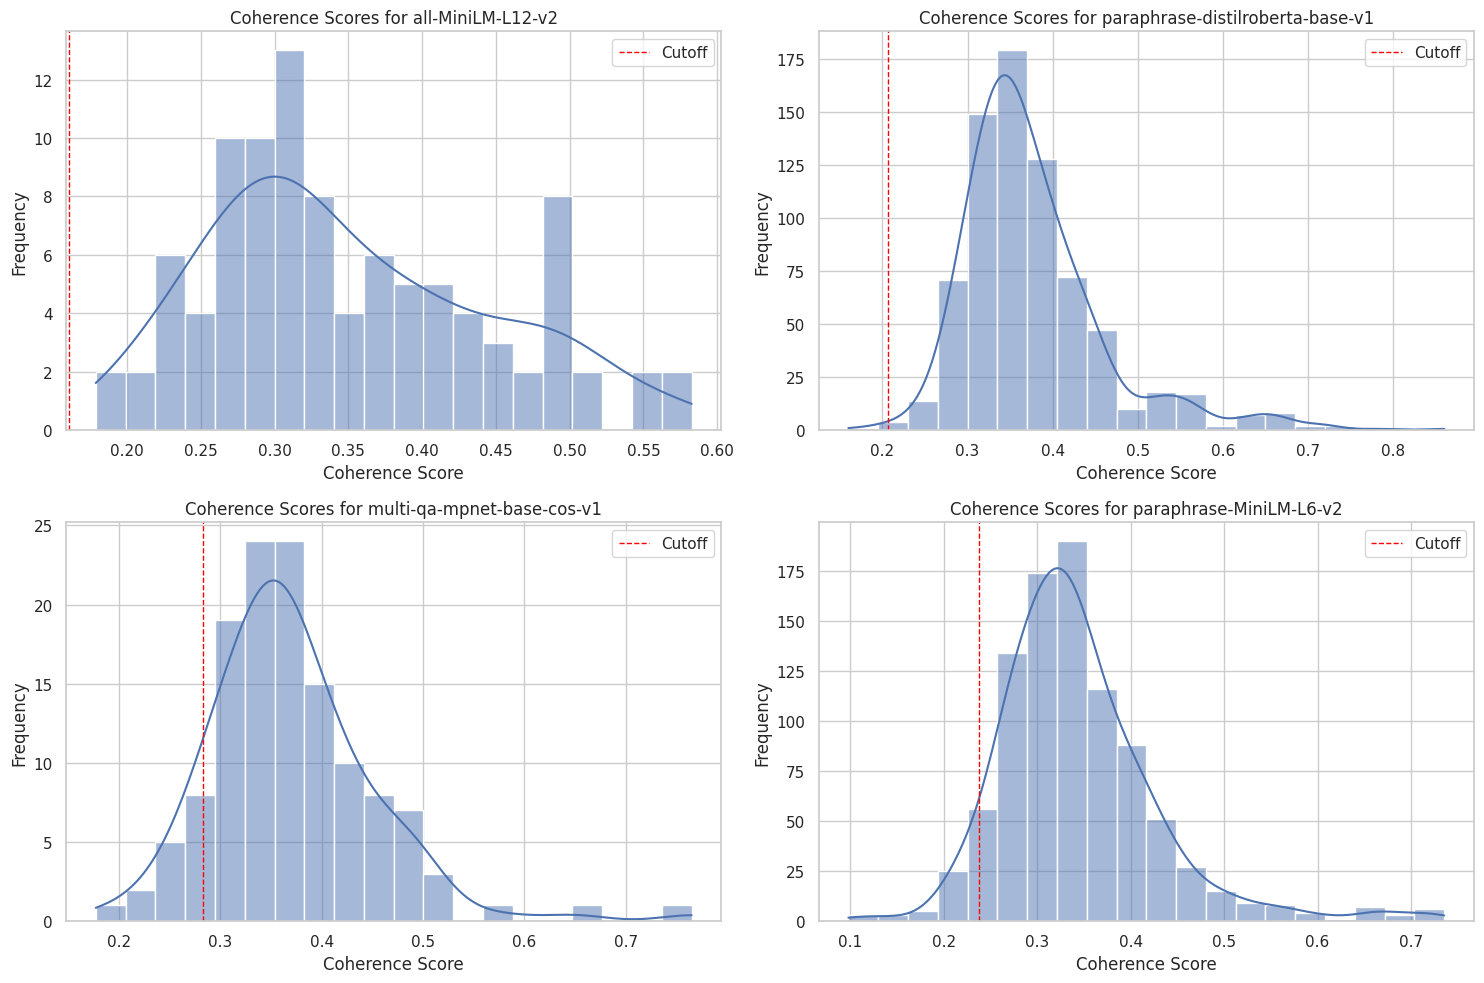

In [17]:
# Plot coherence scores with cutoff for each model
unique_models = df_coherence['model_name'].unique()
num_models = len(unique_models)
cols = 2
rows = int(np.ceil(num_models / cols))

plt.figure(figsize=(15, 5 * rows))

for idx, model_name in enumerate(unique_models):
    plt.subplot(rows, cols, idx + 1)
    model_data = df_coherence[df_coherence['model_name'] == model_name]

    sns.histplot(model_data['coherence'], bins=20, kde=True)
    plt.axvline(model_data['coherence_cutoff'].iloc[0], color='red', linestyle='dashed', linewidth=1, label='Cutoff')
    plt.title(f'Coherence Scores for {model_name}')
    plt.xlabel('Coherence Score')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


Step 8: Filter Out Garbage Topics
Explanation:

Separate the topics into 'clean' and 'garbage' based on the coherence cutoff.
Store them for each model for future inspection.

In [18]:
df.to_csv('/content/drive/MyDrive/internal_topic_coherence.csv', index=False)
print("Results saved to 'internal_topic_coherence.csv'.")

Results saved to 'internal_topic_coherence.csv'.


In [19]:
# Step 8: Filter Out Garbage Topics and Save with Average Coherence in Filename
# ------------------------------------------------------------------------------------
# Explanation:
# - Calculate the average coherence of the cleaned topics for each model and run.
# - Include the average coherence in the filenames when saving the cleaned topics.
# - Ensure that the average coherence is formatted appropriately.

# Group the topics back into models and save
for (model_name, run_index), group in df_coherence.groupby(['model_name', 'run_index']):
    # Get the original filename
    original_filename = f"{model_name}__{run_index}__topics.json"

    # Separate clean and garbage topics
    clean_topics_df = group[~group['is_garbage']]
    garbage_topics_df = group[group['is_garbage']]

    # Get the clean and garbage topics
    clean_topics = clean_topics_df['topic'].tolist()
    garbage_topics = garbage_topics_df['topic'].tolist()

    # Calculate the average coherence of the clean topics
    if not clean_topics_df.empty:
        avg_coherence = clean_topics_df['coherence'].mean()
    else:
        avg_coherence = 0  # Handle as appropriate for your case

    # Format the average coherence to 4 decimal places
    avg_coherence_formatted = f"{avg_coherence:.4f}"

    # Save the clean topics with average coherence in the filename
    clean_filename = f"{model_name}__{run_index}__coh_{avg_coherence_formatted}__topics_clean.json"
    with open(os.path.join(cleaned_topics_folder, clean_filename), 'w') as file:
        json.dump(clean_topics, file, indent=4)

    # Save the garbage topics (you can include avg coherence if desired)
    garbage_filename = f"{model_name}__{run_index}__topics_garbage.json"
    with open(os.path.join(cleaned_topics_folder, garbage_filename), 'w') as file:
        json.dump(garbage_topics, file, indent=4)


Step 9: Summary and Justification
Explanation:

We measured the internal coherence of each topic using the c_v coherence measure from Gensim.
Topics with coherence scores below 2 standard deviations from the mean were considered outliers (garbage topics).
This statistical method ensures that we retain topics that are significantly coherent while filtering out the less coherent ones.
Visualizations were provided to show the distribution of coherence scores and the cutoff points.